# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

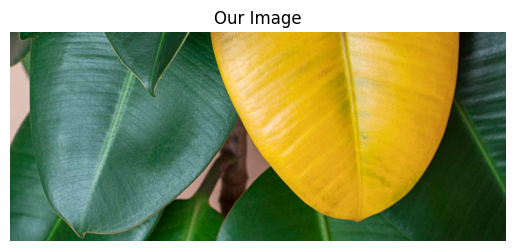

In [1]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



In [2]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [3]:
# @title
import base64
with open("assign3.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAIBAQIBAQICAgICAgICAwUDAwMDAwYEBAMFBwYHBwcGBwcICQsJCAgKCAcHCg0KCgsMDAwMBwkODw0MDgsMDAz/2wBDAQICAgMDAwYDAwYMCAcIDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAz/wAARCAHrA7gDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDmvDH7G/xT8XtH/a2pWXh2Iffgnmyf+/UOTXX65+yp8NPg/wCGzf8Ajvxksn2VfOmR5zZMD7RV4L46/as8f+OkddT8U38Fpsx5Gn4soPyP+NeM+J/DOu/Eq5xb6ZNHZA7pJ71Ri6HoeOK/C6WCr1pXqysfZPEwjHlpmV8efiHp

In [4]:
# @title
import cv2
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
string = """ /9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAIBAQIBAQICAgICAgICAwUDAwMDAwYEBAMFBwYHBwcGBwcICQsJCAgKCAcHCg0KCgsMDAwMBwkODw0MDgsMDAz/2wBDAQICAgMDAwYDAwYMCAcIDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAz/wAARCAHrA7gDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDmvDH7G/xT8XtH/a2pWXh2Iffgnmyf+/UOTXX65+yp8NPg/wCGzf8Ajvxksn2VfOmR5zZMD7RV4L46/as8f+OkddT8U38Fpsx5Gn4soPyP+NeM+J/DOu/Eq5xb6ZNHZA7pJ71Ri6HoeOK/C6WCr1pXqysfZPEwjHlpmV8efiHpfxM+JV7f6HocOg6JHH9msrRCSwPrLmvPtTvvPn2j1/hrTkhILp/GrYb/AGj61kvYyyXchXGQ/PtX2NNRpw5YnmRvJ3PSfhJ4suPCf9l3sDFBCuGHT5fQ+tfUpu4byCKe2O+GdVkUDnFfKuhWDw6dDFs4CYPHSvpL4BsdU+GNkJj5k+nuLSTHJbPQ18xm0fto+ry+TVPkZF4l0rzvFt1K3KZp8caqmI/k+tW/FJ3eIrvJ+cPyF6CqmK4qU26aZ4tf+LI82/aBYi30f/flryfxSc6Bff7mK9a/aF4g0f8A35a8j8SDOj3VfR4P+Hc86T985m3a2NtMNsu50XYVGcV7h8Lr2xs/hfqoFvNKH02GNcygYzLx+deFgeVM+3gOnyj0r234dpH/AMKm1k5XP9m2Uic9P3tXmVnTsz2Mr+I+3vgzJot/4Rsov7FitJ4bJBGHJIb615x8atPXSfGlrcxvJYXV9EktrdL0b/pj06e9bvhjVbfStKsil5EFFohMeP61s6z8JLv4n+HjeW1ob7RtHlSTWPJnHn20B4HHXr6V+Y07UMRKetj7evUTo8r1PnP4jeHptY0y62adLJf2s/8AxMdKjvRb29z9cHP54riNC0q51iIW2hWlvNYxO009jo9mb69sfbzuBivuPS/2XvDkPh63GpWSax4aLo1h4nkwRpx/6agkV3w8JL4Z1L7Lb3WmWviywh/cw2waKw8TWnr1z+A5r0nxDSirdD5ystbxPhjT/wBknxZr+pae2qW9npSX/wA+l634lu+blfTMB/nXpuk/8E4P7bs7rT7zVLmz8T6W3mDTLCw+z2N/B7Z4/I19VeDfBMmpQTP4e8LXVzo083kal4b1diRF/wBcM9fxIru7f9nfU7nS/wCy9R1TZotl/pGjSw/8f2nz+6+v5ivOxHEdRfDJChQctz8/dL/Z303wVfyJJoENhd2n3/t2PP8A54rprTw9auI08y5uSf4IWyP5V956z+yp4U8b6lZXWvWU/iPVFgVWvHmBM7evoa7zwh8GNM8KyS2mjaLpmmy2H31SAfz5rklxI5Q5EryH9TjH4mfCPgb9mTxn42RDpvheeKHOPtF2TBz+Vel+Gv8Agn/rF2sba94l0+0B/wCWGmjmvpj4geP/AAf8JPC8V/4q8VaJo3kfMx1KbyAT6Yya+d/i/wD8Fqf2efg7qCjR9U1TxbNb7swaTD5wb/ttLisac8yxf8GDBuhS+JnovhL9iXwD4ehaU6Tca7LbnY8moT4H5CvU/Dnw1g8NaVbjTdMsLC3mfaotR0H4jNfl78Xf+DjfxPrFtf2fgHwDpmkW107bbrV5hcY/lXyx8X/+Clvx++N1nLHrPj3XdN0+bk2mnEaTbn6Dt+de3huCszxDvXlY4quc4aHwH71x3nhyx+IVroFxr9jJqt9G7xWS3GZxgZPPTpWj4bjhXVJjDIBGXlO4HkivxR/4Ig2Uutf8FHNDj1C4ubx3sLuSWZ5OuIuOOMV+1ngu0C6lNnlQku0etfOcQZR/Ztf2UX0ud2AxLxFPnSPgX/gq3p5ufij4EO65wunygSKf+m0PauG8W2Ew1aeKNDJbj5gQcEmux/4KlWfm/E/wSkQXEenStznqbiLH8j+RrNbS0hZ8NhN/U8mvcwsuXD0z18LHWTOHWzeQL8j8dflrpfCCBNEtQ3+3U95NYWquTOpk64XGKh8PSKNHtdvP3uldCd1Y83NLLlLkmz/a/KolO0HP1qVzWd4i1+HRrCT5y1xs6BeKqMW2eK3Y+Stb1JLS+uWfnMzY968c+LFx9q8abh93yE4r0Oad7yRzK3O/pXnHxIU/8JZIMf8ALFBX6Pl8LSPJqO5m+GpUOu2ucffr6Z+FF55umeGNskieZqlwUxhsV80+GudfteF+/X0h8JIvL0rwyzThM6jdeXuGKxzf7Jvh9YHsWc1wHx51AvLpML8hA+z2rvY68u/aLdom0dxwdjV89hI3qxN56QOQkf8Ae/yqKUfun/3KLS7FxCr9x19qWc4tn/3K9pXUzkPIdLtmnfYhfzvveWtuME/Wvsz9jZLGx8Ezy3qxFPtbDfkdfpXyJ4ctR9sO1juSNm8vvn619g/sp/DCS/8AhNdXMUxaUXm9UznNcPEMl9Xsz2uH/wCOd98f/iNpNz8DPE1tZ27GW6sHQlIMV8Gq3mf/AFq+y/jj8PbvTPhHrtxcC3j2WjHAJFfGax+Uf6VzcPQgqcnE7c7qP2sR28eopc0zyvpSeX+9QZr6I8T2jPQ/2bLMTeIdVyglP2HO1hxXJ+KPlj6HjZjjrXafs5W6Q6zrpD4KWW3PtXFeJH+5u/2azh/EOCs7u5zOtSLFol0HXG7apz2FfMd7xrE/+9Mfwr6ne1GpWF7bsNzTJ8p/u18syRFb+73n+CXrX1WTfaueZXLlgnlW6fnV+O3/AHdVNJi3wR55+StBOI69KsYlTUDH9stfkP3/AErSjUGT7q1m35zeWn+/mtKBsNWUmBad2f8AiH/fNVNd50qTAUeUnP8AtVZ3VV10/wDEmnHonPtRF3Ar+CHxBPwf4e1beKxvB7fupv8Afrc3UVtJAV7zi0k/3KqeEoSdGjLdauagc2c//XOofDg2aVBxUc3uAXNlZfiuEPYxqP8Anula2MVm+KItqQY5/frRTs9wLVv4duz8TtJ8pJnc3dogTIOa+09V+Emt6LL/AMTSJbOZovMVJ1+7Xyz4E/ffGzw2h/dl9Vskwea/SL9oCwmvNX077VJHLKkO2KUDGB9O9fO57XlGcYndgo3TfY8ItPgxqmqaFI0VpNcNFv3GC4hGf0rlvFvge/8AB7Wx1C0ubSSaF5Ss3Tjqa9yj8MXttp80kE8cStO6lwD0+lcd8XdUv5/EGmxanghNNuDHvTG4e9eLTrycrHfSSieTd/1ryf4sH/irLn/rhFXqn2+H7Mg+bfsxmvJviY8Z8Wal52eYYgmO1e3lkf3o8VV93QwtCwIcGeUv52/ysjP51j6gjfabzaFuDu8xPat7w6iT3GIxyXXEbD+tYN6pEdzL/wAfRnOxcfLgV9RDWVj5+S1uQX0cSAgbhOyP5gxwv0rl/FNxs1iF26LdKAfWumvMqqqfPMsqMN2RznpXL+IOdSgKgvJ9tzjHFdMCSxrKCbV7wuNgZ+PeqUh2uhHOevtWhr37/Xb/AB9wv8g9Kg8qPy+350AQyqgjcgnON341uWUUVwbANEzeVu8zzD9/8qyseXu2BTnpnvWnp6IIlYP5bJHuAznmgBIWcWL5Ev31bYpHUdeaTU4mFuycnzE+Ru1SvaC3geLyZM4ZgeetJeW/7gqsqv8AIwTac4oA57UpCun2v3cbOpNQxj93161NqQeTS7QYGCnB9aiiizsrQBySfZ+OobrUtlGhRFZfm6ZxRotqNQkmgP3n5X2rUOhbboeVIIFlfMZnORUSYGDPdbJzggY6+1ILtJ4/v/x54O2rmsWM9vJL5scvzdMY5qmLNJE+X0ya0jaWwixb372uwwtlv7hO4VZGrJcY8+IP/fwMZrKYTRkOuOeh9adb37iXayD8ankYzQ+yQXAcxvnPqaJrJ1PC+YfXdiqVvcq8paNlCjtnpU9veOsm4tlfTNFgH/2zOjFJZBIF6bx/hV6PXYb9l+2RqfJTDM/ANVpL6KRMtGoPoadcaZHeXTfZZiFfs4osBPPp1rcPF5U7QDG5iw+8aqSWNxYjj9y+N2Y/X8abLDcWMB2EJsGfk/8Ar1LY+IZdPufkYcf89FzSugIm8q6KIN2+o/sbfl1rSF7YXTR71+yt6iodQtBaSgREvujVj9aLgZbxbouD+VVrn5JExWjKFA2Dg+nrUFxEDJVAXLb91Z/K3vT7acJ9zncnOabFaR+R1P3KcgUR5XrQAsZWJv8Anm/cdQKkh1BbS4VhII9vR2H9KYkbq/8ACN3XdxVK7nUiRyOE2DGKANeCXFsdkw2h+Y4xjH4mo5IjaRxshRWb5iCckGsN7o25ypba3UelbEGseaqFnU+V14+9SsAy8/4+4T+P0p+lzASy/uzwMrx92mTzB504/gxml0mF9rP95nTGBTA0pArKHTjemDUNxMHYgEOU5BPpSWyrnf8ANmXo/wDd/ClKon2fp+8+VvYVmBAgaSVC8bBR1AHSkliVovkDjKY6U6KHzZH5jA8zbnB6VYSPFmn60ARW6vcwWys6lByHUZMP+NQ3Gmx3dwcbk2pg47VNa/8AIQ2L8o2ff/8ArU50S2L7WMZX7w67q20AzBpc0A3Adf1qrLaEKeW3p3raffE21UX5TgZbqa2fi94P0SyvdOvfDt/HqdrqOnrcXlvFx9iNZSqKL94aORhvZVXZv8xRz5Up6fjUd/cfb2cpvx1zVpdMMtuCvSRPuD/GmPp5Sb5shWTkAVrKLS5uhHNrYjsV8i3QJlxSSxpnGSp9DUkEwSLYnU9qnt0t5HYNmAncQx70RswTbKrAEbtwb6HNCboo+ufXmrE9lJHEXVPPVOyioJIv3b/LJ0z93tRo9IldSVZ9kUezn60VHLxC237sffsKKWgH3Pf/ALQtrbjGnaQN/wDz0mGV/KuY1/41+I9SYsL17BU5/wBGAx+VYdl4b+1bGkZmX0T9xUq6XCizqEtm+THJr86UKK2PoOaZifaPMugqlp5X4IPBrr/CPhN94uJF4/iDjGayfh74eM2oobiCYJ5mMswBzXo0su1eFEa+h4qcVWs7QOrB0dLshgiVE24r179mjVbcare6Vm9xfmKaIehHWvI4/wDWV6T8Ab5I/iHZlbc+VHG53A8/LXjY5c1FrsevSlyu6PQPiPYrY/EHVoFGAk+38Kytw9elbHxL3P8AEDVg/wB+OfD59awc/wCs968uj/CSfQ8qv/FkecftES/6XpSdvLlb8a8o1xv+JVPXqX7RH/IR0f8A3Ja8q8SDbo8+K+own8JeZwOF3c562sZN8jMyfInrXvfw58LXD/DXWpGaxQpotpFtbgZ83OfyrwGSCYSMCSQ6fw817X4SmGk+BNRiSeRWGh2QeSM9T64NGaK8Eetlmkj7L8MfABrbwjpXn3wJFlEJIz/jXtX7NPhL/hGNJ8UgxQyx/ZrdIo484wZeP8mvnPwF8UNQ8PeD7C0h+zPvtYh5s7Z/U17d+y5431TxJoXjNbmdnhENkFRI8Ff3vrX5NjqeJV03ufde77I9D+OnhH/hTPiWPUIdPvG0e9iikvrWI5t9Qg/mZvwFeqfC7wp4c1vwhoVz4ftrL7C6bLSRx9o+z84xjkEZ96s/tAxxXum6MkkayQ/ZU+V6/O//AIK+/HX4h/sw/G3wtovw21/VPCVn4h8NpculiBEbg+b97HTP0rlyzA1MwmsLB2bv+B81iJ+yp85+l3i/UtC+G8k0/inxDYeHrCBeLq8vhAze5xjmvnT4pf8ABW/4A/CXTnjg8SS+J9VXcoi0OGa++Y9DnBh/SvxP13xRq/j7U5tS17xBf63fP/rvtl/9vn/Dv+tVrvTvIsHmW21BoJZEAu5eNtfd4PgLDU/4zueJVzqo/gP0g+M3/Bxbey3Al8B+AdPi+zHbBc61MMke8EOK+Tvi7/wVp/aB+NSzrJ4yvtFsLj/W2ujk2P5gj+teE31ne6i8m6WztdvT7EQM/nUE3hi2itJ5JTPN+73fOe/4V9Nhciy+hL93BXPOnjq0t2U9V8UXvjS8a71fVb/ULl358x/Pn/qf0pYNEkmEmzTbuTv596efyFbfgCAf2FHOw5d2/eRYH861rpjFBPuPmrs6dK9hThRdqcUjhtKXxM5zStBu7ywt3N2sMbdVhip+t+FLOw0a5lZrmaaKPIeckj8q2PDYzo9t/uYqv4vPmeHL/wCYcQc89Kh1XzWNIo+o/wDgiTYf2v8A8FHtMibeSuj3ZJQYwPKr9mfCzqbu4VHOxI5sEHnjrX42f8ERtIbVP+CisMTmaANoF6ZJEB+UeV2Nfsl4XuvsL3Q2r5fkXXPevyHj+XNj/wDt0+qyNWoaHwT/AMFQbk23xW8FyCXap07LBxjA83vXP+KdHi1QpGCsOx33spODWr/wVJSZ/ip4UEeNv9kPy/Q/vawJPBPm+Z9pu53+dj1xV0VFYam2fQYR3ckU38P6fbo/76V59mMHpV3w4F/se12j+DmufuvCssdxP5cO6JejZPNSy+IvsWjQ21t98Jgt6V1Rpp/CzzM1+yaPiHxTHpTPBFg3P14rk7+7eeGd5W3Hy801yN2NzOf779ag1HjTZ2yP9Q/U130aaTPCqOx8xv8Aedq86+JEv/FVzntsSvRc5jevNfiT/wAjJP8A7iV93gtJHDNFXwtzrlr7PX0n8JZN1n4XJC7DqN1v3dvpXzV4OfPiCCvpT4OApZeF/LKNuvLqQK55NcubdDbD6QPX0GK8u/aQ4XR/9x69Sryv9o59/wDY/wDuPXg4P+LE3qfAec6defZLnB/1bda0rw/6DP8A7j1h1oJeefpk6H7+xq91azOQ8w0djcXMij5RnbuW35xX1n+y59uf4bPGXu3zdP1m/wAK+U9Gs0s4zI0bGEf6raeW+tfXX7Kusw6Z8IdrJdSsbp8KOf1rgz/l9hqe3kC/fnTfHQa3qPwi1ua5kuPsTW2w+celfG8dviH5nG/1zX2B8b/F73Pwj1i2igjjhKfNkEgV8dhGXrzXNkVP91Kx0ZzBOon2JJE2fxD86ZjMtMAVeu41IjYr3jxmrHo37OP72718/wDTliuL8W/LJzxXb/s4jy219tp/49V5xXEeJ5f3nA/76rOnrUuefVkZ2lXyWUV1uXLSJ8h9K+Z7rSYrme6PzD5Hr6WsL6K2067Eq7n8vKe1fOuMC7OD/q2NfR5bKzkjgxGhNpvhqFbKBg7htnTvVv8AsCMgfN16e9TaQfKtoN39ypNTu/sNt5hRnEkuxFQZxXozk5ysjni1J8vUytU0P/iY2m26T2960v7Ckz/r0qjqNhrd5IBc+ZpRH3YyB8v404+DoZRm5mu7r/fJH8qnnhHS57FPJq8ldlz+yG/56x/99CqWraa9xps8aOjsiYYqc5pV8Faco+SCSP8A65f/AK6IfDH2WQvDcXcYP3gWzuojUgayyKr9llXw1o9xbKBjJdfMxit8aZOf4R+VUI9an0K5jXU0SSHbshuk4GPftWsuseWIj5UdzvH8NwaJ3m7xPKxGHnRdpopalpcx06fjd8n8HNVdB0+SHQ7XMD/rW7NeQavpswhO8mPOAcVNotljT4EYOp9CMVPNZWZzXdrsyJLOYfwP/wB8mq15au93A4RmTzs8jqK6qO1/dncDx146U5rF4ZIST8iz7R8vUVn7Qpa7kvw1SR/2gPC3ydNYsgdw6V+kPxvNwniKzF0++QQ4V0XO38K+BvAY8/8AaG8OL5cY/wCJ3ZYxX338bBPB4j09pxvaSDdhecmvmM+lerE9PBRtGRiXW9NCnVEVf378M2K8u+OsixeJNPAjdGTR7rBQ++O/vXp10yR6NMu47vPcZbivOPjrE6eJrUttwuiXRB9f3teVhX7x1cvMeK+auf8A69eW/FP5/Fl3/uJXrhjiEW3b83rXknxSGPE97/uIK+myyXv3MK9KSp3KPh1GW3jYbQZZOI8/d/GsDVYmkW82qwd7jZhRwn0ro/Dp8qysYmHytNkuRyK53VJPN1S+HzgLNvCqOtfTUvjPImVFgSXUIt0bEYXec/d+lcxqEJOr2nP/AC9IK6iNnKxttPzpjpWBd2hbxNYgfcN6mBXRAgi1CL/iaT/u/wCP+9VYnh6v6vAH1Sf70eH7jFUxFmN6ALOVynT3rW0q383TYI5NmFRgzA8tWIeH/wC+a2rFimhFsHKDNACXNgfLzHuc/wC9S6kd8cnmBZM9Nn8NWTKmYuHl3+2KLv8AexTyYXb85IWgDkr6JoLOxY5/eR5ST0/CoItzr8vSr2sROdG0cYOPIbnFUIJMyfN9z0FVcDR8NOxvvlWbfCn7sgj5vrXSXh2zJFCiu0e4urdV+grnfCyCHVIs7x5nqK3ryJZNSulLFspgNNwTXNN2lYaVyPTYYH+0/LsxynmW+cVFfeHIbiK3PCH7rhO4qzLaGK/dI3HnMdhQmmuSsrPKf3dt18zndSXMti9DEvfCjhSY2wN+XDdh7VmXelT27Yltm8vpuHWumMwQyxzJ5m5GwxbGc9KnjmhEcY2Og3t9wf41r7dk2OEazQMBHHzIcYDVEkZii+8xX17V283hy2vPOKQ/Mo3sFOSD7Vj3XhhoocxTiIDqJhuxVqpcOUyIb9+rJuPpiprC9i27vMYfU0l7os0b7JVcf7aKcfnVCbT5GG3mTP8Az0H+FXdEGzDqMtrGM4fedpz6VfivLa8L+aiL975u1cpOHgZBvaI+h5qyusva/LOob/pqvI/Kq5BmxcWSopY3C/JxVQAgZIY/8CqKx1GK8tyIs/umy+/0qdDgUgGPJkJ/f9aPJdZOQfypm797UrvmRPv/AJUAaDRfu/7v7vvTJWH8IpYZd/Vgf4evamhGL0AIxZuvNZ7qYoJt5z86nFaX/svSo72LBk+7np1oAyyd3+39KmaPanBArPuoJHvN0bbV9KukmP7wPTPSgCezuyk2H5q3Dfb/APVkL+NUIpFDbutODC2701ZgbUDF4/8AVq/mff2NnH0qZHDxpt2XChFzHKen4isOC+kj+6dv1qWHUPP8tX+QqmGK96mwGhIptX34whTbz/e9aZ9n53bW2+maqpqBa1lUsD/f3Hp9KfCiyQynEOF6nJ4osTcvWabZtw/dc7PXir3hrw/d+L9Ys9OgC+bPJs3n/lj9fWqUDNJH8pRvk2HBzhvWnJePo/8ApaAGazbeWOefypa8t0O66HXeG/hHPdeJLvS7rc97EyvALdTyfcV9E/CH9kiz1TTHk1uzRLS7iyllH0x6euK6X9nPwjpun+B7TVRc2GozalFvLRLuW3+h6mur+LPxPs/BXhi5e2ubU3YXy4F+7j6V8Hjc1xVefsqWj8z28Lh6fLee58pftY/s4WfwF8UaZLpYvJ9D1SLEayt51wsvpzXkMNm0y8ZDeX0bg19YQ/DXx9+1dpL27G0m0+Nt6Tsfs9v+HcV8/wDxQ+Bfib4M+LhoevaUbK/uSyWsMBOT+fNfRZXmEXD6vWl75wYijJP2kY6HEy2aTpHvXbzt3IOM+lT6P8PNV8Qz3D6RY/a0t0xNvJ+WvcvDP7Lc/wALlkn8daWw1SU7NP0t2IBH/PY967TwF8DNZ+IErWsVi2n6LbfvGEMAt/wPc1eIzihC+tkh08JOStHc8X8Pfstaj4utX/sQXd5qEce5IoIOp9xR8TP2R/iR8L/D8Osa34ZK2M7eWRbgTfzr7z+G2g6J+zZ4flvNTiFlpwT9/O3QfTPNeN/tGftSeP8AVvGupaDYwf8ACN6W9r5umXelzQT7T6yzA4rwsDnuJxFZukrQXVnbLAUYx5ZfEfEtxowS7ELb7W7zh7WcdaK6D4lWt1Y6wE1rVI9Z1gjfKOfOhP8A014GKK+yoKM4KVzx5rldj6Z8P+DdV8SzIlvp15dH/npMdv6V3/hj9mzWp2MtxcW1iH5w2DX0FbaRZ6XCRvPkIcbEOD+eKnivYHV1gRG3xuU3dq/HK2byl8LsfZRop7HzD4q+Hlt8NPFkFnFcQXLTIk8ktxxt+gp09szSgbW7/eHp1rW/aO8B6zffFO2gSzntHvY7GGOVm+6Dndx74P5GsvwL8O9V17xHo8N9qjWEeq6lMWhC5+zAdR7ivTTi6KnfdXNqEH8JDNHtXL/KPUV13wv1O6jvLyVY2kjgsZXRlXBPpivXPDvwc0DSGTNm95N/fuug/CukNpHZRCJUiij3JujjP3s9RnHSvCxGZRs4Jbnr/UHCHNI4vxHqLaxr97eP968PnN9az8eb04q3rcJg1e4j5+RnQVVmk8o9DTjtc+br/wAWR5n+0R/yFNKH/TOU15b4i40aevTf2iJv+JppfI/1EteY+I42OjzjmvpMK/3cUcLdnY525kby5CeqQbvl9a938MSxXPgDVpGZJP8AinrBG4xtb3rwWTTXllYLHDCHTac5PFfSfw+8BF/AN99vkMYuvC1lflVuO3pUZnK1OJ6+WrW57v4M07OkaJEiJdTeTEAD0n+vpX1d8C4DD4U8U+XarBHIlkGKkZH73P8AKvB/hNY+HW0TQJbCO0lvVsIphImcE/SvoX4LwOfBvisYORLZxkemOtfkOa13KfK7o+85Y+wuewfHiPbaaIDyBaqT7V+ZP/BfvVri8+O3wtM6+VL/AMIghSNByB5vrX6X/tAzlBpSbv8AlyxX5f8A/Be6/ubv4+fDAXkKwlPCKL5e7HHmnv8AgfyNelwbBSx8XLf3j47Nf4B8feCL6C60+3Qpa216kCMk+B8h9CO9UviLrBZFiUG3bzkM5Tlh9O1Zmky40u1aPjZGhdPX8aj1m0N2gIjdyZEDMT941+xKklLmkfIXLZkaTfkgfRah1CTGmTj/AKZ11+lfCu81Ib5pYrUZxgGtXVvhlp1loF20nmTyxwOfNxj9KylWgp6Dsee/D6zlufDkBiR2b+4q5FdhafDTVdStZ5GiW0UR5xcGuv8AgxaQ2ngCHyo4YyHfJjX5h+ddLqjAaZdD/pg9cuIxDc7G6hY4D4ffB6zu/DdhNfTTT7495EX/ANatnxx4R07RvA+qta2kKt5OMyNmt3wKn/FIad2/cJ92qHxP/wCRB1H3RRXP7WTmOMT3D/gkTpn9r/8ABSTyjLNEo8N3oPlYGP3QH8yPzFfq14U2Fbojcw8i6OTX5Xf8EgdHGtf8FI9UXzHh2+Hr3ay/w/6r/A/ka/U7wz+9S7LMFT7LPwD69K/MONZN4/8A7dX4n02Sx/cH5/8A/BUfU4dO+L3h2HLx/wDEobZ5fbMvHWsq+8a2sJmCbnOcVJ/wVN09NT+OHh1XRkKaOhyD283P8qyZdJjW4ddv8bfMa9OhGLwdNs9jBy96RDe+M2mgZY4AuUwOetYJkwa17nw8lqu6W7AlXoo6VlyAb67aLgtjzs1exBJUGsn/AIlFz/1wc1YcZql4ify9Bv2/uWsuK66S96x4dTU+ak4irzT4mSZ8Tz/7iV6V/wAsq8z+JdukviifcT9xB8tfa4PWRwSkVPBc4OvwH/er6f8AhRZGKLwlthB2zXUow3UelfMvgeJf+EhgO3jrivqL4VPGLLw5+6dd0lwY8nt6VyZsdFD4D1DcPXrXlP7Rh/5A/wDuPXqGf9X7V5b+0WcjR/8Arm9eFgv4sTep8B5nSifyYpPTZSUy8ObKb/cr3YfGchyGm2X9pW0myN5V/gAOMV9m/sm2WiWHwdjnuI7SCf7U52sDXxdoWyWzVdshlHCSg4+0fhX11+ztoV1dfDW3e3t7l1ad8Sk5B/CvM4gsqNme5kH8c6D9oTxFZyfB/VobZoMSJ95Yjk18ch819afHXw/e6X8Nb6aZYxFs+6K+SoxjFRkSh7FtdSs5q2qWBY/NeiSL609JhH2pJLjPavcPHdRM9L+AqKmja+wJDfZelcJ4mHk/e45xz612fwPH/FLeLWbf5aWqb2Ucr9K4bxrfRaVBPfzEm1tIvNaQ+v0rOmn7SyPPm00UbeSJbC9V1y8kHyGvAlFrDGd9vN++XYc5r0/TvjnYGwePULA6db30IFpddcE+tePT+c0BYTtFCke4Hbk55/wP5V9NgKMo80mtDHEUZ35GtTWl8Tx6VEW8i62In8VM8S6JrGt6LazMlpHp98++J45hlT9a0tI+GN3pbrca1byrc4Qpb3AIyPcV01vHMngq5cxt/pE6rCcjGB1wO1VUxdOL916H0mW5C1DnqrUwPCV55fl2U7M9rNJtkX+6PbPNPnjayklgbJZJNlMTTWt54NwIbzByB69K0vEFvnxBdf8AXeueUo89z2/ZNQ5UjNMf900S8njirTbof4PpxRJCSN3y01OKJUG9kyK0gF3EYHjjlR+of+D6VieJPh9FAIby1e6toLhMbcn/AEY/1rfjsJZG3RhvwFbljaDWLZrWQErdXDJEf7tL27j8JX1OnVVqsThdP8Oz30CrBqtxDfbNqLNjbcCp9O8eX3h24WDVLMSKkm0T23p9Kfq9t9j1P+JXjXCkfwmtbxCZJ7uKbnNxCk4XjCmuh1krX6nlV8qpyTjbYSP4keHBIyMt9bF+oaAVci8Z6N4ingj0/UoGczZEE48nI+orDS3ih4kV1X+/EBn9aq+IfDQn09ZJPLnguf8AUXCrux9DWqnBnHLJ01eJ7D8O7CSP9pHwsflKXGt2uxu1fdfxpS4k8UWX2okSeRlIF7CvzV/Z4+Jq+F/jL4VPiW7Ntb6bqME73tzxBx16+lfU/wAYP+Ck3gjWPiBb21tb6pqmh2IWG41a2/498ewrwc1y+tOonBXsebQhKHNE9sk2vo0CKvnSC7YSb+CTXmvxkmP9uxbfl8vQZxzz1l4/OvRdL1SLVvDUDW32a5jd/tCSKP8Aj5/GvMPjNIp159pZk/sT7w5H+ur5/DxlGbT6HRT13PK5BnNeT/FX/kbL7/gFes/wf8CryP4qDHizUef7lfS5b8QYqXuWGeGD5lhpsbjczPya5jWD9i1HUn/uyYHvXUeEY/KWykYjag3YPrXL6jMGuNR3qT+/9K+no6u589MgH7iWCNiNx6Lnk1zeoD/isLKPLfJepgLXUpb+bqUMbdFj3Bu5Nc1qzH/hKLRkUhjfKAcda6YEDL35tQuvvn5/4hUUYxirOtN5etTp2D1Du4oASRBJJ6Vo2DOukqpyfM+X6is2Tr+tbukhZ9OTPQybG9h7UAWUbz54eUKjuhziq1zGxs7tl/dLsfhfmqZAsMu5Rskk++D0H0qO+j8vSJvL3x70boM0Ac3rMjHTNKXoPIqigXzD6DqfStPW5c6Vpf7zpA2eKy8f6O3+3QB1Hw80pL3xTAuHbecIpHINdJrHhjGsuIP9I+vFYnwy8seJo5XQrFDF5ow3Oa7a/ka51i5VEZ2jJBOMYx1rCau7my0jc8e1YtDrEghdvM353l6ntPEd3p6zRkLMrPklu1U9VjZNTmT/AJZmTaG74pwt1czglq6ErmJv23i6K8nTd5luuxRlsYqyI1uYWlV1Cb8nn/UfT1rlXj5RetMiUxh5fkXd1Q5wKXs0Vc7CXzNNPmOGGU/d4H3vrSXExRJVkkk+0wHDKcc1h2fiu7sXhRwk+w7Ru9KntvEVrcR3CSCS3bCsjt1Y+9c6ptBc17e1gur5/KDJ33xj+hqC58O2bhZHgYKDgkHgGneYtwQY2Mk7pghOlT3EwszsO/ZG29wwxmqsytDnrrwdJBcxom1yehbvWNP4clVfOKuYum3FdtPEz3UbNC03mI2zzD0/Kjy0u9NVQh4fK8f8fH+FP2supNji7OPaoVUC7k/eZ71YSPy4vmq34kt0h12NYcAPGp296jEWLdN38XX2roTuSVcH+4Pyp0qnHXG3pmlMbRT+q+tF3zLu6r6UwLg2IeBj93SFAwUjcAOpx0p+0LbbT3XGz39M0rnfI5H3KAI/+WlRz82/zffZ+TUsRkV3JwRjNMdxJQBnmPB6VrWNjHdTYNwikpjD8VjSTnz6nSArdRsWYUAX73R/K/duY1/2geKrS2rxyuNox/tVMJbm0MblS49HFWI9aWUObhFz/wBNOahOwGVs5PscH2pTAUzgHjrx0rVh0+G75jm27PmfcMZNJdaG6PKfJacNHuBHc1YGXlef+mnA96gDyxFuoXOHHrV4x2+9tuYfn+c9dv0o/s5hjYfM3jfRddSNDU+Gnge9+JHjzSNA0/7PHdaxcrbQNcE4yO5rV8E+DtV8b+PLfwvYqp1m9u/sZDj5M1s/sp+HNF1r4+6OniK2sZNGtUlnvEux6dMnIO4+1fTGh+FIPF2oeR4H8KRaIokaF9Wt2zOx9RnofevFzHMY0Vpoj0cNh4zV0cHcaXb/ALI+v32hrPp2seLZFZLvULfnyM9O+D+Ar1X4J/s02/x/0CLWvEmuXM008mFgs14H4Vt+DfhD4c+D3iPxJ4w8b3M+laPoxRXtbwD/AE8+gJ5qe3+L/gD4jfC6PxJYC68C6hqUmfs1hL/p2YP9SAOg9+Oa+PxderiaSq0Vo+p7VPC0qfvVT0Dwv4W0/wDZh03V/tut6q2hW8ipbwyscn8cV8q/teftbeGvjB9tsR4e1a61OydoLO+ur7iw/wCm0GOfwNYnxW+OOt/EH4s6TcWura5e+Gtef7LDbuOsnqRXnPx0+Des/BTxdcaT4iVWN6n221mQ9T6Z9K9DKMoVCoq1aV5P7zjxuMlJe4vcPrz9kn4Z3PxE8HWHjHVrmW7uHgQONSfAYeo9K9f1bxJo3wQ0me7v3S3efvDgA/ga+dP2Rf2yp9C+HuoWHipbvUvsMi/YAqr9naD36c1H49+LWl/Fbx49z4r1eHw9YQW3nQ2K/wAZ/GvIxeW4ivjJKr8J0U8VThTunqV/jx+0BbeNtStfD1pMzXeonYTK3X+lbXw+8J6d8N/h9N4s8RSxXUdnaf2gbVbgnP59vavlUJe/FD4qyvYWkrrqNxlVQnPk+pI/pX0P8fU8JaD8Jm0K8sx5bQrGxgP2cxf7PXkV7lbBKi6eH187HHCs3Fzq7nzH+0h8c5fjd8Ub7xEumQ6bZzL5MUEeOvrMRRXpf7KX7DI/aWjl1SPXbS10m3u9s0UI/wBIIor3pZxQw/7pxehyfUa1X342P3L8B/8ABMfTbPVbP/hK9evbqa7G/Zb/ALiA/gPp+le2/C39n3wf8JRfRaXoGlpJHbylZ2j84KPxzX56f8EtP2ofiT+1D8bbDUvGnifVtRvbbxPZWlmplMUEEMtnfMQIcYxmIHmv0w0E7LC/wWYx20qux6EV/NWf0cThqvsqsrn3uFnTqw5krH5pf8FNJBH+1ZDhM/Z5NDETBiTAcSn0AOQRn6ivAvh9iXxh4ZENsySRa1qEB3/xY6V7/wD8FFrR/wDhrFIgGfF1oocRj/plXlHwOhZ/H3hiOaaV2fWtQkJ2j73p9a+ywU7YGL/ulxiudeZ6qLWdYs/Zbkn60y4trkNGVtZ8G4SMFjjNdn4i8WTaLJFD5MO6RN33eprnb3xRd3s+n8xbRco8QUfePvXiUalSTu7HtVnekeWa9u/4SG63cN57jB61TX5HfHzfWtDxPM154k1Nm2qxu3AA6rWeeI3r6amrwPg62tWR5P8AtCf8jFpycY+yvXmXi9/J0KcgsK9M/aEGfEmnf9ej15l4qO7R5AeRX0eF+GJwP4zmBKgGdsh/c461734dmMPg6dfsyjf4PtIV3EDA/OvCzbRJK45+5X0J4QutHj8J3pGkSSFvDVm8fny5+UdavNUlGLR7OWs+gvhl4xk03w5pE1paCe4OnorI/OB7Yr6s/ZhN3qnwc8Q6hdRsLie9ty0GegPTNfPnwk+LFppXgbSXeCW2tP7PiEIiOWJ9yRXvPwG+IsPivwFrS2zXLK+p2UPmSgLx9K/Is0lUcndbH3DlH2Fke8fH35LzTs7PlteOetflp/wX01O7uv2kPh2buMW88fhCH5AOmZZsfnX6iftATAavpyHkfZcV+WH/AAXjur69/as8GC+hjt7xPCFl/o+7j/WzH+VehwVrjo/9vHyGbu1A+LtOumihg+6qpAm4HvWrAwt5LcIPLEl0km1uePSsXTGEdvZ57wJu3cbq37JfKmsgJfOjE6DO3JFfsNVnyK1PV9J5gwefnzioPF8nk+G9Q97Vse9XNEsJrizbbt54DjofxrH8bsW1aSwjYXX2my+UOc4/KvHS9/Q6OQsfB2Zl8LRxkoN7OeT2xnP5V02rjOl3Z7eQ3Nc74VnbTbdp7SO1k5iR5MeRAo8rDYH1qqnxVfULA/b7GAQTJtM1oDccVE6cpzujQ6TwVCYfB2m9swLVD4oyiLwLekjIOzBqx4Z1nTDpsUNnNC9vAuxJoz1/Co/iNB/ang+9jhaKaaTbsSKcisr8ru0C0PeP+CPel/2p/wAFCPEKmV4RH4euvmU89v8AEfmK/Ujwr/x73zJy/wBlfg9K/MT/AII+aFJN+354oTzQgn8M3TrPCcY5iHf3B/I1+nXhyR47K+b5Wb7K/wC8Q5/SvzPjPXH/APbsT6fJrKgfnf8A8FRo7y/+Nmmm1GDBoUQHljHNcvc3jpI+6U/f9a6b/gpqYX+PFggurdC+kRcA81SuLzT9MkfZGJM/3OP517FLTCU0ehhJWlI55kklBG5nK9Se1QSufOdfWt+68YI9s0Mdsyo/8eRXPXEuZt2K66UX2OHNd7EfmY9ap+Lj/wAUtqPtay5q3IKzfGU3keEdVY/8+r12UvjPFmfOG/ivN/iGf+Ksn/4BXow5irzf4iNnxbP/AMAr7PBfEedIXwOgl19O2EbNfS3wqKGy8NKzHpcOntXzT4EH/FQH/cr6X+E6SPaeGm2/cjuucVyZsdOGd4npma8t/aH+5o//AFzevUM/PXl/7Qxymj/9c3rwcE/3q8jes7RPNsZqDVTt0+fP7zCP7VNG9V9V4067/wBx696HxnHc4HQr77SoG2TzYG3fKOJx6j0r68/Zj165i+FNlicwqk74AOa+Q9Es4bZyzM77jskzxtHtX23+yp4Rsn+DlrO5uSPOlOMiuLP7Kiubqe5kMv35D+0N4kudb+H97HP9nWPZj5Qa+TPMz619cftBW1vb/Di68iDym+c4JzXyLHUZJBexsh5yn7a1h24DvRUL9qCSK9vkPI0PUvgrMLb4beNWPLBEUj2ryX43q+o+HP7OgP8ApGsOlpGg/i9wO9erfCWVrL4ReMni2oZDEm48iuVtvDDan4Y+IfjaVP8AiX+DLG30HTmcddS1I56f9cuSfyqcMrTcn0JpUVVqqMep4xofhyHV/Dt7FKqTW0LxKD13D1HpXov7CX7CV7+0h+0hoOiKfP0RLy2jmlkONq/xD36y/wDjtY3hSxGn+GLsbFIupordfYjvX66/8G9f7Ni/8IRd/EO+tSkUck8NpK2MmSTiY/8Afv8AXpXNneb1sLhZNS0P0PFYDD08IqtVe9HbzOG/4OEP2ZvCukeBvA/iXToLfTdWtL9fD9xOp/4+LPys5IwB1IHrk1+ZMs0OraHaCGERw7neFcdfrX39/wAHA3jS58b+I2uDdD+wPCevL4VsbflR5/kC8vZgPf8AcQkn1OK+ANDuIf7FsH3p5cZaL7w6+tcPD6rSwEJVXdo6cps4KM+pm614aSNrBsf6y7iTpWz/AMIFHc6jK7LkuzP0qHxh4itnk06FJPmS5VwcVleI/iVd21/JDGhRkk2ZxXvKNR+6zsk8PRk+fW3Y6STwDZDbu28deelSHQdIgg5kiJ/CvP28R3d1vR7iUH1Hes6Cd5JcNJLx/tdK0VKb3Od5jSXwRR6rDHo8a7VaL8hXEWjixNnMCNsd7nFc8jNDK+W69OtX7xgfB5dWO9brAxThTcfiZyzxyqbIyPiFbfZdbnwMYds+2eldTq3h8XCW2P4LaJBxXN+PJhdakWJ/10SSGt2+8Rm1voUI4FvESfQDqa0kpWizioTpyqy5jI1PSPsq4IP5VVspzps8jPAJbeX/AF8JOQ34f4V082qW9/1ArPu9GWUsFYc9MHrWkZNbhVw6TvBmB4h8HQkPHlZYWG+Ns559qh0zw1b3Nq1k7iFZ02hZRwW9TW3bf6b4cz/HZyBSfUHpVO4tCDn+Feh71vGrL4LnmzwkLuVtz6m/Yd+Kn/Ca/B2HwvepL/b3g25aykGeZ4v+WTHvXUfGG0H9tSOblNw0hFKL0A8/Ofy5r5H8JfFCX4L/ABR8O+MEklW2O7TtYQ8gxDpwOuPzr6x+L2rQX2qTTQBWtZdEh8hl53c4/nXlZhhbVfbQ2Z85iKcoVvZo8+vNMtbXT0db0TuOq5ANeLfEf/SPFmpbh5PKDjmvYhJE8fIryD4mSRf8JZqnXl1royxfvLHHioy5Q8FweZNC7fN/sjpXI3o8uO9PdLp1jDcbh6mux8IwhNIt5U3ZeR149K5HUxma7Vv+e719NR0lY8aTYyND9uRv7seR71yt6sg8S6asve93DHc11caodUU7j5aw4PtXNXh8rxRp27nbe8e9bxYhuvuZfEF3jb9/1qr/AMsafrF6w8SX3yj771DFcb40GOKoCaYfvP8AgFbOnzAaEh/1p+6e3zetZMnzu+/+5jitWxi8rQ4v+mr8e9AE4k/dyBvvrHkH2ps8mbORkYbQnIJ6VPIgFzJxzs2/hVO9dhpY4EvyfP2zQBj6xAv9j6TyPng9az8+WicZxV/WCX0fS90nmbYOMriqNAHUfD+2+06/JucKoh6A112vpnUbiRkjfzhI58vI5PSuf+GW6PXJvLYL+7zyua7DxjF5UlzvVQscG7y07H61lPQ2WqseM6z+51y4J5jjegcu3/TSl1mVZtcvTxs8zj3pE48v2rZMxG5xJSuocuMcU1xm4p5/jp3AhkkxOnFPuoXxnaJz7jFNuR+9T61Z3/Wi4FQRtbzJtMkB/vBs1oWfiK8tPNV1WVH7v1qsv+tw3zfJu/Gh40kk6mkBrafr8Wp+TbG2a3lY7FO/OK0ljV1ctGzeVv3KDgj6VzWnRtJqdrt+/v611MI+zrNg8sXBZulY1tC1qc3r8rS6hDkLJhNpboQKiuJP3FX9cBsNaKSqJowmDH0wfrVVUAO5RkH+E1vEggl++jfwelQyD71WLiRw6R4GKik6470XAuOZDNGu0bfvCPHf61GvNt+653cHPapGgSMwvtOR1+alcPFG4UDG/OaLgIGDnCn+DFV5YWETs6t/wEVP5Hy7lI/Oo5iFjcFiB70XAy3jzLj9KkkkaX229KMdv46sHaI6oCzaazkL5mxsdeelAitrmNyjeQf9s1lLdokUnTjr7VJDc56jNKwGlc6VNbs8sZL7usi84/CoY9SuLBkV2k/1m7p29KZZXjxtuWRiT95T0FWk1ZjaokkaMu/O/vSuBt+BfC+p/EOLU/sOky6n/Zlr9sufsp/49x6cVJ4I8HXOuahBeaXDbXIt5FaSO6z/AKUPQVR8N6/J4a8Qw32nalcaZcojIZbX09MdFH51+jP7EX7N3hn/AIVhofirSpJLsXsW9Y7nOLf65FeDnWbLBUvbNaHfgsL9Ynyo8s+EH7AWsfFPxnp/iqbTm8I6Zs3yWoh+6vpAT/WvsvwZ4Nsvh/4cjsbXZbRQruAJ+Vz6njNP8VfGHRPhjZZ1a8t4XRN3llfuj0B6V8veNP2jfFvxyu5tO0G2OnWN9P8AZ3dMkH2A6ivzKviMdmcva1XywPpYxo4WPJa8vI4j9rXxlqvjn9pjwhYLbtqtlYXi3tz/ANPo/wCePr+Yrrr79nW4ufAPi7xtqEOlaTqwje8i06Kc2Njj/PpXrnwt/ZQ0LwJHaalPCb3VYhvNy5Jx9M15t+3P8TvBusWL+Gr3TRqL2kLBZBqvkLaz+uAfu+xr2MNmPtKtPC4f4Y9e5zVcPJxnOo9zw39hz4yfD74EeFPEnjPxbfWs3iZNTaKwto8zXIH96AnofwrzH9rv9re//ao8U2tzJpdtpVrpAb7JGp/0g+059K8ql02G5Lf6oCE8SbT/AN9Y9apzaTPbQll3RNnHltzu+pr9CoYOi6zxF7yZ87LEVI0/ZPYvaZ4pv9Na0khurtfsp3W/zcW49AO/41Lc+K21SfdePLLLINzs7dD/AHR7VjCSdOJFwPYU9nSUZyM/WvRlCEm20cV2dV4U8Y3Xhi/N5p188F2q7JPIn4P09K9VT9n3x7+0Z4N0vWLWLSV0y8jzJPJd/wDHwfzryP4cXeq2Wrtf6foMfiGK2j3Xdrc2n23J9q+lPDH7ZsOifCKDyfBkOk2FuWDw2E/U+gB6V5OYSqU/eoLU9LCrni3UPNviV+zl4n/Zb8Jrq2n+N7aBrp1V7bTppoMn1wKK5v4jfFK7+MniGW+vxPsYbYLdySbc+vHBopUIylG9WKbK5ZL4ZWR+k/8AwREt2u/iFpkaSGEyeKNLG/OTxpmpk/oR+Yr9aNCiVbTVEZi4W1l3FOd1flF/wRCs/tfjjRreE+RNL4qtmV852hdHvuf1H5iv1Z0JiNO1Qv8ALm1fGO9fz1xulLMG+x9hk6/cXZ+bf/BQaeCf9ri6MzTJHHf6EszKOQfJzgfhzXlXwaWGLx34Y+0u0ckes34mxxtm9BXo/wC3/rxtv2utTj3Sssup6GxJxgH7FXl3wm8XK/j/AMNB/Ncv4i1C5cjHK+lfRYNf7DFf3Tvhbnjc+oL21huZEaREZjzGW7VmeINRhtrjS/3kcey9Vx1+76dKxvFF39uvFNvJME2fP5mTj6YrGu7YPJbfcXM/zbiTj6V4GFoJNXPWrO1NrscD4qm+1eKdQYFHV7l3znAzVGVv3b+/Snar/wAhS6/67vUElfXU/gPhKn8RvueV/H7/AJGDTv8Ar1Y15p4khF1pUyOdnoK9J+Pkn/FV2UfYWXPtXm2v8aU+3ljxk19FhfhXkcEn75gnTtjBzv5t94OOte8eHpYbTwzJteZ1Twhbx5htxj/erwTUnlkYb22PHbYx2Br3zQLUxeFrh2uVAh8LWsbSDv8AhVY+7hE9rLVv5HuXw6vLeDwBokF2l5lbGJxJ/wDWr6r/AGZrXTrL4easLb7O3n61ZFOOnGf5V89/CLwTa6z8PNLnvbv7tnEgWHg19IfASS2v/AWqeQ8UsMOuWaDy8Z4i56V+V5vL4kj7XSNHmPbfj2+NbsvlJxBzgdK/Kf8A4Lp6hqWqfth6F/aFusEq+FbJEjQ5I/13ev1d/aGZ4PEsCBRt8hue1flB/wAFxrXVta/bA0+e8sDaXFt4YsgdpOAf3v8AiPzFdXBEb4+Pz/E+Szj+AfHGnSOunW4AERjhRct2NdN4ftYFjgaedkt7e5WZyRg7fSubfUrXQrK3tpvmnEaskWep9zT9M1+fX9WQpMkrvLsRx1b69q/Xpwla7Pk4o9E8SeOm1a8S3Xzlg35+xwgg/mKseJNNu7vQ729uGjhfyVUqkA3IPY1e8F+CofD0fmkrcXb/AH53PT6CrXjVSPB+o/8AXCvLbtPQ6bmb4Z01vEHhuyluJZPO/wBX5bfdc+pxRe/BtdIspru01GWKeG33gkZ/+tWv8L7A3Xhi1c9FdyDW74l+Xw1qZHGy1es3VaqWQkrnk9zHqWlJHc32nvmaNHW8gzbkfiP8Kdb+PJpF2jWNS6gfv4YOpOPX1r1fw05Xw/Y7v+eCHbworK8daXC/huScW9vGyT23zJF/elrSOKu7NDUbn0F/wRBgbxF+2J4hj+1XsUkfhi4G65GJs+aP8R+Yr9QfDsuzS74EeYPsre1fm9/wSK019R/b7+KaRyLbGLRrqMyRjr+9i6Dt0P5Gv0b8MSf8SLUGi+fNq+PevybjB3x1/wC7E+mylWoH51/8FPLlrr9oiIu7ORo8RXfj5R+FUrjT0Z+Q3p0o/wCCmAaX9ohPL7aTbofL4x+dVXivJN/zD77GvehH/ZKZ6eFXvSGXOl74JGdwNvRQazJfvVdntbhY35JqlJwa3oybODNPjGyt1rG8ej/iitYP/To1ashzLjtWL8Rbny/BesN/D9l6V2Ul7540z55iPSvNPHZz4wuj/uivSYvu15347gkk8T3W3H36+ywXxHnyQ7wHxrv/AACvpj4TW+618PyByX8i7OztXzp8PtP83WChPyBOSeor6H+GMjRxaDsBw1rdGTj7v0rizaR0YdWiejbya8x/aAOI9J/3Hr1GOL95XmP7REfGj/7j14eD/irzNarvE8yTiodY50u6/wBx6mkOWqvrDldKumHPyN0r34LW5xnH6UUaSJjMNssi5GK+vf2fdRnsPhNYwpcNsSRwh28N9a+RdDucSLHKV8pBu3Bec19o/s5eKNMh+C2k7xNcOzysSYSOa4M//hxbPdyL4zE+NbPL4HnDuzDZLXy3GMNX1Z+0Nqltc+EZ0t4ZFHlyn94uf5V8obCe9LJG/Y3DOOb24jD7lSRLCZPmam4xRgb/AKnH417bbtoePys7jS/EFj4Q/Z08b6pLPIY7TySUA+8T0Fey/tlfByH9mb/gld+z14avRs8VfEPUp/H3iRpRyZp4NgUnqT+n0rwj4d+En+Pnibw18N7XMketeIrS41baPvQme3hH6zZxX6Bf8HLvwsuLHxL8LtWsrWQaLo+n3OlrIhwSPQHtjtxXBiMTChXpYeT1cuZ/5HrZTSTxMWfnj8N/h9efErWPDXhrTrUz3us6g+2FB1x0xiv6Tf2XvgZpn7OfwE8O+C9LVIrfRLBI5HC4+0zHibP9DX4x/wDBD74XW3jr9rDwdqF20c0OkXN88KqvXyYPM5z6Gv3ca28tAuPvdPfPWviuLcW5VFh30PouLMRyzhQ8rn4V/wDBZDwvqGu/sleGtfIz5fxV8Ww6rIB/y2NyBBz3A8oY9uK/OjTruWawurVM+bn7REOxHoK/d79tL9mr/hc3gn9oH4JRwx/2z4jCfFHwJGR/x9TnHnx+4E8R69ftB9K/A2Sa40a/6Pb3Vo/kbWH+q/xr7ThutGphfZ9UcuDxDaTT2IoJWklWQZ3b/kG7cRXReILZda8u8i/4+PK850Hc1n6haJeCO9hXFvM+yaBB/qJv7pPan6PdiW3jgkLKFbfbXP8Azx/2R7fWvoJXbujrjeN13K4jZjx970qSWNQoYcb6u38aEn+0F+xTP/y8x/8AHvP9KWLSpbaDtNZt924g5K1DqSZfsV0MgDdImavaen2nS9QsurTHzoPr7VDJb5k+vT3pkEjWN1DOvVTsC98U+dS3I9mlsZ3jj59N0e9X7kbrbTe4rT1VTdWWmTj7zW/lyCl1nSbd4bjT2kEFjq7eda3DHmE/TtVbSzJN4ZlieFoLrTpvtBhbv7fStd4K3QwlC1VtdSVpMR8UxLyW2nTbk/WpYp4wnODk4FZl7qcEf/LQf99U4p31QTnbTmNrQ1H/AAj+pcf8tIgfrUGosI4xx2zSWc6W/hm8l3cSXaDHqaxL/wAXwRTAW2ZZs7EQ87voKKdKTd0E6tNQUE/eZX8fOLzwfDE3Ie9l2f7Wema95/Z78dz+OvgTCLh3+06JaR6ZI5+ZkEcuc+5Ir548d3BgvLbTt32j+zU8uUqesvrXrf7GURj+C3iW5aTcr3mevaunGU19USe58vjJf7Tc9BBzXkPxMO7xTqX+/XrDLn7yYx1w1eS/ERseKtV/3683K2nUduhx4uM1C7NXwXF9o8P2+75fLdunauS1ePOo33yn/XOeldl4NOPDg/365S/Gbxl/i3vuP96vo6M7zPEepmzReS4x/GjCue1CAR+MrNT/AMs72upkj2hsfu/LOM9a5zUoTJ44s+D+8unrog7ktWMfXT/xUd9/10cVHbn91HRrak65e/8AXd6bbnAX/Y6VvYkvSfx+1bdkzvpOnLtFYkn+sm9+nvW9p7n+z9OqAJoo8zzsx/hx+NVNRhjGj/Lmrkf7r7Xt7PzntUOqgNYbRx5qfL7UAYOs/LpGl52cQc89KzKv6uM6VpuRndBzVAdUoA7b4UxfavEN0AeHg+X2ruNXK3GrcwGJZF2OIz1/OuI+E8Str7/eP7j+Hmu3nQJrFoPmQKVDcZ3VlNmkWeNeKIvsfiO/ikQII537VGIYz61peOIRP411gj92PPYY61Ultn/h21rHUzKZ4npSMGnSR/6RUkkf7ygCpcnFwn1qxVa7/fMhFWhK5/hFAEeP3/607Z+8Skx5k/z8fJjin4oAZpUptdRtWI/j9K9KvPD8M1tFsZYVl3MYM5INeZ6SpOqWjZ2Zfh+ufwr13Tj/AKlXCx+THujj67j7morItaHB+JNMu4PE5SJVfyrbzpNgxz+NZUSCZExw3pXU6vKY/GF4WODJYsee9ctbnfsUff8AWtU0ibMjuIsvuxUAi3z81JJI7F8/380ZzMg70kriLca/J8ynj2pBDG5dTJ+tPk3eU7fjTfIGM0gGHn5gpC+mKrXc4VHypOdnGKvQ/vF21QvIT5nX+7QBTx8v+361Ncx4j9M8ios8bquSQ/ukZx/BVt2AzLnQ3vZwkeQNmGwOtU7mzu9Hf97AQoOCW4FdJ4eVDqu1mOB3rZyLv7Wr+aqt86lgDtNQ52A4O01SOc/OxTb973q3FeeZHjtXQX/hq31NQPKVDJ/EgrFvvAlzZyYtbsNmTYFbqRR7RdWNRbBbjgbwRu64r3n9kr9uTxJ+zNbS6YJbe+8MzlpDYS5228//AD2HfPt0ryrw38B/Ffiuxil0ywXUGuelrbZNwK5/UdKvNAu0S8triwmKfu0ubbyN/wBa5sRSoYqH1ao032NKNapTfPC59heJfE/if4n69Z+I/E2nsNLu12wrDggn0Ir3f4CfHrwXP4Z1Hw3/AGfYaJPCyvHFMAwH/TbH/wBevEvg58Wvgx4x/ZV0Twjreu6zpXirQY/MVrweSBL/ANMT6fWvmzxJ8VtU0rxDqWl3+oyX0Pn7PtQi4x6djivkauT+2hKi1ZLax9BSxdKmoyTu3ufcviz/AIKWaVp0euafaSWt5cQkJp9wi5t7jPTOOlfFXxQ+JNnqvxFnvZQ+pbn3G3OYNx96g1a1tPA7Wmqabq0V9PpcsTX8CKDwOpxWVd2emeKPCOsauJnhvLW9yIGGPkruyvKKOF9+K1ObEYqdRtJ7mjrnxx1jxd4At/B7X0dr4esZ91tZGHoPTzwc/ma4if7LaSxYld9/zfOe9O+zxGOTybj7nzDI71kzIZ3if+CXmNu1fS0+WmeLacr+RqvbQai0g3eYcZIziq6aFNqcUZgXJcZO0ZrU0vT9C/4Rp2n1HUF1QowNuo6VsQTpfW0MiQLB8ijap5putY0jh1JXTIPhZN4l8JeM4tV0K9k0O6s/9ZdEDn6+v5V0fjnxM3iu5AcSSR7t7+YAxP8AIVjxyNGqhJCu/wC/70mTXHN8zuzsguVWK0SiJ8qOfpRT14kop3ZR+tv/AARy8Lx23xD8K29vuhD67veRRnbjRJyM/gR+Y9a/TXQVMOj6kQd5W1bGa/Or9ia2039nzxxoUuo3d5Pp9lfefdTQxH5f9B+x9f1r9BvBmv2fiPwhqlzp9zBd201r8rKM4/Kv5t4nl7bF+1hsfY5fBwp8kj82f2+NTVP2v9aST+DV9FXG3t9irx74d6mn/CceGFMQdv7Z1CPL/wD1q9Z/bw8uT9rLxT5v2cIPEGkwyORjaBZDOPzH5ivKvAnl3Pi3w7I0Cxs/iO/WT5vun0FfYYRWwcV/dNfinE95uGPrVK7tleS1yx/12aszCMH5mI+tUL6ZJJLXaxzv5ArxKf2T2cS7Qfmec6m2dRuv+uz1DKfmp9wNl5Pn/no4qOUV9FT+A+Fn8Z5N8fP+R0g/68lrzXxRIxsPlB+/mvSvj4c+NIf+vJRXnutQ+ZZHjp19q+jw2kF5nG4Xdzm4baW5kn3ZbFvv4HSvpHw78MNUk0AbmGU8GwXMq9mI6188LfzWsksa+Wm+Bl3OcDHrX0bpPi42Whokuy4+1+CkXyUJyorLNIztFJnsZd9o+ifhr8PNF0D4YaDJq9x9qmmsEkK+bj+Rr6B/Z5tdPt/AN19hhjgt5PEUAQnJ3Yi5zXyf4Q8cz+I/hr4dX7NbQxwaeiIxySR719O/sp6xear8PbcS3EkyP4lXIVR2i5r8xzOhKMJTb62PsL3o2PoT9oC2a+8ewpbl2YQ4IxkCvyh/4Lv+Kry3/bHSK/mlt7k+HdPJW3txwMZz+Vfrx8XET/hLBIy7HKYBr8dv+C6lzeXH7elyLu3SK5Tw3p6bYz/0y967OBnfHryVz5fOP4B8TQaXfapcOiRGKxKcAHiX8+RXongjSbbRr/TFidXd7tQ82M+aR147Vl6cjRInkhSgRMCPjNdHoceNX03cqoJLpmjXvmv13EVXax8nFnpdkN0HHNVPHZz4Qvv+uOKvWUBMa7e3XFVvH1t5XgXUXxzsrwm7zNuly18Mfl8DWGON+/NaHi3934a1T/btXFUPhnx4D07/AIEau+MJP+KX1L/rg5+lKX8Q1Ssri6KP+Kesv+vVBVnxpp3/ABa2+n/v6nZQofQebVfSDjSrWP8A6YJW98TrT7F8H7JH6vqdk7gd/wB7XPOdqiXc3grxue6f8EgNPm1X9u74u+Sxt2g0e4ZivOT5tfovoCf8SfVm+4v2VtgHavzn/wCCPNtcXX7avxhFvJ9lkGkyhmJ+8fOx/Piv0S0dzH4e1HkH/Ra/NOK9cc12jE+gypfuD82v+ClMq/8ADStw3lxvs0+3G/kds9PpUFzq7EOjN+79Qeas/wDBRmUSftH36PEzQixtSXUZx+6p12mnWUzlgxkPRexr6OH+6Uz0cJ8UjOaeW6j4b9aqai+yXjmta51u3+xeXHAd/wDfArGmmEslbUY23PPzT4hnR65/4my/8UHrHB/49a6B+a534oH/AIt7qrf9Mdld1B3mjxpngSDFcF4tP/FQ3X+/XfHivOvGEn/FSXX+/X1+C+I8+TNLwBNjVpznolfRPwrIjGgosjkSWV0OV6184/D1fMv7r/c619JfCeHfbeHlOf3djdNs9/rXBmx00dIHokZw1eW/tEH93o/+49eoV5b+0Scf2N/uPXi4P+JEup8J5ljFQa0fK0i6H/TPNWJKqaywbRrop8x8h+tfQRZyHI6Bqnk3fJXGcbWWvrb9nCIar8MtKSK4SNpN7CR+Np+lfJXhSyuLqTBdIn+9kjPNfZH7OXgme9+E2htHLDHEY3YtMw4NefxBUSoxue9kfxvyKn7QNlDZeD2MV3bXZeCUnyRXyshxX1f+0b4fbQfCke+4juN0Nwp2Y6V8nDmjJH+4Ms35nXHSVT1rVk0PRp7x8eRZwvMc9SatSOZfasD4pcfDbX/9mylIr6CjHmqqL6nlan3p+wF+ygvwX+Alh8VtUt7q58V654X0/wCJ+ot2i0yHxDD+5A7Zhh88kdhiv2E/ap/Zs8OftpfAnVPC+sfZ3stTT7Xp17Ex/wBG/wCfeYcZx6+tfPXwU8P6d8LLb9mnU9TggPhrxn8Mbf4d3jXSgwtPNFBNBDMf+m5L/TNdx4G1fxZ+wlZf8Ivqmg+IfG/wq0+QroOs6PAt7q2gQ/8APne2YwZoof8AnvDur8vzuvVxld4ik7NHTTqSptOPQ+Ev2Jv2dfE//BOv9oM6t4yjmtrLwj4oSG/vHP8Aox03U4Ps4vMe0/HpX7FRyx3MZaB9y4yhiPAr5s+JP7cX7PfxF+H+taTrPiiPUNIu9Pe01S2m0a+P7noc/ucdx82evIrxL9kD9qr4hfGnSdU+HPwrurPV9L8IG2gtfH3iPTpbP7Fp0/8AqgLQgG4m6f3YenFc+JoVcdF1mrNHrY3EfX0qz0aVj6M/br+D8fjj4d2PiTSPEWmeC/HPgyd9S8O69qMvk28U4OTBOP8AnhOee5HpX88f/BQTxdonxj/aQ1XxT4d8P2nh+bWI/M13SrG8E8DaiP8Aj4Fp/wBMJvb8K/Vz4x/s/wDh3VPFs914ovtY+J2sQ+Ysuo+KpRPtHbyLM/uIcdsisPV/hf4a8RaclneeGPDt1ZxjYltPpsTE/wC0enP419Hw9WWDi23dn0eWZC/Zczlqfij4d19IJpFTFwJOLi2Y42j/AB96tajpX2VvtELNPC4yj9MfhX6j/Ej/AIJp/Bv4ivJK3hyTRLxvuy6VcYB+oryy8/4I66bpd0W0DxzfQWZO1re/shLge2K+s/tnDy2OxZXVirbnwRaa3PZIqfu3tv4IZjnH41owSW3mGS1newuh1Vzkj8OlfYy/8EZbxLiRh4/tmX+AGym4/WtHTf8Agi7pbyxnWPGazf30s9K6/jmn/aVDuRHLsRE+LrzbJIq6lbizeX/VzRnP6Vka20uky/Zin2iZ49yeSMYNfpL4V/4JNfC7w9GPtN34o1BU+5GLzyMfjXrngD9lj4ffC5YW0TwbpEdxb9bu5/06ZvwmxXO84oL4UbLLZP4j8qvhZ+yt8T/jPps9nY+Ddav9Olk3R3PkEGFfQHFevp/wTG+L/hDwbBq1zp+m6lqFsWSWxt77N9cRf1P4V+mkxa88vzXE0a/ejkXg/mKaE2PkZPO3cW5xXNPPaj20N6GUUl8R+EvxL8Par4E1+403UoLu1O/KJcHycD6iuZndn/56dcdK/cv4xfALwf8AHbSXtPFXh6z1htn/AB8u2Lj/AL/4FfEHx+/4I5Pp/wBo1HwFq4uoEDN/Zs8GLjNe7geIaDVqp4GZ8P1XLmonxTb3b3fw/vQJD5lnqERP+0Kh8NsdEs5dakRBJu8jTo253T+/tW1rPw1vPh1r2paNqeoafbSGA2U8DHGNoz39u9VNe8K6nrZtdlgGt7S2W3hW3mE35+3617iqQlrA8N0qkbcy99HFskhly7ylmbMruOXb1rpPhj8YNd+FEN7a2It7vTdQZXltbg/d+lVr7QbjSB/pFjcQf71vVI20dz8ykbu4BrodWlNcrPJq0pt+8mfSHw6+Itj8S9Gku7Hckkcm2a3b/l3FcB8QlMnizVOvzSccda888A+Npfhj4uh1RWYWExWK/hP3c+tejfENEm8Uag4JkSSbKN0GK4I4L2NZuOzOPEV26fIzZ8JsR4ZjbaejN071ymoyfZtTn2c7ZHxmu18HR7/D0KfhXHXcH+nz7v77V10PjPJasVXmCwXORnO5h7msK4/5KXpf937U5xW1Ip2PwfyrEmO74l6cR/z2c1200RJnP6v/AMhu7/67uKgt1+bb/u1Pq5zrF3/19OajtuZlrWcuUlal5wTJW7po8/S7LFZfyAVtaZF5Ol2uKyjK5TVhJeTeY48wI/1qHVOYIf8Acq0tqZLlxn/lmlVtQU/YEkwfuMOlWSYGsHGjaae3k4rPxmRK0dc50DSuD/q2PTtVFOHSq5QO1+FLeVrU8mfNWSD5xnGPpXf3lvJa+IrAhdwQb41P8R968/8AhDGkmsT/ACvsSHAGK9LvyT4phdAcRwblUjqfauSSLgeOePZUm8X6wZEI/wBK/gFUZ7+EbPlZv9wZqfx8H/4THWOq/wCld6ox6e0kihjgDrjtXTAgLi5wMhVpBcpNJ++HmfTim21qucHdVpLdBJ939KAM4W2USlWXd9/j6VPdHytm2qTxNHHnlz7c0AT5/e0/Hz1XtZfMz6r1HpVnOKAIdDaOLVLIsGMaP6V7fA7zzGXc8pROF4Brw7Rzt1O0zy+/p2r3O3lm8yMySSuURw2/HP5VNc0OC8SxeZ4rcx8/8S7vXNTQgzRt0/3a6fxAxXxg7ONr/wBn4x2rnPL+RKyWoyvchRJVaPiRF/i9at7M/c+b61X2YuENdMTIvPy7t/sf6z/61MHJj/2utP3HyXXaeU9KZGpWWPg/lUgPRPLkz39KoXg+Zq0P45G/u9KpXq+UcdaAKcadscVZmLSW8H+5Uf8Ay1kX8/arVzDm3hwMYTB9qc3YFqN8NSMmouEExPoSK2gmwiIsPK6s2eTWP4WRv7Xz29a3EgSUfxfcbtWE5e9YpK5q+AJvDNjeyS+KINbns84Qaa2CK9b8I3OnfGO9i8O6A9jpNoUaGCC8/wBefcjpmuF/Y38OXHxU+LGjaJcWlvqGni6V542bGV9Ca+2fit/wTI+HXiSV9R0HUNQ8E38I3xyJLmAGvmczx1KhWVGd02etg6HPHmR6B+z3+zzpXwZ8F28zWUg1WJd0pkA6eorlf219X8E+NfAsWn+J9KTWHkk2wmNcT2w/Ag1xkf7R2p/DL4fx+DLXVz411m03WianD/y2z0Oec1J8NfgNdaTPZ+IvGUV7fTOGaKB5eSffPFfF8s8PVeJqzevwrqz25ONSHJSjofNU37BOpa7rtlNp1pqeleH7ndifU24H9a8L+KHwx1j4T/EKfw/q1m9veQPtVmyTOfXnrX6b+NfiCnhrSwsjeZZxvmJAK+Uf2nfjVZfELxnoaw3UttDpAd4pnw2T9cZ/OvrclzjEzlzTjoeRjMDQhTt9o+XX8KTQa3JYHbFd7vLKlAc/XnmvSfh18D57yS2fVElW3HzErnk+4716XZ/Aux8MT2N/cA6impJ9rt7wjqPStrxV4nsfDekoZpRHu+6q9R+Fd+LzWUn7OludmCyuEV7So9Dx34qfBZdG8V2l8Dbw6Jd3CpLJACDa/hXR+OtY8MWHhh9FhtbeUxI3lgKAP8axvH3xLl8XWj2ccfkWMi7Hjxkj/aB9a5G1QWY2qzbfQdfzNb0Y1ZRjKp0OetKlCTjBbmZJ4cWZ48Dan8a9z+Na0UEcSoq7vypTxVS91JLCHcd3Fdjm27I4dndFsnaKQS59ay77xKLLT3Krub0PWrVi58uPkHZ9zHf60OEluCnFk8p60UzUVIu9qg/N19qKuLSWoT3P1iT4t3Gs+AtT1Hw1axXd2z5ktbkeRtH3vJGO+a7L9gX9pvU/HPxaPhvTIbzSNVgj/wCJjYXJJ2x+2eM1znwy8QzfDPwMY9dNgzxTtPc3rkwfac9OK9j+BH7bXhP4QTatBrXh/wDsvRNeiSOPxegtxB/227j86/CcXC9OcI0732Z9mpKOrZ4X+26YZP2ufFn7m5ZZPFOnhpEbGD9ih6g15l8Oz/aXjTwyJbZkR9ZvbidoOAJvQV6R+1zqMHiH9qnxHew31vcWdx4u0398lx1/0KL0+h/I1wHw90/b4q8KrNPGmNbv/M2zmvXoLlwyUuisXCcXJOJ7bfad9puN+4Y9M1DLoq/bLTcRJvfntVyY+WX/AErOu9SaS7sdvTzHFeDS3ij2K95U7nmV/wA3d1/12Y1HJTr18Xk3++3FNkavoofAfET+M8f+O7H/AITGH2tUzXF61btH4SM/eS42V2Xx3fd449f9EQ1zXjSzSy8E2atC8u+bfjOK+ioXUInJfWxyMm28/wBauMWvbtX1DcahpUfgz5LbcIPA0RxbjkAdea+X7VkxtWLO6yYFi3Ga+qYZ47vw7FD5Eief4B8nEmP3B9TjrXLmyS5bHrZdf3jufhv4mspfAmiGHSrbiyT55if5V9T/ALHN/JP4K092jhDSeJX+S36H91Xz58NfCNj/AMKv0Oc6dFbBrJARPk19Kfsp2kCeC9HRPs0kf/CSzDKDniLmvzXOZR5JRs/iPr1/CPoL4sny/FRWNgNnvur8cv8AguXc3l5+3/q8l7EsF1D4e08SqjZ/5Zdq/Yj4p7f+E1cSkZ/6aHP8q/G3/gtvNeah/wAFBPEL38S29zFoVgJFVs8+VXdwGr49+UT5fOnajY+ZIxBHPD+8a0/dqdpPOK6nQ7QLeaaEZmK3vzxx9voTXMqM2kfkJtyuzcnU/nXUaL/yFNOXIGy6+ZFPX8a/WK58pE9a02z8q3j/ANus74nHZ4D1L2jQ1raG5lsFQ8ulY3xUG74f6hjjeqIa8WMk6ljq5dLFj4b/AC+BNNzx8man8ZceEtU/69Xqv4AOfBem/wDXHFWPHHHhHUR38po8VUv4lyuli54at/tUenwn70qKoPqK6r47QhPAtjCo/wCYtZJ/5Fz/ACrmfB3iTTNC1Cxm1LULW1S3g3HcOh/Gqvxc+OOi+KNGsrLSjfajLb6ta3BMMBG4elcVSlP2qT6GsJpU7n0r/wAEarC4n/bD+M7Q3Hk+XpTNuYd/tuf5V+h+lbT4b1Hof9FxX5yf8ES2ute/aR+Ll3Fv057jSvNZGGWA+0dMV+hkWvR6P4W1UHBmEK4h9fxr854pi3mEkv5Yn0GVzSoLzPzl/wCChl2R+05rK/8ALT7Hapv7Y8r0qvc+HXjmQb4nOM5INQftzahHrX7RetvPPsufKtUxjH/LIf4j8xWze6wsFyV+zbth2DBr6NK2Gpo9TB6ykZ1zpstnZbmx6VmTR+VI9aeo3k12mfJgCb+M55rPaXz5OR0rak+552a/ERx8mub+MR8r4b6rt/uJXSW5xJXM/GM/8W31T3VAPc13Yde+jxpng8hzmvN/GB/4qW6/66V6N/y0rzbxgc+JLr/fxX12C+I86RqfDqAy3F12+TFfRvwnhlNvoS5+Q6dOwPcmvnP4eFjPdHoDX0b8LI3SbQSGgwmnS4XBrgzY66S0seilgO9eWftGHMej/wC49emyHL15f+0RzHpX+49eJg/4q8i6ytE83kaor6287SbqR1IXyH4kGf5VIsfmn6Va1+P7L4Xus8/uWFfQpWOWx51YSLAsm5IwgfJIzkV9nfAHxUtj8H9HijgJGxxya+PNF4titwgbztuWFfYvwA0nSNO+Emhre3N60/lNJ5KV5uf600mtj3ci1nIyf2gtdl1bww3mgDyoJyQOwr5ciHSvqT9oj+zZNCb7BBNAv2KXeXzg18uRnDU8k/3cjN5RVcTGK5/4sn/i2+vf9g9xXROM1h+OrL+1vBGsoP8AlpZyD6k9K+iw7tVUn0PJ3P6Tv2afAmifHr/gnr8MtF8S6Xbato2ueB9IW5sp3+9iCJeehzwccjGDzUFr+yz8Q/CMq2Hhj4++OLTREUrBBrWjWWt3Fv8AS8nPnHPfNP8A+CYOvr4q/wCCdXwRvY2Vlm8F6UpbPOfK6V7wSqx8sB36++P58V+HY/EVMPiqlHrexpzRtqfMPxb/AGevDvwl8Baj40+JHiPxh8XNT0co9jp/iC+zZT3pI8iKKzhAhBaXyQcAjk1yX/BLW61ay/ZQ8a/ErxRcrqXiP4jeKtX1u5uIsBHigzYxYwB+5Hk8NgYLg96i/b8+KMniWTx7qkBL+F/2d/C99r9y44+0eJrixIsYPbyLefze/wDrrfuK9U8HfDBv2ff+CePgrwUV2y+HvDmnaZcrjGZxEBOp7k/MQD+fNe9KU1l8favWTsdWHvOcKcursfM3jm4a81iR5OX9f731rDiG1fVvWtHxJK1zqcn1xVKEYr0aSSjY/W6UYqNkhyKV6ED/AIDRsp1FdClbY1dmVdp9aSUyAZBUH61LsqNxmlcViMDd1pd1TEKO1R+V9KfN2H6jJKbinSCnZxS5gK9zwvy/d9KzLpTauXztUjLE8FhWrIKwPiFe/wBn+F7254/cQ4zW8JXlYSSR+fP/AAVX8AW9h8d7fV7SFAda0iDUJvLbAUgeTPgY7HmvlK3t44TkIsbZx8mMZ/Ovrj9vbxS/iXRfC2uTIP8AiU3kumzZ7QStuUe4r5W8V2q6GHu0Hn2Ujb37Y+lfb5ZKXskfI5pS/euS3G2+qX1qn7q4kT/gI/8Ar1TvpbO8fZqNvHKW6yW48qYfhUMHiG2uIwYrg5JwMjrWPrN2Lg4Vz/vd69WnSkzwp4qFhvi3wf8AZtIkubSYXllP8vmxjHPritDwdrEureFbaWRneaA+VMZO59azdF8QTeHb3zUxOjx7biB/+W7epPQ/hWv4c0dNLTUrezuvO06W5Wa1bGSVHUV2q9rM+ezH2TXOtD0/wWf+JND/AL71yE//AB9z7v79dl4WtfsukwL/ALb1xt5zdzf770qWjueC3cikgBjrm0ix8StOX/po4rp652Ib/ijY/wDXZ666TIkjldQP/Ewuv+uz02z/ANbRf/vdQuu375zRANknFXVYomm5zFXTaTD5mnwf7lc35eI66bQ1c2UHX7i1zxnYt6gi7WV/+emxfwqvqCf8SyUf88+atx/6m2/4DUWoBf7Puv8ArnmtfaE2OZ8RJnQ9H3cf6Lg4rLz+8WtjxLH/AMU7ozf34Kxdp39DW3MSd58JIwNVuwofAjUnjpXpGoW7N4ojwceZDhK8++DKNJr8y/8ATD5/eu9nDjX4W3bjswgHauWW9jWKPGvGjmbxXqhbktdc+1QocSPU/i+2kk8TaswVv3F18/HWofK/0l/zroWhkV0OLip5D+9qHYPtEfv0qcReZcSf7BwKAKF7FiSPtUZGw1Z1QfPB+dQOP3tAFWa1JYMnH9/3qa2fH3qd/wAtcdqLm18yT5floAXQk367Y42A+ZjDGvcBI6G8mQAj5t4P8P0rw/R4v+JvYt/Fv3Y9691tocQSh8t5vJ284rOuy1qefeLbZY/GbozHP9m78GudIwK6vxNb+Z47nX+AaW4Bbqa5GKVjC5bOD3rFOwyqVI6GmSDbOmeKmKYOKifl03dK7ImZogZ/790SRrIEPzA+4pY+I89ymBTpT836VIEV3H5Sf73X2qlqH+srTMaySfM6/nWfdx75KAM9JcMxP8dazptODyP51nSRKa1bhM2yHuKmoykrCeDbL7Tr0vOEROlbjaXMnn+bjCx5BTnIrO+HO+TxKAu3IT5ZG7/UV0usIm68MrFRHDswvYVlP4rsa0Wh53ol1d6DqFte6fdXlnd2a+ZFPbACZfrg817lcftyeKvG/ha30XxAbvVjbL5I+zKMyt9c1xHwC+BP/CzrGbUXuYpIrVvJa3gyCRX158E/iV4I+Bfg+KG+8K282rWNy0tpfj/l2HoBg5/GvBzjHUISXNDnmj2cBg6so87dkWv2Bv2cPH1h4k1XVPGmhalpWi3MC3WlC5WES59wOa97/aE+Mvh3wf4Olt9QmfeP9RFEmSPpXh3ib/gpsPEVnJY+GLB7TUsdJD9oJ/2QegFeSaJoWv8AjX4jn/hMrK7+1xPvFveDjb9K+SqYOria6xuJtFLZf8A9WNow5KBsWel65+0f4nEz/arTR7b7wMuc/lXEfFD9mOHVfj1FoFpfWWi2moWcN3C0tweP7wGa+k18aaT4J04f6Kmn2sadUHLfWvmr4i/tJXfiLxlJHPpTx3FjdTf2bfr3H8JJ9PavTy2rXqT5oK0DnxNOCVqj1NXxAdX+E2l3PhbUfEa+IbOzVm0YLF/qD/dOOSK8G1HVbjUZ1+0tI8iBjhm4xXc3N29/NJJNcSzmX/lo/VfpXMeL9NWKVL2Ifuj8rDHQepr6GjBQ97qcEqjatfQxtp9aaVCnmnZ/wprfuBuP7rHXPNdyu9zH3R0nzZrP1i8tpY3hml2t9KmF7vPy9dm78azpX+2/NLFvQdSoyaqnGzuzKU1eyM/7Ib6PEUDPXRWyCW3TcNjdwKgtRDbxIbbLetaNuAnLdaqtNsmjC25u6JfaTpGpabNaG6aeN8zPNCSD+FFYEigPlmZCKK5ZQu9WbySbPrvxp4Hu/hp8RrXSfEkV/qmkXLq6wLekm5X06+4/Ouw1yzvPjf4N8O+HdH0b+zSsspiMoz9mig6kTZwc+9fQnwT+D1x+1frkarcaNpmrWTX8UUt/B9otwfsVjNjJ9DNxWV4g+Avxu+Ef9rG78D2csO5IU1SG9/0HHbEIHHvzzX5fLMkpKm2uZHvQw3O+daxOG8FeFtA0vw5YaGdVgn8SaJdQ310IwVuGwMDJ5ywXiqHgo7fFugOIRD/xPb2XMZ7enNT+H/hP461XxLbX+ta1pNuba78xPsMGFPt64+tM8Ladeab8Q/DFvdQCxlbWLycpnPJ6Q0pyhqou+lzuwzaVpKx7lPdI8nSmXWppbahpzQwInlMzlyM7vwqRwph3BT+VZ92d15ajt89fOUl768j160pKnY8ru5PMunb/AG6bJRcc7/8AfzRIea+ihtY+PbvM8f8Ajf8A8j1/25JXDeKNQlvNOiSVnkjjf5c8Zrufjk4HjzGRn7FEOtefeIfljhQnpJg57V9HQs4ROPXmMvTwxXbIrcQZ4FfTF7b3L6JZvBJt8vwciXO7j8q+c9NiXe7fO3+iOePSvpm+1XTbbRmi2XRuW8HLalfIHTufrXJmevLY93L7JSZ2fw3sb2HwLo9vtuHdbVMK+MH9a+uf2NNKltfAfhklChn8R3b9c/8ALLH86+W/AfiqKPwFoiJbXDf6Kv7yVsn9K+sf2PdROseDPDLCNQDrt6UVW6CvzrOpVFTkmutz6tfwj3r4oM9540ClRuPQ+tfjJ/wWrvby6/4KHeLjeRLDc/2ZZIyhs7R5Xev2a+J1w/8AwnsmNvnHiPzTkV+Kv/BajUrt/wDgol41+1QgXn2OySYZ6fuh0/MfmK6+AI3x8v8ACfLZ3/BueD26pPMFlYoU/wCWj8/oK6fQC0Wt6eJAsZjucuW4rgbfTtUvL2QfaLWyx/s7q7Lwr4fjuNU0uOae4mFxvVkbIw3rmv1jERSPlYnpf/Ca6boUv+k3lv8A8BrH8ffECDXfDFzb2tleyRPs/ftxWpYeG7KwiRorOOI+gOP8ak+KVyH+H12OQ6+UAd55/IV5KjFVVbqdhmeET4o1HwzYx2o06ztHjys7jkD6U7xR4Mu4/D19d6jrV5O0Ue8xxY+auj8EceCtLHb7KvFQ/EHjwlqOP+eOKyc7yA6D4N/B/wAPNpsl5caTa3DhFBe5/frn6E1N+0HdW+n+F9M06COG1aXVbVmSA7Rj024/rXT+FLiHwv8ADy2mnKqrxb35xmvJ/irqdx4hl06VgwZ9Ug35HT6VyYfmniLtl6KnY+jP+CNerzQfGv4uGykAlaxRZGY/dHm9BX3vpWj3+s+HLo+WdqIm52PJr4X/AOCHmjPefFr4uTReWRHYws5c8ZMvFfoppn/Io6irfuvkT2r894qqxWOkl2ij6HKVehG5+ZX7cyHTf2mPEMKyI6R/ZfnxyP3UNdFqlzbF3Zeu/PFc7+34fM/ao8VHBkH+ijzOn/LKHtW41rNKHP7vJ96996Yamz08JK0pEGFfS85ClWyA5xx61m3JxcPtrRvN0sGcADO0j2rKlUi5fmtKSODNNZCRjbiuS+NUpj+G99wfvxV10lcj8cD/AMW7vf8Arogrvw/8RI8WT0ueGjmSvM/FZz4guv8Ars5r0yL79eZeJ/m125x/fcV9dgl7x58jX+H7H9//AMAr6T+EwVf7DY/f/s5+O9fN/wAP1P8ApXH9wV9H/C6RXuNEx90aWxMfp+Nedmp2Uju8fva8w/aFOE0r/cevT94L9RXm3x5t/tDaOnYI4NeRg4r2o67908+0ez8sOW5pPFso/wCEbu+P+WeavoFH3RWb4tH/ABTd9/1wr3YO8rGB53ouopHCVUO27pkfdr7F+BmpW138LNBElpI7w22xkTnP418gaFFbeZOG+QP90txivur9mTTo4/hRoUsccYMsDE/xYrzeI6sY0k11PcyLSpJHK/tJ2Ntp2jDyIWhV9NlcqxzzXycRIO619Z/td3gjhjRuP+JXKBivkV5HlTjiryNXoanLnDj7fQv/AGWX/ngahuLUyrLDMgWOZdhFUWuZITxM8X61LZ6nNG/DSP8A77Cvd5WpXPMU0fun/wAG9fxO/wCE/wD+CWvgWxuG3Xngu91Dw1Mmeohm4yf90jHpmvob9rH9ov8A4UD8P7f+xrRPEHjnxLMdL8KaJG23+1L7OwFu/kQ/62bHTvivy8/4IF/tVx/Az4D/ABb8MWGj3PiXxhqfjS2PhjQoZ/mvpprM4z/zwhg8nM8wHVhnFeh+CtA+Jn7eH7QniO28Pa/ZazNaIdL8W/ET7N/xKrCHODo2jxdDAOo5xP8A8ts1+e5rk1s1q4mq/dvc6qVFS99/Cd78ctS0OH9n/wAK/AzRNVm8ca18RvHmlweMPFMYzBqd9PfCfUmGf9bjyGBEOBBEQf4cV9p/tY3nkfCOURjAlukwcda+VdX/AGNfCHwD/a+/Zp0HSLe61jX7jVNZ1/VPEGot/p/l2em45/54wm4m5ghIHI5r6o/ats3u/g9PgN+4lV+nSuDM6tN+y5NU3c9HBcrxVO3e58R3777yfP8AfqGOpdRH+mzf9dKiiG7pXqqyP1RKwu6lpxt2XquPwpfK571ppvcfMupBik8r61LRSGRSR0eV9aePnqIpgnluOvtVLlHYZIajkNLIwP49Peo5GDAkciny9hPQWTnNcb8dJ/s/wy1gr/zzzXX+ZwD6nA9z6VyHxwTzvhhqoHP7nHHrWkLxndrQej+E+Iv2ivDreJ/g7rMSpva0VL1VxkkxdeK+LPB/i/7LHHYzXCQxqx+xzyfdLDqZ8f8ALGv0CMCSDbOMRSARzHru/vcf3TX5yeMfC7+D/FmqaPKTv0u8lsiT3FfdZC1KEos+P4llKlUpzht1NzVfB3nXsq2UF1aajD80+msep/6Y96wAcHnk+laGg+JEhsobLUxczWaf8e00JKz2P9PzNbGvaK2pxvKxRtTiHm+bCv8AyF4f+ewI4WvcUnA+alThW1pnKSMNqNitf4PhDo187LCyz3bDDE/MvoPSsLUrryYJZAP3cce/6Vq+CotS0HQLZY7Et5h8/oea6W4qKb6ni1sJOvJxpK9j2zQ2/wBAT/fY1xM//HzJ7O2faorD42Cwi8m709lZehA61mxeLLO8dipKbxuO/jmso2POngK0FecWadc/Bx8VLD3eXHvxn+VbcN6t7/q51b6c1g2sTyfFGyGfuPKQPXMWB+tdME0cUk+pyl2f+Jhd/wDXRxRby/vOlNvD/pd37TOT7UW5+etZK4uW2iZtSV0mkBo9Lg6/crm5K6rSz/xK4P8AcrkGLHH5Xk98dfaqeof8g66/64Vfqtq0Aj0+694WFMDmvEjk+GND/wCuFZOc1r+IP+Rb0D/ri9YycV2aEWZ6J8Ehu8SSnu8FehXtl/xNECn523BT/drhPgWn/FUf9sM16FeQmbUbnHyoHypPVa43K8zWJ4r41t3l8deJNkoRoZtzJnGTVHzP327+8nPtWn4z+yw+MfEoud/mCbKso6/WslbuOfpj7mDXUncxIc4uR/0zq5N8txPj+75lU3P+lze/T3q5Cd0j553qyGmBS1Tpa/7mKgJ+d6m1Pl7b26+1Vz/HTAZ1kSp1j8246/rUCcSJU9nxK/1xSAbo/wDyF9JPff8AJ7/WvbrGJnW8zGSuzDlWyF+leKaOmNY0v/Zfj3r2zTuBqDuWVjwEHQ1hXZcDiPEDf8VzI7SL/wAg5jtzz+VcxJHtTjlPSuo8S2rDxjtGx5G0vJ2nJFcjMgijxvOOmc1kMjuIs3D81ABvSpZZMPu9aijk3DniuuMjN6GoDzGO/BpJOA//AF0qxNGsU/plFxUEUKeRhmPzPk0wEwNuP+WZ6N3qheoQrtn/AJaKv4Vex8xTsnSqt6f9Gf8A36AKNa8bqsfPPyVjb617aLefcpWNRGhf8AQ7/EPygqeuMV1F5aG41S8ijRmSQ7PLjHUfWuc+Gg/4qCRQdrBOS/Fdjpfim68I+Ir6+0391epHugY4GT79RWdZX90Ie67ns+k2Hhr9nXwqqaerpMdrXDt/rrg/TtXEeO3vv2hbmzOmWN2LQv8AvJnb/wDVWT+z34DuPircyS6zqa3P2c+e8G4kTr7HtX0FYaZa+E2jRIooofL24ix19a+QxNb6vU5VrM+rw7nOPMvgPJPCvwug+GxRZk8y4QZeScZJFavxA+ObxpBNqepT3c+nQ+VbKVAwfXjn86wv2llvPEmt28nh/Ubi1ubaHE6Gclc+9eLaf4T8U+M7ZbxUMiRvtfdnBHrXTh8HCv8AvsQ/eFVzFUpctNHd/EP4w6l8ZNKNokyQgybbiNMjaPrWIlrHbxhdsixxjbtB5z65NZ2heHJvCEd5JfRXQuRGzQAH7h/rV/TdYh1KKNmz5/8AGnrXrwhThHlp7Hj1Kspy5pGluLJtHGwZHuKzb7ULqS+eJbSR7fZj7wxR4r14eHdNaTGWmby19qo+EdT1PWfDy3HnwlpN47c1rCOnMcdWTOV8Szy2Hl7M/fzxSX1y00Yy4+brzVj4hWk1olujgBieCO9Z0X/Hjufnzvu/7NdsUrXM+ZjHZ0kZc4J5B9alsZZodphXckn/ADyHWm9Ahb+5V/Trd4YC5ZP9hQelQ3cdKN53ZehARtojA/3aWo7bcqbZvlkqQtisZu52iS8RuR8x9DRShs0VjPViR+2f/BPK90nwZ8ZxpeuanZQTOmpXO18Hn7PaQ/yh/SvtuzEb+Bb3/VDcsZJYYAYdTjmvzP8Agz4B1jQtUjXW7a21PVzCVbV3AxMPxIAz3r6U0z9pi8+GrpZm4ub3SrlMNZyYPP8AOv51zihz4n2lJ6n2+HotUrLY+cPjb4/bwj+0T4409LXdp8PiwadaxKuPJz047CuY1LVtN174l+D7u0leaRbu4s5IY12/N7n196X47302v/HXXdWe2uIrbXfGkV7bic83CjrXLeAALfxd4XRmWfGv6grsDg3B/hm9hX11GEXSUovZWIdr2PdJlKhUHAHX2qpJpsuoajaqCsmN59KNQJ8x9u/8qgmaSOaD5nRij4IryKTtJM9PEfw7nlchzuptx878dup9KV4vMHBrS8LeEbvxTdgQgrCPvSsPvfhX0HMoxvI+Ms+fQ8M+MAe++ILxxKGb7LDz9elcr400GDSNOtMP5kks77uelew/GrQLbw98R7iG3UeWlraje/WvLPifNiC14RcO7c+te7gpOajcwatM5nS23TKoP+ttmQc9a+iJPCl5r+oae0OVXUfC0rgzXPAx0r5whumtmDrsJFvlcfwj1r34eMtU+x2ca3FuIx4XdYCsZyB7VGZfZ6HqYBe7I9x+C3wqbWPhLo93Nci3/wBF+7u5r6z/AGTdGXSPC3hFVw//ABN9Q46en+I/MV8W/CrWNQ1D4d6II728uYYrVCqj5c/Wvtj9lM3M/hfwVNdQBZn1O/cqD7xD+YP5GvzfO73krn13/Lk9c+Jsnm+O5dn34pFAz3r8Xf8AgsRqF7c/8FFviA13EkU4trUGPGQD5MPev2j+JTMvjdnj2idZv3YbgN9a/FD/AIK8apeXX/BR34qSXaCOVTapJAozsH2eHpXoeH/+/Sf90+Xzr+AeGocqAGAQcIXOCfrXb+GUeTXNHMjlfnf+GuJtovJRPlLfPn5hXa+FSDrmlY3dHb5h3r9SxGp8rE9DLYrG+I8m/wAAXSfxl4q1Ze9c98RHP/CJzc/xpXk07qafY7Dq/BnHhLTf+vVKh8f/APIn6j/uVN4POfCunDv9lTiofHxz4Q1H2TBrJp84HVeJtcGprbW0Q/0SzhREUdH+tcb47O/+ytv8WqRE+1bkCmSNOd3yKPk5rn/H06Wx0gSsqmLUIi4zToU+SpZEy2sfV3/BDdbv/hOPjFNbyJtjtrVHBHX96T/IH8jX6AWsbf8ACJXxXnCRDmvgD/ghqJbnUfi9NbMvkyR2n2g55WL99+tfoBA+zwfqPP8Azyr8t4pinjpP0/A+pyx/uYo/Mb9vm2+0/tQ+Klkcn95AOOORFDmt2SVf70P/AAEGsj9udBfftJ+KkEB8wXS5bPT91DW4bKxjk+aN5fT5sV9O4t4amjuw2kpFC5vwEcVSeXfPI2K1dUe2Nl+6tvm35yaywwmuZAB71rT8zgzSNpDXGa4v48y7Ph/Nj+OdM12q/N05+lcN8dx/xb9z2+1xDNd2GSdRPseLLax4tF9+vMdeOdYn/wCu7V6dF9+vMNb/AOQvP/13avssH8RwyN/4dfKLrPPzpX0b8J2P/ErXaN39kYz+OP5184/Dv/V3X/XRa+hvhvqkOmx6dHPNBax/2Pu3le/m15WaLWyOmlL3bnoccfONpz06Vxnx+0c6XZaNu5do3Y+xroLD4l+HbK7ElxqcDKX4EI61yXxs8e6f48XTfsImCWqNuLDg14mGjONYurrE4E/JWT43+fwffbN5fyewrW3Vk+MUD+F777w+TtXvUviMTzfSNOuZXcGfzCOgZdua+3fglpOp6R8O/Dlxau9zK1ry8IIP+FfFmjvdCRRCEhki/eLs7j0Oa+zfhTr+q6Z8MtItxfsI/sqFCuMiuLiCM/Zxbse3kT/eSZhftJT6jMsv9prItx/Zz7BKRgV8ux19L/HjU3uVuDIzSumnOQX9K+aY5VPpW2T/AMAyzNR9rcZNb+ZJUh+b+FRQOaIm316jk7nmckT6D/4JMale6n8S/i14B8MsbL4g/FcaT4c0vU0/5humS+f/AGlMv0gibA45PWv33+APwI8O/s3/AAv0fwf4XsYbLRvD8KxQoFGZj/z2H/Tb3ya/Cv8A4I0axpvwp/4KmfCHUbqNZF8caNq2hRu/G6QArFx244Hf5mr+gZDt6/xnC+1fB8dSmsUuX4ZL8TocuZezifOVsj/EP/gqp5372Sw+HHwzjWSQkHbPql7kAD/rjaNk+hrsv25/irpHwc/Z91nVNXtNQ1G4uEFnpuk6af8ATtXvSCRDD+AJ4HauV/YMlHj3xL8ZviEwMlx4u8e3Wm2TH+K00yIWEGP/ACP7YY968u+IHxa8SfFX43+LfFvg630q5Pg2SXwr4f1bXf8AkFaSRg300OP9dLOWWHuP3XUZryOSDxEYvaBvhaNSVVcu8T83NO/4LK2zq7az8O54rrzHG3TtS71ch/4LE+GDs8/wR4oX/dvrf/CvNf2qf+CdE3wUt7vWr/4kaFIlxcu0rXdp5O4dyAcYr5M1rXvDWizmH/hLvDsrJxmATf8Axqv0nB5dhsTDmpxPu8Vjq2HX7ySXqfovoP8AwVq+GmqSCO/0rxdpGejPAJwfzr3H4QftG+B/j5BcTeEtes9XMHM1qi7Z7f8AWvxssfEdvqVwFs9S0i8aWTYipqn2Y16Z8Fm+Ifwc+J+j+KNH8OeIY7/TbgOnkgTiaMf62HjuPcUYzJKfs+VK0jTCZvOpZrVH7ABg3TnIyPpS9q5T4Z/FbTfiXpn2mOO9srmNFmm0+fkjHXH/AExrrrmRUTjrnFfKzhKMuVn0DVtyrNceUfvR+v3q+ZPjL/wVH8CfDnUZ7DQLbU/GV9FIyNJZHybBh/12NTf8FCPjVq+i/DvWPBfhKyv7zXdVtVXUpbNjtsoh9OfO+lfnanwA8daghae30vw9YwLvlnv5ck17+U4CE481Q8rM69WL5aS1PoTxr/wVi+JuvT40ew8OeHrVRkIln9tJHrmuPuP+Ckvxllk/5G5R/srpkWfyrxfxf4K0f4a24l8Rarrmq3W37TDbafbiIGLOPOOf+WOazvDPx/8AhiZxDe6F4ugt25Eo1IEn8a+np5XBxThG58xWzKVKp7KtOzPcrn/goj8abiWJz44nhlt23pGllAc/UZr6r+A/7aVn+1N8IdW0nVILfTfGml2Xn31so/0bUYP+e0PcGvnb4Q/Dn4O/FPw6LnRtI+3OyAH7fezefz06VR8bfswX3wo1yy8W/CmW+t9X0qf7RFpLJ5oU+kP+IyfavPq0qE37K1peZ7VFV6UVXT5l1PX5zh9nU+lfFv7bvhc+G/j1eXQQLDrVvDqHA4x/EfrX19oHiWDxl4e03U7FWWz1S2WaNGH/AB7EdcmvDf23/hnc+ItMsPFdp+8i0OH7FeoRnMPf8anKqns8S4y2Ys8outhOeO58w6RareagsUrECbriul8K3k2kX8Gmu3yyHzrOZucSfX/IrmrdjZTIerr0NSaxezamF2ExCL/VMOqV9VUg5PQ+Fw9WNPVb+ZN488NbPFK6Vbp5EWoTpJBHnOB6E+letf2YkUQWNVCouxB6VzcU8fi3WtD1Mbd8dhNNNheh/hxXTRXQljTtXn4ibso9j73hzA0oyqVWr8wn9nhT5jndzjnPX8qp6h8PdL1EbvskSP8A89EB/lVvUbnYiKD/AA+ZViyvPMTFcaqzXU+inhaFT3ZRRyGofBhoRmz1CaL/AHhishvB+seG9YW98kXskX3TCcZr1Zmz97mo57UTHA4Fb0sdUjueRieFcDPZHgOo2chuJnwBJvy4xwaigIWTkV7R4h8EWuus3mwAS/wSxjGfqK808SeFJfC10FfDJN92b0/CvYoY2M9Gfnec8ITwzdWPwoheuo0pv+JXB/1zrlYmMh+vOK6bS/8AkHQf7lM+Ls+ZxLVQ6m2dLn3f3KmziqmsH/iVTf7lAHPeIf8AkW/D/wD1xesbHyVs+IR/xTXh/wD64vWLvJquYZ6T8C0Y+JJP+vXBr0S/l8y8uUH8e4bu1cD+z8N/ief/AK4JXoN7Y/atRkhPyfPnd2qHo7iizxrxZdNH4+8SKqJJid1m3dh7VkzQJNv42/StDxQwk8ceJR5xDmdt3y/eql1SuqJmVHtSbj71Pjmmt3+dd/8Auc07re/8AqSI1YGfeXHmFOCPvdajJ2nniruux77mP7gPXg1RFusQzHujP+x/9equAn/LzU1tzv8A9/NVfKdHznJ9qsR3RQ7ZEZfwqG7AP0KLfrujc/x17VaHOm3ZiYO/mYzmvFPD7JL4j0z7w2Sd69stP+QVOVl5WZd20ZzXPXZcDkvE0Xm/Ej+5/wASjtXHvAot32kH5+5rsPFH7j4kPhg3/EnzxXFBTHZ/Ic/P3qBkFxF+8Qdh1qHqr/79TTyfvaii/wBU3+/XTEiRu6hH5bpJ1XZ0qEOD2pZiWnwTkbOlQo/7h2qk7iHdXeql4vl2j9/nq2f3bbR6Zqne/wDHtJ/v0wKWF9K0CxKoynpyaolAKvRwn7HHz99KymzQ1/hgfN8TMW53pXWOsgnneNY45tj/AHuQK5T4Vxf8T5m/55p+VdVe2ZSG7fL5EbnpWVR63AX9kjx/b/Dv4qacl5DcTabq1v8AZr4c9fUeldv8avHlz4kfbYXE62NpJtZ0yCRXhFvpN9NHYzqrsrjerxkjFely6FZab4HS5jZo5ZkVpAM4J/GvLxmFpOr7bdnfh8TUjT9mtjR+Hd5BNDcRP5v2sybmeVs7h6V0nkxsGAG3f1J6fkK5DwZoksGr+e8TIjR7juOMGuvHIz2BxmuOu7P3R77mX44Mh8LX3lbXk2fIzL8wrxyS/m0CASxlWnT/AFYzw31r13x7ctZ6G3+2dhrzbXNPtbq2LP8AJtGRXdg79US5JGhc2cHi/QY2uWx9nXzn2nvVb4ZKIfBlq54+d+tcxqWvNZRNbQOwEq7Dg9K6X4Y/ufA9q33lDvwe1dypyUDjqO+xV+JMn2q4svMk6Sc7V6Vi3lstkLqNeRbS7Bmug+J0e6/s5C+3zJs7wv8ASsXXAsWoXi5BWRt+exq07KxJQZ3liT5R0yada3U0b7IwHPpSzHEvH3NmMVXR3L/us7vUUio73NqziaBXklPlN6R//Xp0p4J7etZyefar5szFvaptPvjdo4Knnpx1qXG52XRbzjpz9KKZNcLD0orLkuO6P13/AGdL/wAW3QuNV8Y31rbGeHyrTS4wM2BzjPqeTX1n8E/hJoPxI+EtzqN3ZW089vcpFb3NvyWPpXzr/wAEzvh/ofjS2ez8SCbWLWKLXJI5r2f5W/fWYhzjnj5/zr7O+FXwx074WfDXVdP0w3JjvtSiuNspIwPT2r+ds9qRhiHCHQ+2wU3Oim+p+cH7UPxQvNR8W6/4TsNK083GjeKv7NsL6cYI/wDsq8x+Gaj/AISzwi22OBv7UvZcJnOPTmum+O2o+R+0X4vlA4/4WEzuG/h+lc38MnX/AITPwt/s6pegbvT1r7SjBRw1l2uZW9+577NdEj1qteSeddQK7quEfGD1q3MBEcYqsypPqtqCOQjA18/B2tfoetX/AIRyHgrwBNrxM1yTa2aDO7H9a9K0+xhsLCOOFFihT7iDq31NOhj2xKFZY/4UIXhh7is7xR4xi8K2WGlV7l/urjpXV7SdV2R8xZQmfPX7TurLYfFO/c/6wQ24KeleH+LbqTUp4GkPy73OK9C+PGpTaz8Tbm4nn8+bZFvXGAa868VfIYMcfexX2eAjanFHluV5lfTLaO/l8qbAj+zOmU64r6qt/B+lPZWxFiR9o8EvF97/AFWO496+WPCyf8TWNW+75LjPavoeHw9dzLpf2++kjWPwpd7wTnOOnSsM0V2l2PWwHwyPov4Vazpun/C3QGml020xZqJNpPWvqT9m/XLbX9A8Bi1QLvuL2Tj/AK618UfCP4XrP8NvD7/bYlaS03MkhJAPvX2H+yl4Sh0XSPAEX2h5zm/G4H/prX5jnEKScmmfWX/crzPV/iTLIPHk8ka7pTJiNe1fiX/wVuluL/8A4KMfFeS7XyJxJAJIUGefs8Pev2z8azmXx5JJD+9mWdcK/Ga/D7/grJqUk/8AwUM+K73B8m+F/FHIq85/dQj+de14fr/a5P8Au/5HzGeaUUu7seS2eHeNI97L8v7rHX8a7bw1M1zrGlK21W/e8ivPI76a/nbyrBy+cOZSfl+mK7TwvZ6pda7bI9xDbt5blDD2r9SxFkfKxPS5I8dx+dcx8SNWtp/DL20U1u03mIPLVcj86sp4LSb/AI+Ly7vP97P9Kz/HOgWmmeGHkhhijlM6fMcmvOgk5m/Oa/h/x/DHoNnaW9le3cqQooK88VH4x1jXNU8K3LNp0NlafJvdm6/jWx4Ml8jQ7WPoPITIXGfzo+IbH/hB70Z67Bt7Vzt3malK38G6nqyZvNeu/L/55QL/AFFUPEngix0y90TbGZ/M1FFfzR94fnXZxcR5+6fl6Vi+L+dR0AHn/iYrWlOV6lyZH1d/wQ1juo3+LptdgixZQuT0I/fV9/W6eV4HvSvJPkgZ718Cf8EO4bgWfxga0I2CeyE4bt/ren5j8xX33EZD4Puxx8kluK/KeKdMwnHt/kv8z6jK/wCFE/M39te8eT9pDxoFK71veOev7qGtyPQL1AWMa/L0561y37bkj/8ADRvjGRhbD/iZKn7wE/8ALKGumuL+4kba0jj6V9M7/V6Z34bWUirf2M8cEfmQ43dcGuN1j4laBoNw1vdapALmE+XJCo/nXX3s77EHmk/vOhNeP+LPEukx+J7hYfCNzqFwZ23XG7O6uvBRvueXmsveNyX446L5Y8tLq5/3YRzXJfEj4lSeMPDsUEelXkVvLcqxmuD3rcsfEXiJ48af4UtbIL034Oawfiv/AMJXLokDawLaK0+1fdUqD+letQhFTPDcmzhIvvV5hrnGrz/9d2r0+M4215brDH+17rd/z2c19Fg37xhI6L4ef8e91/10r2PSf7EW80k6wLqWP+x0KLETz+9zz+FeOeBJQLOfaP46+g/hvf6pYapYvpuiJq0p0WIRyMBjPpg15mYNqehvT0gbmjeJdGjtIY9H8E3OoIHyXm7Vz3xb1LVdTfTzf6RHpEcaOIlXHH1x1rvS/wASNSit8DR9HV+MA4/pXBfGHSNW0q5sv7U1iHVJm3mNEI/cf415eGqXnqaTldWOM8r6VkeP5PsvhK+2/wBytYuR61j/ABDb/ikL/wD3MV61L4jI890m8+ySyfZg8bBGyXGcV9tfBnxIkXw60M3VjHI/2JB5gOf0r4p0HTVJByYxs+c9c19vfBfwksHwz0MstvGfsqf6s/41w5+o+zij2si+KRxX7Ssn267unVAif2e6/J6V8xqnlbf1r65+Nnw5vdTh1O6t0Uwx6e/fivlTVdHm0Xy/Nx8/rVZPWi6Nkc2aQl7a4yMoKtAwP0UVmYenW7GLvk17TSex5d5bHWS/EDU/hXrXwu8VeG4Hk8Q+E9Sg1qxjgyOYZcjn09B+df0sfD/4u6R8UPgzo/jXSbjz9K8Q6Omq2U0eB1g84fpX8+H7BZs28Zax4z1PTINZHgq1Sx0ezvOYTIxx5s3Zue1fqR/wRo+K83i39iTx54DkkZb/AOF+panpMSA/csZ4jPZEE9iAfoBivjuLIe3jHl3pyjf0e/3H1uOyNYfL6OJXlf5nv/8AwTZ0X7F+wr4BWVTG+q2Danc7RwTcSyzEeuCSM9+RXF/H230j4NeELfw1oOmGz0DwjblLXT7Qdee2emepBJ5716R/wT21SPX/ANiH4XXcI2RP4bsuP+A4rk/21tOtrK8gmj/dT6hGxkTrkfSvj6U3HGWfUjJZc2O5T8fIPgl4k/4KmftgX3hHUb6fw/4e0XF14onVz/xL4f8Alhptmveb/nrniuE/4KS/sXeGP2d/2l/HnhSL4WWeoaZr/g2wj+G4fVbixGnEKBPcwc5vbjzTKPJb1Wvv7xL4P0/XLp/t9lbahHjKecDuHscd/fJrzH4t/C7wh4j00+H/ABF4R8W+IdHSf7RFaxedd2C854/fYzu57Cv1zA8SUaFL2UY2PezDhfEYvE+1qSuux8F/8Evv+Cf+q/FX43a1YaroTeJPDtr4dvZPFNvbNj7Af+WJE3UTfSvQB8O774LfGHU/A9zJDcvp8QlimI/5CEJ/1F4OeB/z27V9U+Dfh1pHhnQzo3hL4f6zo2lB/ONtfXn2GxPsYST53+7g1qw/s7eFTrCaxqnhvw5ea6m7dqEdp1P0I/8ArVnmHEFLEL3lqdmTcP1MFNuD0fQ5T9n+W78MQeBzcxvBLJeyIiOeWs5u2T6ds19HQfMqQnmPzPv144Ylb4m+HkSMDF/Ac44IxnAHYYr1vWLj7FpM1wzbVghabg96+VlLmldn1cqfc+EPFHiU+KvGWs6hKwkm1XUZbuQ5IwB0x7e1cX8T73TvDfh2S61RPMgtJhNFbc4uJ/8Alln1B9K+g/gJ8F7S+8Mm/wBetvPkvURoxL1UnrXReKf2Kvh74/trVNS0q5l+zXAuIFe8mxEB90DA7e9erRxVKnLlZz4lS5bJa9zx34v/ALEXinTP2KNb1e30GTX/ABWNT0/X/GoSMy504SZlgBxzB3I4r4h+KH7Pdr8WfjXrGq+FPDGieGtE8Q3Eo8PeGdB1s6qZpv8AlnBEeZsevy1+qcPhKXwheBrjwhLqCxHcbvQ9UmMze2DOf0BFY3hr4cfDzSPEv23TfhNrNhrFyHjlvI9HMDLjpiXz8Y/I19RT4npQiopbHwNfg+pWqSqzesjwb9uf/gnpqv7A2geC/Hnhe/Mj3VjYQeJvDtueLbUhFEZ5bf8AEsPTIPpWl4B8dxfEHwzZ6iIJrW6b70MhP+j/AEPevqOf4Zvb3UcOg2Wi+HYM/wCkaikI+0H3hOOv4Vvap4J0TWU2XumWV/J8v7yeEBfy5rxc2zWniZ88VZnv5LlVTBU3Tm20+58gyaXBpk0vkog8+V5JQnHP8sewrK8T6NF4j8O6lp86K9rqFlcWzJ9Og+vvXrn7TXgjTvB+sWN1pkP2eC+iaSSMnkfQV5WbryRyM/u5Xz+Gf5VhhakpSTXU9itTXsrM/OaEZtk3by/y84roLL4UeI/EHg6XXrXRbyfR4Cwe9BOSfpVn4I/D1/i58StN0ffttrr9/eMv/LOD2r7ETUp763Sz8N2uj2+iWMQsoRdYzNkZGOwhx6819ri8c6Pun59l2ULGOc6vTY+RvhlcSjR5EeZCsV0/kbRkkep9vautS7DcDj+tUPiNokfg34vvFpsZtNO1yNriO1Ycw/8ATEe9TIceXXLVd2prqfY5T+7pun/K7DdQvv8AiZFc/Ki7Afarml3Hz1gNcefO7GtfRZPMrGcOU7qVdSlc6O1mE3WpY6q2dWozxXO3c9WOo7OK57xpoMWqWksbrln6n+59K6ADeKr6rAJS/wBcYrSnK0uYjE4eNak4TWh4jGr2sxjbO+M7MkV1OmcadB/uVheJI/s/ie7j/wCmmK3rD/kFw/8AXNa+iv7tz+ds3o+yxUox2J3OaqayP+JPP/uVaxmoNY50if8A3KZ55z/iA/8AFMeH/wDrg9YiDFbPiEf8U3oHtC+fasegD074Bnd4knxx+5SvSp4/tmqDeQm/rivOP2emI8ST52n9wlej3EUcuppubGPQ1nKXvWEtDxnxDpUFz4r8aNKTK1u29WXjPOP51iTQmOug1MZ8R+OP9z/2rXOtdxS/xfrXVGQrEacah/2zpyKR2NAj3XnHPyVKORWxJT1M754T/sYNV6m1H76VDQAxB/pH61abawyeTUUDBJ3JH8HFN+ak1cBPD0Xm67Y9v39e7WwCQ3SRbIRjf1zXh3h0412x/wCu1fQNtEpWWTau2SPp61y4hlwPOdft9/xEk5H/ACBcVxqnbaJnj5812Wu27Q/ECdc5b+yOtcfcxYCL6VMdRlO9Ty7h6iQfuMf7eamnO6d93dMVH/y5J/f9a6abuTJGz5e258s/e2dag2j+z62NQs/tNxJIhRcJzz0rK8ryIUWb9KzVSwWG+X/pH/AKpXY/4l8/+/Wjj/S3/wBzFZ923/Evf/rotac7JKUhyXrVjWQ2y9PlTA96yc/vHrSllYWUe09eaxkWtTovhF8+sXWdn3PWuy/sWGRbrz5itu0LZOa4v4QRONYujlPuetdff3PmR3R/i2P8vaspauxSVznoNVWz063061uBcWix+bBKUwbgemakkvGlWGNpCwj+5GDwfrXLGYWiaQU3bTa/MPT6V0cF4LqLckgCf3sc1jUp2OilI9H1K/GneHJJlk+bZgjHeovDU0ieGLe4mcHA8x8nrXGPrUk+kR2Tlykr5Zu4q1q3i9rqx+yW6mK12qmfauD2Wljd+Ra+IniK2uIrQrcEoPmklAyM15V4o18ane7oWKxZ2ba6y70g3s213McQ6qOcVxNzbpHLINv3X44r1MJBI5KjsVpES5bqd/rXoXw6txL4FtI+heRxu9/SvPIlktpOcV6N8PDIfCVgnA3TOwHqa6q0nynPApfFiYC4sSeYw/G3nNc9Lt/ebA5IOCHHQ+ldD8UUnheFz5f+swkmen4Vzl/C8r265zl90jLyM1iWQStwTUdtJ9juPk59c9q1LhF+zvwtQXthF/Z6yrnMlC1GnYq6jetfS/vDhPRKa+pb5EEf7sRdc8bqryy7JcVF5L46GgfMaZUS/wARopkp8mPj9KKq4+dn7m/8EoWhtrib7Sm/fputui9gf7Utwv5BSPwNfbSSY8GOe7XUWW9K+Lf+CUn2fTrS7klVgX0vWosYztP9sdRX2fH8vhTJ5Q3cQPsa/mLiOyzCTP0DLv8Ad1fofkJ8ZruT/hoLxkPljMXj9zIGOaxPh9K9v4y8LKzJ+61q9hbJ+8K6D4tnzPj54qNwFz/wsGVJWHRs9Kx/h/P5Pivwt5pBdNR1CJyV6y/41+gwf+z2X8oo6yuz3h7YEczf+PU37MTqEA3DeQWHPYdTUdl8uop/zz/2qv6tqEcOqRSAIfLtZR8hzjPSvnZK8rI9Wtb2OpB4q8aQ+GbXylZHu2T5QWHFeeT3b6xfmW4LvI33Rjhahed5wXlffM5xI0h+79KSJmml2Jw9exSo8kdD5KUk3c8T+Ln/ACUa+9comO9cP4oOyW1z/t16H8WLP7P8Q9S3fM+9Oa4LxdH589rhT/H2r6vBv3InDy++UvDMaz6hZ4hf94jfjX0UfEVtM1gbeG8cSeFLoZkb6/4H8jXzn4TMkurWQSFhuRwv+zXvc2gCYaZLIIWjm8L3XlqhI/569PzH5iuTMfiV+p6+AXuSZ6x8JfHs0fwx0JbJdiG14MnJNfa/7ImpNqnhz4cF5fMlcXr+bjH/AC2x0+vFfBnwnkW4+HWhbvnljtVG0cAV91fsb7TbfDdU/wBWLS8c47Zvcj9K/OM+pwXNyn0vM/ZRPWPGcsg8eL9mXddCZDGmPv8A1Ffhz/wVGvS//BQv4wi6QRTQauu+PGT/AMse9fuN4mmm/wCE+Itl3SeYgRMZx+Nfhh/wUumubn/goP8AGSWUJHLNrex/L6qP3XXP0P5V6vh7C+Jl/h/yPnM9f7peTuedRRpFftktiQb8rXa+Ex5niGx6g+RLx3rireSVrhnEigRnZhhjFd74fY/8JLY/dx5Ev7pef1r9JxLPl4nYodvTiuZ+JqkeGMZ489K6To9c78VBjwwPedAPevOg2pLzLOp8M2Ij8O2j/wB+BM1W+IBz4Nul4/1iCtDQj9n0ayRunkIay/iED/wi8/8A13iNZLWZ0G5WL4vP/E60D/sI5rab/SBlvlHrWH4yO3VNAzx/pudx6fnWkFZ3JkfW/wDwQ+S7Pg34sva7DHJdWXmt3r7yjlZvB9xjjzJoPxr4S/4IdSzxfD34rPGABJqNkrSegxnp9K+7JBnwhIF/hmiwK/K+Kdcyn/XZfofUZbpRiz8y/wBs4RyftF+OUlIwmqcZP/TKGupmtrW8gnMUttAxGYznNeb/ALX+n3eo/tL+O2VGCf2j/Ef+mcI/nXdxW0jshVPn2Yxjivp5q2HpnbhX70iPVdLS3Cn7Tkh+cdq818QHx1d6tcrY/wBmWdt5+IZHzuP14r02+s50Me4bt8mOleNeMdE0iTxBdf2j4wmt8zbo7aMHrXZl/vbHl5r8RauPD3iTZt1PxZb23+42K4z4g6Jp9np9uy+I5NZuzPwjggn8elbP2DwRY783Go6j/uJ/9esPx9eaRJbWX9kaDdW2J+Z5s5H4GvYpL3jxmkjmc15xqZU38+4fxvXpXlfu6811X/j7uv8AfcV7uE0mc8jovBDRx6fN8vV69gsJ9Us5rA6dq39kj+y03mMfd+ma8k8DW/madJ/v16ZrNppPmab/AGizNjTECrBnJ+uK4MXrLU6FpAuSX4zCNW8VzXoR8jr/AErK8aeKNCT7GthFdkqjiV3xn8MmporrRYoUa10O4vP98msP4l3U101oX01NOA3bSBgH61zUqEeYiW1xbbX7O56MU/3zis/x1Ol14TucOvz9eayIFKdQTSTWU+q2pggQNLL0Vm613U4pO7J5r/Ccxpd03ls28MrJgBDnNfZvwrtLpfh7pCy+eNlqmPMyf5V8u2Hw4u4ZblpnVdibkdV6H0xX178Ptfh0TwRpUEcXz/ZFPzDPFeVn04yiuXofQZLTnGTv1OO+MWpXFtZXySSXMUZsn8tFJ+f6180vqEdxEu93/d8c819QfF25h1TSNTluLeGUpbMqYBGBXzXKLKC1894Aix/M8rNgZ9KvJ4p0+WK1OTM7+18zOMUI/iauQ8ZfE6K0lWx0dRqd/wCv/PD61n+OPiM/ju7bTNAU29mkm2W9PUD2qTw54Sj0JAioc/xTkbmP419RGlGEeaZ6OSZBXxT9tUVon3J/wRu00eIvh78T21EQXN3YGxlnjIBBHmjcQPfI/MV9a/siePP+FM/8FAby3k2Wfhv4z+H/APhFDNnkazBCJ4WyPWGbGcfwn0r5O/4ImwJf+OPi9o8j7BceHI7wDPUiWHH5ZH519I/H74VXl9pl54NgvzpeqfaLbxIms2vE+k3oHnWfk9/tGApwOMkEjnFfFZjOH1+dOW0lZn6FiqSxGHngX5W+R90f8Ep9WTWf+Cf/AMNSobZaaY9p0+95U+wAVz/7depeZ4vtYVY5t7TOO4rO/wCCI+r6hqX7EkSarcJd6jp/iTXLC5mj43EXvTHTA7YqD9toPJ8UL/npYrt9q+Ir0XHHuK6Hx3D1G2auLWx86XmqE3HWoZNTcr/s+lV7ni6o619CpM/WuVAL2QEAHGPu5+bbUFwziB1z71YSPFV79hbxvuI/1Z/TrWnMzPkjflRy2lJ9t+LGjbf+WUl1KfYCLk/8ByMfWvRdRkxbFX+WMrh067l9Kf8As3fB5fiR8VhJMwZYNNvpMDjBJ2j9BF/496ViXl0X0yMZZZXVR8/BzVuKUeYzVSEqjpLdGPZokN51XGM8LtCD2FaDO0Y71i6NrMeo3dzFFMrPYz+Rcd/yrfVPNj/P9OtHLfcqUV1Ikl2nBZj9OKkOpAR/KWqPyvpUfk+1Um+o1TiyyNRZwozwnQUkt6wHXpzVaVfLl+nX2rD8e+NbfwHoMt9LmSQnbAvYj3rSKTlZIqVOPU8f/am8XrqfjeCwVlddMi8t9pzj615PqPmX2mXMMXEslvLChH94xYH61e1/UptYvZ7y4bfcXb+ZMfb0FV9PP+kR/wDXSvcpR5LWPNxkVax8+/s4eCrv4Y/DPV9XuYJoNQ8QosCjHNtadjnuZvbpXs/kppWvX9nEESMW8Txp3/1WOn1rjvgUg1DwzOy3VzZX1pO9mkkOATDnB45Gc/lXXWk0l1rMR2iOVLea3u44uqnGVOfpXfjajnLU8vLqUaVJKJ84ftHSof2h4VXcsaR78f3fpWbczmOLPerP7Qa7P2ktXRju+whYxjtisu/ud7Io/wD1V7UI3pRTPOoVOV1Zv+bQijUnsa3NJj+T5uPpWRb/AH62NOrOqeng6aNqzUjvV9I8JVC3fnHf0rSt+etcfoezSak7IVEwhHcdfaqWtX6WtozS/LDBy79Mn0q9c3Eel2BuHKwWsRxI7H+tebeK7/UvibYarJpMF3caJ4egF7qNznbkHGP5j866qFCU9UeZnWbUsJSs3d+Rx0939u1G5uZOtw28Z/hrprA/8S+D/rnXKW0J8v5jXU6ef+Jfa/7le/y2jY/AsfWdSq5vqTpJiodUP/Eun/3KkxUGqn/iVz/9c80jjMPXz/xT+j/9cHrF3Vta+gPhvRveFgPc1jeVx2oA9S/Z8YDxDNxj9ygr0K6gR9Vw5Kj2rzz4CS7fEj5H8CV6FOw/tUljx/y2Pp9Kwk/fHb3bnkt//wAjR44/3Mf+Ra5yW3iP3l/75FdHdnf4j8b4578f9fFYDjNdMZCKhtfMuflYr8lPMsyHAXj6VIg/03/gFS1tzszKF3JvGdhz9KiiAfqRVnURsKVW+xoehYUc4DApaXgZp+6mNE4k4NOkZz95f++a0uAvh9wviGxyP+WlfQVv8wRBx8lfPXh9S/iCxyD/AKzHSvoOC4xcdD9yuHEvU1ijgfEn7r4iTnr/AMSjFcrcbi24pj6iup8T/wDJRLr/ALBdc4snyJuGaSdh2Ma4C1Wz+6q7eOrLuC4/Cqvl/u/1reErETOrtJFvGlPAV0xiqstoLmxg3cMz8k1HCxjf5anhuFkhU/8ALRP4e1ZjM+8ia3nnXn/e7Vn3iYs3/wB9a6maGO5FyWHBTgnvXMalF5MJUnpJg+1Vcmxngbi+K1Lj5bCDA/g9KzLc4kf61q3JkiWEHB+SnJDWiubnwfjZdWuJD90Jgj0rsLqYpBPtj3gRuTEozgfWuQ+E5aSe43cb/Su11D7zKo6WzhWQZB+tc7dplxPNJ9Q/s2LR5dkzD7L0JFalrrsF3Hu3qjf3JBx+lYmryRy2el7Cfkte9UromOLK1vyoiMmjorjxfZxbc72x12c4q/b3LXEW8SZT2Wueh8EzmFfnRhJ6Gn3Gr3fhvy4plUj2rncI/ZOhVOXc1dU1V9Lt4pEt3b58v71yDyLJI+3d9/8AiFamva/Pd26MAFX0rJz+9euijHlOeU3IY8m10JGa9E+F3z+BrIP93znKOeorzub7iV6B8L0MXge1ydyK74A5zSqyvEmJW+K8e+O0X59pmyDjrXP3EkkR3bdvz52kYrofi2WMdmJPl2T7fwrIsJIY5XE5Mhqfs3KhruRPF5lu3uMj3rG1C+fUIhF/qxF19qt+MdRL30eGCR7P4D1rDW5aK5AJ8r+/3zWsIXG9CyISGyeR61Lbbn+h71X3vE2zkir9mcW6cUShYBgUsdtFSGRg78LRWZlzs/d7/gk5frBoN89yksjPpGrwpyOB/bf3vrX0J8Tv2pvCnwy8D3Kvevqt/bSLM2nWAE0x/GvkL9mLx3qn7OHgJtKgEN9dzaXcaXJdznlfNvfPOPf3rxL9pT9oD/hAbd9C0mXOtTJie53f8e/4mvwOplX1zMHNbH38a0aNCz3ODm+NUfxF+NF/NBZf2cuu+LP7SiF2c/Z/8a2Ph2Wl8WeGEXZGH1O/XYxz+49c+v8AtV4hoOtyeHdbtL6IrJLaXCzYkPLVcm8e6rfmL/SzbrB5nk+UOUz1596+7nlsnG0O1jio5goQvI+0LLWrQ69Fp5urX7Rc9IcfdrWks/K8SW+/YYvI+dfWvj74C6Raax4ymvtR8Q/2CthGjbpJ+bk+3NfXFjJ9uZLqJmkHk/e6j86+VzDDfV5XR6+Hx0a8LSOa8ZeFHsNX3oo8i6+ZRjoaisdHS1j34+f1rtj8Ob3xNZG/+2hCH/do/ArG1nwXJp11JbPNbEp0K81FPF05K1zy5UJdEfN3xkO34m6qD1yoxXm3jtnWS12ZHLjpXtv7Tui6V4C1KPU2uYbnWNVfK2c615jd/BLxTN4C/wCElmspmsyjSxnd/pGPXFfWYTEU1Ti27ep58qc+Z26HJeFlSXVtMzK0flbhJz69K+jorOHV4dAS+Z8QeHLqabyuMQe3vXh/gH4Val8QPEMenWNuY0R1M0hB/cV9b+BfhPo3w3tIYtPt90ywiETSEj/eOOeT+Vcmc4uknFo9DL3LW63NL4H+HLex+E+jfbIUlle03Fg2Oa+1P2aLJbKT4eCBVQHSp3C+ubjivifXLyOOfbApgt1K4iRuFX0FfZX7J+rNqQ+G0fUDQ2kLDqMy8V+eZ18Dk+p9X7SPskux6Jrc1wfHYltYDLcmeIQhjjP1r8Mf+Cg0zXv7fXxdknMBYeIyjgA8461+52uSTJ4+Q26LPc/aUKLu6Cvwk/b41X/jOj4tST/Zjc/8JRMHCDIODg/rXveHVnXm+0T5fP3akr9TmLWJXmHmcrv8tyvQn1rt/Dv/ACMtsmCDHA/7sj+teaaV4w3akrRQXbrGN7tjOfwrt/DsurS6lZeTDFYyG3cxo7Z3D3Jr9HxUbK58zE9CUeYM9vauZ+K7Z0GEbxkXS5GelTf8I5fXzZutVZR/dhXP8qx/iD4Zg0fQYp43nlld9u2RuM+tcMbc0SzrLDx/pVjplsn2gzXIhRCsHYVl+LPGE2r6G8dtpN6U8xP30+T+lbXhWzg0uC3iWJbfeifOmCf1qTx9H5nhoDauHniGV4rC8VM6CvInifVTnzdP08egXNZWu+EbiPWNHivNQu7gXF0+7afufSu7+/LtIP5VieKf3PiTQ88/6U9VCfvWE1c+uP8Agh1Dcf8ACqPiZ9nXFv8A2rao7OMZ/dV9seJdSbSPhu8g/wBZ9sij/TP8q+Lf+CJl1LpH7PXxOukty1p/a1qZz6Dyuor681SR9T+GV1K7fvH1OIoOw/dV+V8S+9mU/Wx9Rl+lCJ+av7Tt5LP8cPF7GQbv7Rfcc9f9V/gfyNd+tyV6ZFeaftOX6D42eMfLxH/xMX6HNehT3zOONv519TWX7imjrwmspD9QvH82D5v49341454i1zw5p+v3Cr4VudRu45mMjPnB+leruUlaBGJD788155rR8avqsy6fZ6dDbiTCyyIMn6munAaM83NdyjZeJ9VYZ0/wdZQj/ppXP/FObxHdaVYDVrO0trUTOUSAcn6mumj8P+LdSXbc67bwf9c2NVdR+Bz63LE9zrl1I0O5gW6Z+lenCsou8jw+SbPL8815pdxeZcT7uP3zda+kJvgNDbDcdWlOen7qvHvE/wAL/wDhG/E89vcTeeu3zOuK9nB4qDloZypyIfAbf8SV29Xr1G4vbm1uLL7JpcdzjS1Ys4yAfrXBadp9vYw7Ywwj+ldx4V0O/m09HivGtIMdWG7/AID9K5q84t3Ojl9wtxTeJrkoqQ2FlD3yozXHfEMXkOsRQ3tyl26R7sL0zXoK+DLd5N91Pd3r/wC0xx+lMvvBel6iFEtkj+V90ZOT9TXPTxEU7g6V1Y8hJ2jJ4HrRaXDWV5FKvWOu91qw8J2Woi2mjkgmt/viBuKo+R4N3/8AHzcflXbzuexgko7F5LNLvTygb93Jxvz1r334V6XZ+JPClnMPtuI4/Jz2rwfwp4l8H+HbyFXluZrQScrOckV6VrP7Rfhrw5oU0914h+xWUA37QeP0rxMdhqtSXsqe59PluIpxV5vUuftBSWPgvw34glefyLOytsNNOMkn0xXwXr3ifUPixdyxQPLZaRG+cyDm5+tdV8Zfjhq/7S+uvCWuNN8KWUm62swTiVfT1P41HpejJa2aKsYVY/uKB1+tfSZZg/qlC1T4z3cuyV4mr9YnsV9A8NQ6ZaCNIgqJ0OOX+tXZpkjTb81W2PlpWfeOuK7HUctz7xQjSp+zp6I+nf8Agjr4ray/bRGkxswbxb4dvtPT+603kjr7BogRX3p8dtSa98eeL9YhUsmy1nhCjO3/AIlkTH9QcemDX5Kfsy/Gc/AH9pPwT4zBZ00DVI7ydAdu5T8p/Ahjke1fvz4J+HHg7xH4rgjv4re70LxNZJqHhzWYOBPDNyYZD1Oe3oOK+F4mTo4hVkjwcZjo4WtGtJFP/gippv8Awjf7PPi/SXZmbT/HGpElu4lEE5/9Drt/22/h29/Lb6xDjAj8mbH8QrB/4Jz6UfBfxA+Lvh4Z22mt2t6i9iZrPDY/GD9DX0n448KxeO/CV7YT7dlxHvjYryhr43E1n9Z9p3Pi6mNWFzR1I7O34n5i63ZfZ7+TioY4q7b4ueBJfD3ia5tZ4fs89tIylR3FcdHHgdfxzX0VGSnDmR+uU8TCpSVSD3GCPPrXNfEHXp9N1DTtNtVQy3SSzz7uvkZxx+NdakWK8o/ad03WIfD8t3pGoS6LJc2v2ZtRtgF+wAy5PHPaumEU5WYU6tpHU+HtbntmaynhbyHBNvcw84B+8Juc4NaGq3sVjpU8s2YoYxudxztPtXyj4B/aP+IXwsuGtfFtvbeLdLk+WLULYeVPj+U1Ufjn+0R4t8aJFY6JaWzSzlgIVJ8iH64/19dv1KTlyp6HZGtTUXO2rPofwJYTXEF5qywbE1i4aYAnvXUeA/FSeMrC+AwJNN1GWxuNpz+Ir4S+HVx8QvC+upquseNb+0jhG5raAZiB9s8V9H/sV+Ip2vtbtriOSP8A4SNn1aCNz0HsTW+Iwij8LOKVZzjdo96MTAdBUJTAqeTcY6bJF+7rzmrkxqGbq91FYW8s0zYt4E3OwPevmz4weO28d+IyRJJHZ2n+pI/j/CvV/wBo/wAYNomiDTbY/vr3lsHmvBXt/wC8RXbhqf2i5TMu7Rmp9uFs4C56oN/5VNJaGszx5qi+G/AGu3xHNnp9xOp+hwP1r1I3c1FHlYyp7rZxnwgtEtvB3hW5iH+kahoks1xgcMPNz/KaXn3H92us0NE1DxtfKq+Zt+zeZjj/AJZEH8yDn6Vk+B/B8jx6Xb3RuoItM8O2Ft+7/hJ6n8e9R+JtfsPh3oOveJ1VIbbTLZ7TTwSczz8bZv8Ax4cH/nl711T/AHtXlgefGXs6a5uh8ueK9d/4S34v+KtWHzpc30qxnqMDpimA+Zcf1rG8ORSRWO5s+ZcSs7Z7Vqxnn69K+mqR5UrdDwMNOUlbu7lq1+ZoyOR7VsWH36zRPHpNoZmHyocAVhzeM9TvD/oMQhU9CRkGsFRlM9meOhhXyTV5eR6MLiO2h3SERxdmY4rK1X4vaToSbY5WvZOm2H735VwVt4Zu9Xu4/tNwZnPAwTz+Fffv/BKT/gldB+0R48srvVdPjm0+B/3st0c7q1o4aDdjgxWeYiEOa1keb/8ABPv/AIJWfFH/AIKheMxqEjTeEfhjYSf6Vr80HU/88LI/8t5vrXcf8FxbH4b/ALJ114T/AGZ/hJpUNjp/hRU1zxleuP8ASL69nH+j+dP0x9nUzdf+Wo44r9nf2vv2h/BH/BKn9iPUvFLWVpHbeHLYWWi6UoydQvT/AKqEcDGfy96/lu+JfxI1n4s/ErWvE/iS/bVPEfie/n1W/u5csJppuCPbHXPccYFewqcaceWJ+bY3HVJ1faN/IpxwkwImefWuisP+PSD2TmsD7JInrW9Yf8eiR/xbOtZuVzwJO7uyfzfrVXVP+QXdc9YHqcHd0qDVpFGlTZ7qyVIjm9Qu5pdOtFa4R1j+4E5xVbP7qpbmTfZw5Cr9KgJ/dvVcrA9O+BfOvyf7i13csm3VRv8Aufx5715/8C5UbWJsbh8i13jSf8TPcwLLv6YrmkvfC/unmFwf+J/40/5a/J2OP+W1YY5rYn51zxjt/udv+viufW5Rvv7l+lbRAkib/Sv+AVJVaNgLj/gFWsVqZlXUxmdKgqxqDAXSVXoAbu/0mnVEFJuOlS1V2Amgf8jFp3/XavoC23Ou7A+5Xz/4f58Q6d/12zX0HZnnH+w+a5cQzaJ534u/d/EG6/7Bea5UMxNdd4ti874kXXf/AIlFcg1q8YzmiOoXKN0pW35GKrFSO/8ABirFxuCfN+tRSDK1srol6m6sW2Ln/wDXUM37uT5avLDHJbpyarSRfvOlSBes7pL2R+P3mzAHauc1xQPP7fvkNaNtP5d1uWqetOskc528707UwMZGAjc459K2ZISLeB2P8HWsnKCtW8JFvD/c2dKue9hL4Tb+Fv7qSR+3pXb3A3T3CJ0SBzxXGfCmPzxPn69K7K741GYKwXbavuyfvVxSl75cNTyzVIlbS9NI6/Zc1m3Fn823ea0tQ/48dK/68qoXdysUu0YZ/bmu5XZiXP8AhJLu3gVW/g6bap6tePezwmVs/WoYri6j/gU/Wm3byvInyfpVKnFbDv3LV8PP07jtVNuJ2qrq0tyZHfy8Q+itUMF3cQScjp/e7UNJiNea38+KPb9eK7z4Vy7PBELKMqrvgHvXnR1n7QxXaU8tOwr0X4YsI/AcH++1Y1V7ugLQg+Lh/dafIo3/AL/CKf4vrXMXD7LlraQFXMe4JjqfrXVfFF1+1aV/d+1ZArkvHCvb65cyrnMN20g/w+lStVY0M3xJH9qv4Ef5PmaOq95p26FEJxJH99j3q5rLiS8sHXkSPuyfWqUV3+/mhk+8ehNdENCG7k0Ei3FtJ/fTvVq3GIUrHZJLC5KHpJ+tbcf+qHv096J6hcZIc76KZd3Cxb6KwFyH6W/tHfFbXvhLfzWFlNI9r4hi823luMZsT9a+cr+9n1G/kuJ55JZrgZaSQ7iK7L9ofx4njf4qahJBdSPY2jtDbxyDoPauY13w1qPhmKye7tpbeDUU8y3LHnHoa+BwWGjRglLSbPo8S3Ul7uxnOwD5xmiAbpMtxHnHHrT9oI/h6Zr0r9nv4DXPxH1OHUppLO10qymUyLcf8vI9/SuurONKDk+hhCPtHyo4Tw9pWpajf6fJY28rzPI7REtnAg6jHevuDwDexeKPht/bd+G0uWHdFPDcjyAsvpxXZwfDyy8N6PpAsNJsbSfTWJEcMAYsPf696j8TTWFv4utHlRJBLzO0i8t/tcc5/CvhcxzWGK92KPocLgHSXMzltR+JFyfE8XhtozYBY90ZlHNya0fEE0yagHmkiNzJHvwB3rodNS20DX5bFpVnjukws0rZz9DjIrm/ESgaxcpFCYoo28tEY5I/GvNVuZpLRHZa2x8m/tD+IL7wL+0XPqRWC7MG2SxW7Il49PSvorUf2g/CusfCSLxSNS0+OVbfzJbQA/8AfkDpWT8VrTwjLf6I/iVIvtE1x5dldSgcL6n1FeSftY/BfT/D7QeJNLSxtrS4OLi3ViNx9IT1/SvpEqeL5IT0UfxPJl+4u3rc53wX+0Amg/EHT9Ti0m1021zIuox25J+0GbqB6E9vSvqHw34qsvF9sX0u5/tO3SUR5gxnnpXx38FPB3/CefEnTrKdbiay80yXZXtj7v5V9G+NfBfiHWoG0bwzcWHhzSNJiiFiYl/4+COp9c/Wts1pUVOMWLByk1c5vXv2xNS8L/Em+0jRvD1lqlrHdfY4cN/pE59favpP4ff8FErn4LXXhW58S/D2ZbXTLNbOaew1Qf6MPNz/ACrwz9n39nHV/hNea5rGuWdtcyXfy2lz/c9ue/vXf6hpNvfxTW9xDHNFccSq/wDDXj42OEqfu0ro76VavGF5M+3Ph58Vrb4va9HrGi2d5CJLpFRbo849a/D/APbVdtQ/be+Lpl8prk+K7rG0jB/fV+g37L/xrs/gB8YtYvdR1K1l0q2toru2t4mJWxiHUzZNfAf7UmmTeJPj/wCLvHFsI59G8W+Jp7izv4TiAD7RnHpXfwjh44TEznb3ZKyPMzZudKMX8RzGmyIL1D+9UA7ZBIAePwrvNAi8rX9PWOZnRLJ+WXmuC0xN0kblEI/jO7g16L4cj/4qC12KV/0J/vDFfY4upc8OKfU3TH8/y1g/FOEyaBa88+f0rqI1HpXNfFU7NHg/67159PWS8ijfso8wW3qETI9Km8cx48MwjuLqIEelW/D+n7LeN5BwUXk96q/EF/8AiTwe99ED7VitZnQbpjxcPXPeMR5XiTRO+JZZK6KViHkauY8WzmXxJpHt5+falTvzXYmz63/4I8Xt9afs2/ESK3t99ndatBHczddv7qvsG8fPwgk29f7RhBYdP9VXx3/wSC1e7sf2avHUMFtm3n16I3M2fu/uvSvrzVyIfhM2NweTVIDjHHEXNfmWf6ZjP/EfTYFf7Oj82P2hLW5k+M3ixolhPmajL9816HHYTE4JiGOuSK85+N167/FbxMyn/mIy/er0WXU5myh8tTjLEn7o96+orNOlTSOzAtc0nIkuLFbCzaSQZki+771xP/CGWkt200zXd0XbeY5ZiOa6C/1gzu6Fiw9qqynA3fxela4fRWszzMyqQlU0ZHFp8VvDiNBG3qjf401fn6c/SszUvHuj6M2bjVbMf7OQD+Wa5XX/ANorw9bW7rbPNft6qMV0+xqS3R53tI9zptVuzdylEbhemDXD/EP4eN4inF1Ztm727HVu4rB1L9oOWcZsdOI/3hWFqPxZ8Takr7ZIbVj3UZr0sPhqsXcwlVT2NDwP4bbXdSfz3RYLU4YZ6mu6uNf0rSIdslzbQRL0Vea8G0+91CK5uTPqLsDNllP8X5VawJP+mv8AvZrtlhr7k+0drHq1/wDF/SIDhXluB/srWJe/G6UB1tbHn1nrhGkWE8LSSu6nv+NUsLBE+0kW9c1i48Q6pJdzBEabrtqqIck/vRx1+XpSIhwD2bgH1pk1zHaQmV3REjOHZmwM/WuhU19gzSlJ2RW129s9O06a4ubgpBajczEYya8qV7r4kanDJKZRpdqdttESeB/n1q/reoXXxO1UbC0WgwSbYcf8vA9/Wuj02zWyG1Ssca9MLXo01CnC8l7593w5w65P6xXWg7S9HSyj27VVV6AVpINlIJUIzjj6Ued7H8qzcm3zS3P0unGMI8sNER3J+SsjUH/d1p3kmY6x9Qc7KkxqszZvnfNfqn/wQs/bri8fta/APx7ObiHAvfDF7cZzBN/zw9Mjtzivyvii8ytjwB491n4MeOtJ8UaBdzWGuaLcLe21wmceZ6n/AArkzHBQxVJwl1PGxeEjWpNT6n9LXw+sI/AP7eniDS0XdD4n8F2N5GF43fYZpoSPpi4XPc4r6Bg4i2++38K/GL/gm3/wV18cftg/8FJ/h3H4ssPD2mJPpuoeH/L05CN/Sbkn3hP/AH0PWv2dil+dzjj1r8ozXLauEqKnUPzfNsNKElz9l96dj53/AG4vhks8djrdtHlJT9mnYEAsP731r5L1Ox+yzOgQYPTiv0t8VaBaeJtCuLa8hWWGcZZWHVvX2r8+/iFo6WGqyKg4WR0BFa5RWbXIz7HhbMpTo+yl0OKxVa6j8z5xJI3oOV3/AF4Iq1L8kWe1QxN590ix/vph/AeK+h5W9Yn2MJ/aOd8T/DrTfGeiy2OpQefA/wB1VBJg/HHFfP8A45+Bt/4A1RgbJrqwkk/d3dtAMn/CvfvEvxk8L+Erp7fUNat/PXhoLYCfdWbqP7RHg/SLNJ4NZN5LKNwgsYRKFP05renddGdEqs3oj5wj0nddGNYJZ3k/5Zx4/lXtXwW+Bl54Y1i11zU5DZ3cKMUso+gP+HtXSaH8ffBurX/GoNpNxJ9z7dAYcf8AbbNdlHuuoN4+eN/utD1FaylORMr/AGrCGDFOeDIz29awviD8RtG+FHhX+1/EF2bCzeZbeEqR/pEv/PH610KhkXJUiT+6RxWXsZ+nqcqrU/ss+c/2j3f/AIT5kY8JHlPYV528ezrzXqv7U1okfjKzdestrzXlsg3JzXdQdoClUZWkjrgP2jNQEXwk1a3V1VtQki04c9PNlyR+VeiyR9f1r54/b18Ttp/hLw9p8LNvurya7kjHBPkdDmvVwNN1K8UeZmVdU8PJnvOvWkdtplwFJSOMAvI/P4ZHYdq+M/2hvjPN8Z/FS2dq7ReHNJbyrSOLgXH/AE1+vsazta+OvjjxF4Yk0e+1uefTpEw+SBu/Lmubs1NvboiqNg796+jwOAVJ3kfK5hmsa0fZwNKE7cgcBenvV+yj8zyz39Kzrb58e/Sm63q7abb4j++4ymO1dM/eLwlaNJc89iPVL/8At6+W0iLLaxjc5961LSGOyiaPGPL4qjoOkfY7df8AnpL13dq6r4f+Dbjxv4ltbG0G4yP8+wdaUm72idGDc1FVqm57D+wt+y7f/tBfFGxtYLaa4iaRciM4r+iX9ln9nDSP2YPg5b2EKw2L29r595czE5OffFfN3/BH/wDYUs/gj8O4PEWo2kH2yRUkQuuD+tfPP/ByN/wVUj8CeHr79nbwBqG/WdbiV/G1/bS/8eUROTpp5wJ5j805Bz5PJz1r0sLRUVzvc+VzrM51qvsqb90+D/8Agt9/wU8b9vn9pmSLQLtx8J/A089h4cjycX0+f32psRy32jrgj/UccGvjDTdXsr25VFU5TuamlS2iKRS7ct91CeBxj/0HirdnpcFs29VTNOVS58hWqXlyos5zSJc4fKsasxSqf7n502WKPZ8orMwGretEO9Q6te+bprrUq2390/nVe/013s3K9aAOdn8uWKN9pA/56bv6VDh5I/vY+tLKfn/6ZL0WjNdehN2enfAiVotXnyFPyJXfeZ/puPXpXnnwIuxNqk/f5E6V3kt0E1Hf2XoK8ypfn0KVmrHm0X/Id8af9c//AG4rAfbJ/DW7bSZ1fxm3dkwvv+/z/Lmuce8SBXYun/fVbR8zSNKctkO+zKbj+LhMH6082TW/3JCfrVePVrYyA+YMvz96rUd6tw2BhjnGBW+gnhqi3RXup3MyMwFQm8UU+/P3PmHHv0pg+fqFrPmOdNCRyfvKmxVby/8ASH5HtzS/P/eNUMfoj/8AFQadt/v179o915Uj7jn5H718/wDh/wD5GCx/3692tD5Xv8j1yYnQ2icj4gk834kXXb/iUce9cdJ9o8v7y/nXW65L/wAXIu+PuaRiuQuVKDhh+dXAkgnmBj+aoev/AI7TZ5N6UiSYSt+cDo7fiGOnyJ5nt9aWNx5aUOc1lzAVYoRI6RAfP9Koa7Fgz7f+eiCtV/3ZQr9/1rM1yYFZ2/6bpTjK4GLIoEfSta6Hmaen+5WbFy2CCT0xj3x/OtB2SWDA3D5PyrSTUm5dEJXSOo+EcX+kTf3CjYHrXTXsWyaZyeTC6fWue+D5+0SAPwCcAjua6vVEQSXP/TNJfwrilZTLhpueTarMI9M0p/8Apy61kQxeZ+9xzWt4hj2abpSDp9hzWYkyC2SNWXd9a9GD925gWjIoh3cU28YeYlWIrOTyEDJ+nSql42JsVPMVZjtQ5tNuFqutmlzO+7j61Yvx/o8f+0cGqaTFZH/KjTqKzG3FspibaPnc7M1Z8J+O77wa0ahRJZyDc8L9j7GmSjYieu/OK7TwT4VtfFHw/hW7jSRYZHWOQcMw96Lq1mJXZH401i38U2Wj3NtOJgJ+QO1ZfiRRcatfKw/5aMPxrH8Q+G734d65DvXfb7t8b7uB+FXbfWIdZv7u4XIW5beu7tU8qWxqYVy7x6csDf62zfr6VHqMe3yrj/li/fvVvxRF9kuEnA+SaPZJ7t61Xt7h7/SltSAGTpmt4vQzeg/XYvOt4JYevvU1jexyaar5OU96qWN35lkVb+DtUNqdjvF/BjOe1CjYC3EPt1wzH7p6D1oqZUEcSFemM5ormND7I+HM+leH/FdneXt9ZNbY+aS3Hm5b1Yc16l8Q9e+G2q+BtbfQW0m7126KtG7Q/wCuHocnB/Stv4y/s4fDP4d/DmfVrfV9aR8GG3E99xczjrjjpXzTFMHk/exj5ei45P5V+c0eTFv20Lq3c+hmvZLkW5NFplxdR74oLhgSEAU54PSvT/g1aeGtfhWDxVqes2S2Me+0e4v/ACYPwHP61c+EHxD0PTPhXdWmo2Yl1XR7uGWyisp/9I1A/wB057V6B8c/hlYXXwY1vUZbJTeQ3MmrQqy7fs3mnBHHcHp2qMViea9Ka3Kw1O0faRPpHwf43tPFWnWTWd3FeJcW7yNJDOal8U+HoNYs5XZcXEMeQR1xXyz+xj+0BofhMW/hhdOa1v712kN5NPi3M3tjoPaun+Hn7RepfEHx/rOv3OqRWHhGz3WmmLORm4PqfWvkKmS1o1pOK91bHuRx8XSTl1O/vp3jimdVd5jGzbs/dPtXhnh3486r8K/Hl54f8aXa3y3Mu9r5ePstO+I/7WOheI/B97aWUGpLeMdscjN2/CvBtf12bxNrEl9cpDHNcfeNtk4/OvoMsy1yi41FuebisYv+XbPqHx58W/h94wW78O6rqUE9rJF5ouFTofT1/KuW+FPgTQ/ijoWp6U3iG71zRbBle3ilibzrb+tfPG7e+evO3c3XFdf8Ivi/c/CW71Oa1thNPqFr5COxwIffHc13/wBm+zjanqc6r8zvUNP4C+M/+EE+OMKxRbbK9nfT5YSMkD1HvX2FpyeVrkGRFJJv2+XOQOPXFeGfsz/C7RZvAen+LbgedqME0107v3/Cny+Kf+Ex8Q6Hfz29wHuYLtWWKcgZ/hP4V5eYRVeordD0MHaMT6D8a/EPS73QvLtLr7Th12rAflOOtd/8Iv2VpviZrWk21xrEVnHrGmJqSvFER1zgc/Q/ka+aPg5qljpnwu0xLiOKEYZ3R5gwP9a+5v2ZvjH4Vs/E3h2T+3tDjj07wxaJL++yBnzc459x+Yr5TMKNalTtSi2e5KNKUb3R5d8Rf+Cemp+Nre78PaP4tt7BtWfyZmaxPP6Zx7V+aup/Eib4S+JvFvw1u421PQLDW5LK9KMSAYpT+/i4zzg5x6Gv2I1f9rj4e+EvizDBP408NWmozTrdW63E3G335r8SvjJrcWo/tA+PNQEvn22oeJ7meOZR13SynA9sEfmK+m4NliqntFVVrWtfzPmc4lF8rhuWdV1Cz1vXLi4tLM2NnJNvtrXvt967Tw/Ht1+2UkHFixJz0rz2HXNPM4iYm4wuFjQ/dP1rsdB16SLWENna3F0RZbfmPavsMRTfU8f4jtIRuxXKfFdv+JPD/wBdqvxnXdWl+SGys6yviNoV3pOj2cl7qMt0jz/6lcZrlpW5xWPQ31C30a1HmT29usachl6Vy3jnxtpeoWNqsFxFc7LyKRvJGM1q2Hw50uFI28mS4k2YcSrwf1qDxnpdtpVpYLBaW8Lfa4kcrg5rCLjzmw1/HF5fs/2HSbydfVuBWDrlxrN7rtgZVtLafy5jDhSQcdc13UnLP8q7fRv/AK1c34l/5GjR/wDrjdValcmXw3PsD/gkZqVxafsqeObaKyL2t5raebNg5X91jg/WvrbX5c/C9Of+Yio/8hV8nf8ABJDUZLL9kbxfZpbF4r7xErPN1EY9M19WeJZz/wAK4twu3D6pj/yFX5dny5swm/7x9Ng5Ww6Pzd+NjRf8LL8S/MuDqMuOetbfxZ8fHwTptrJaWyXT3Z2PMzYxXOfHaW2/4WRr/l3SP/xMZR8pBrZ+O2jf2p8NNT8mT97aD7REwXP4Cvs6cElT5i4c3s5tdDxvV/jL4w1VnCXaWkf96CLmuZ1O+1HVJN+oaxPMG6hpv8cVjyX73L/NLI4/ujg1p6T4N1fWVzZabfSj1SIV9JyU1ufMy5nuV/ItUX/W3Fw3qrf40ye7hifMcI/Cuit/gprcv/H0sVhjr5zVp2XwUtLX5rrVmceluKr28Y7GfK+5xKXsk/8AGE+i1C8nntjeXPp0r1O2+HPhu15+x3N8f+mxIrRiNlo0OIbHSraP/npIM/rWf1plqKR49pHh6/1N5DFaXM+Xy3lcY+tb9r8J9Wn/ANZDBa/9dpM12B8aafZJL/pEbM/a1UA1n3Pjvan7u3kb/fzTc5SEUrP4Rgf8fWpf9+FxWra/DbRLDkw3V0fRsisq5+IN60n7trKH/gOayLjxTcSSfPdX8n+6MVKpze7H7RFbxmqWviO4jt4VgiV/3a7s1xPxS8N6r4s0WKCydQqtvnikOPtH4jpXWXcxl+dz/wACbrUX2jjPeuyjLk2JjdS5kzy+713VvC7eVqOhTWkUcaqj2g4U+uKk0bx5ba3J+5mDy/3X+Wu+1PUfsMAzEj7/AE5/nXDeIPA1jr8zysDb3X/PS34H5CvUVWE9Z7n1+X8VV6X7uexrrqOxsngDqpqyb8LnPbr7VyUngXxP4ZXzbKSbWrVo95EZxcCneGvHEGqnZg28y/ehfv8AjWbopq8Hc+2y/iPDYt8i0l5nT3B+Ssu/5kq6kvmxye3NZ93+6k+8D9DUcnc9uovuH6dbBuuKZqUW5MDmohe+QODUNxeNirtZ3Oac0lY9K/YO+JJ+E37afw71zcY47HxFpxdif4RMCRx7MQP9nrX9UUc22wdq/kF07UpNI1aK7ido5rRhLEB2Prn1Hav6y/2ePiFF8VPgb4R8SW7I6eIdCtNQOWBAJiy35nj61+f8b0EnCsz884pirxa73/G52d4P9Hevgf4o2fl63eL/AHJ34r76mHmV8L/G2xNn4u1Zc/6u7lT8+lfKZa0pmvCjXtHF9T5n/aD8a+OvAselT+CfBNv42E8m28ibVBDNbj29a+ZvGn7XPxZ+Iss1h/wrTWNHsY5WjeysZjib/rvNj+Rr7WvxhereZjdx8vNcV48+FOk+M9QkvWkuNK1nGwalYD74/vEev4V91g8TTUeVo+8pRd7yZ8jacPidLZr5XwtlsYi+YxcavB8315zWnbaH8TLnO/wTpdqG+68usYC/jX0FB8E9ViQqvjAMP4C+kjAqCT4ZiwfZfeObaGT+7FBBj9a3lir9DsU4rqeCXfgD4oagzTCHwDZAfdD300u38hWTY+A/inZaumn6b4h0HSL+4+5ZaE0080/06V9OW3wW0PXD+917WtcVuo/tMDH/AH4rr/CfhbR/Alo9vo2n2mmRyf6wxD5rj69cfgaj64Y1VCWzPKvgJ+yJP4U12x8XfELxNrHjvxtYHdZNqM5+z6U3/TE9QfcEV7rK5aLk5b1qukv4/WpM4FcVevKt8Zzxgo7Hh/7T9t5msW0pHKLs/CvJJPmzjmvXP2jLj7TeNt/5Zyqnzdq8jY+XXZQXuFyZBdS+UHr5E/bf1sX3xh0ywLN5WmWKtj1I/wA8+tfW13OBFnGR5mzNfC/xu8Snxl8d/EN8P3kMM32eHuCPavqMkjepfsfNcQ1OWjyLqc+OVxUkB5qOI9Knt48SfTrntX0z1Pl6CexaEq2cPmnGB0HrVPw/Yvqdyby4z12oh6AVDcTHxFetAp2JGcZHStyKJYYdidK56lonfQtVm5S+DoSRxs0scY+8eAfWv0c/4I5fsLXXxQ+INtqlxB+6RvNDyYIx6Yr42/ZY+Ct38YviHaQQCV4t/fnNf0Ifs4+EvB3/AATz/ZA1Xxj4yuV0jTdH0032sXSks8cR6A+59qrDU+eVwzbHKhScOrMv/gqV/wAFBdH/AOCWv7JH27S10+58a6or6Z4L0naMzTn/AJbn/pjb+/Wv5jfE3jrUfHvjDWPEGu6he63r+vXDX+oajc5X7RNjsR+X0r2L/go5+3n4i/4KMftJav491+P7JYmP7F4f0h+mkWYHEIGcD0PYz85xXgpUo24H/gPavQlO5+e1arTsiPVNJtL/AFi1lE8qq27IPatpIiP4x+dY0qYdT/c6VPvk/v8A61ynGaRYoOtS/wBqtF2BrKXUJj2B+lTW2tZI3IOenvVXDlkacWqCc8CnrMkquu41nrfRTZJwh9AaewjgYMGPPT3pNW3GlJ+6ld+RR1LSxp7eYill9MVTi2SP0rRWRr3CI3yE4BJ4NeufBH9hPxx8Z4Y72Gxi0TQHGTqOo56fyodRdD1KOVVqi5mrLzPOvh14ot/CN5cz3IIUooG3vXW+E18X/F3VvK8I+Hb69kPIljhzn8K+mbH9jj4Pfst6YmsePtUg1a8T76anwD/2wBri/ix/wUuNhpEmj/DjSoNF06M7Vv7mHGR7RAZrJb3PSpZfThu0/QT4d/8ABMDxBrs76r418RWOjW8v+visB9omb/trXqWh/B79nD4Dsn9qXHhzUNQX7zapefbpz+oFfFfjD4seM/ibeNLrOr65rJfvLcEH9MisFNHvYW3LYOg9I15/PmrbT6nqLDNbQP048G/FL4C/E3ZosUvga8ilO0W1zaeVtH0/+vXnX7RH/BJPRPFaHU/hffxaFqGNw0XUObG4P/XX/lh+dfBUt9dQKomimEadDJk/4GvY/wBn79vjx78DRHaQarFrOjfx2Gp5Gfy/xqr3+EmdGEvjVjyT4i/D/Xfhb4rn0bxLpmoaHq1r96xnbr+JrHU7Rk/Sv0Duv2tvhT+2l4SGh/EDw9c2N2n/AB7Xi5+0WH/XGUDH6mvmP9oz9i7WPgnbtrmi38fjDwPI/wC71uy5a2/66k8xVKnG9meXjckmo+0hBteR4oDm6qXHyVCR5b5/5Y5xvp3m/Wr5ux8zODg7SH+HzjxBYf79e3wS48zn+B68N0M/8T7Tz2D817Naz+ZLN/uPXNixxknscvqNx9o8fXr9/wCy65i8+WNMc56+1dB9zxxd57aXz7Vz86IbbOTVw2Az5DSY4/4FSTHbmkeX7OiSN9yrbUdw32OojOI46Uc0RFwGyJT5Yz1HArrPAXwT8VfEwqdF0O5vkaPeGOQCfyrCValBc1SVkXCjUnLkitTkpFOOhrG1lsQ3PvMle82P7Lsnww1DUH+Ilnc2NrBa+fCtlLk/U5rnfhv8GbLx9rt1Obe8OjqyspzyR61y/wBoUkuaL0N4YOrKXJbU9A+En7Ddt8Qv2YpNSVraTxVrNktzp/nTjFsfNzz+Fec/Ff8AZV1r4TGyt5dQ027vLm2+0lYTjj0xX0JqPj+w+C2gW81viE2fyRW6kkAemPSuf8GeIL/4wePH8QXlk/2G0j8u2SUgbj+P8NeJSzLEqUqkvg6HpVcNBr2S3PKvh74T1DwP4TgGpaTqtjc/alfz54Afl9Ki1TaYtSMnZH6dq93/AGnviJN4m8J6THbN9nht3zeIh5P44r591C/Etjfsf33mRynjvXfgMRKtFVJLVnnYum6U+U851GNn0/RtoB/4l6j5qqrpL3MaBHjEg9qs34Mmn6LtYfLZYPPQ0aXHP9pjjhAkL8ZHNe/J+4cKbZRuryW2bb52fwqCK3fL+Zt+f7rHoK6G5so5STtXeDgjuKrPGweKPys56cdayVVWOr2TMd7dr4JG/wAib/8AXd/yrQ8JeCLrxZBefZzH5UL8NnmrHSIpsHHUeldZ4F1Oy8MeFbuRhho/mcSckn8KzqzdronkR5frmnmxuzDKXVk74xXovwsMkXgFFwPvsahsfA7fFEf2xqIFu0qYgij/AIvwr1jwR+z6NO8BeTFm2ubyTZYQynH2ke5NYYjH04R9nN+8Onh5vY8k+MVsrz6RBKOZZfLBPevOtRtX8Ka7LFu3QpIy8elel/G/wvf2etaRBJA8Fz9uXZuzgV9X/BT9hi11O28V+IPFGjJK043aRpgHOffvSxGZ0sLFOb3NKWEnN2R8IXkv/CRQSYB2Rx7lGOp9qzNNvFgv48j78m38K+gP2l/2Kdb/AGdPFrzaJFda14auY0ljz/x82w9DXG+J/wBm/wDsH4i+H9Mkv1vLLW4/tklzaf8ALFv+ePtXdQx1GpapCWjM54WopWZ5fLH9hv3jqSa1lu761EK+fM5Koi/xAdc113xE+Fd5pvj2HSNKW51OXy9yN/ePvXovhj4bx+APhLc61cW0o1yKzllDuBi2J6cVUsZBRTXUSws7u/Q8ahaSeJHCjZuMX4jqKK9N+EXwkuviT8NIYokmkaES37AdSD0GaK554ulCTjN6j9iz6v8Ahr8JYPj78LNOksJodO1ewvZV1SaW3x5zHoeufyFcx4++AfiP4fXkga2l1S0WLeLqy+WrX7OHx9sPgzpd9ZXGnXN99ulSbMEwG0nrmvoj4K/H/Tfjr8RrDwxpGlaxJNeZaUTY/wBGhHX8a/OsRVxFCbko+4z3aUaNWKb3Z88fDz4Xo/2HULxpPOOr29uYMFce2aXx38Y/EOoRa5pGpyiSC7jkgABxt/e5X8hXp0lgf+E5RpJEhR/FhRCBhQP4eKwPD/gfSfH2teGbC9jeaORruR1Qcf7Oe5rRYpTfPI7J0Fy8sGeHGfypowsjpJu3kR8Mn0NOnvpm02K2eaWSCBvNSIvgE+4FevfFXwf8NPAmjXWnWV9c3esH/VtEfPrxsfPFG38TdRXrUK0a0b2t5M82vTlTahe68iTzFqNPl6cUUuK1b7GFg2fShht68Y657Ug5I9xke9ang7wv/wAJfrEdlFcWFvcsm5RczmD7QfT2oTs7jOy8JfHi70b4P6t4d/0QySRiysVTjIl/1xz6n9K6HxL8aNJ+Hnwst/Cvh50n1e1ijhbUlwxVh1I+veuFuvgvqlnqNvbmbSpxdBjHPbzkbW9cV6h8M/2Y7fxb8I4byeL7BrE25rK4Y5BP9PxryMRUw1N87PQpQqyVoniHirxHf+L9YnuNRmMl0PldCv3h7cgCl0vxRqmi6NJYWmo3tpZTyCWWCFeuPu8Z4I+uK7v49+HZ7RrW+utYtNR1FFW1vEjtPJJ9wema836hT8/7zHbrnpXdRVOrS5mkcMpyU+VtnS/Cn4Xa/wDHX4k6Z4T0KCK88Qa5J9mt4bq4MAB9Mdj+Ncbrt7/YPii90qaBZLux1J9OuCw5bH9feu8+Dfg7UdZ8aWd3Y6ddXcOjSi/lWNT83k9gvBGe/NeZ/EGyul+LXiA3X2Vri91ZL+Q284yonJAA57EH8jW2ElB1WrrTl2FXU4xi5HQ+G7OAXW23gRAPm3Rdc16R4WQSeLvvFD/Z3RCNteY6ZKttqtu+4xtnDgdDXpXhhxc+J5Spz5enoPk5qMVJsygdUY4nbO3H0rjvjdB5dhpo3D/Xv3rrVfb14+tcd8apftFppY6YnfOe1cNJvnLsdwLjyq53xlJ5/wDZuf49RirYnlzJWJ4r5j0r/sIJSjD3yjZeXO+uf8SjHiXTP9m0unFb0acE9u9YHieTPiWzHXy7G6P0B6VUSZbWPsj/AIJQay9p+x14lskhuHivPEPz3SjJT6V9T65J/wAW5tP3n/MXc/d/6ZY/nXy3/wAEsPED2v7FWs2QhlC3PiV2E2R8o44z+I/MV9PeIDj4bWJ/6ij1+Y51/v8APzkfSYT+AvI/Nn4o2azeNtbn8sHfqEr5A710njnxN/ZDPZGweeC5TaeCRiuN+I91byeMNYbzZN/22U7FPFd38UrQ674IvfJRlvEj85HUdB6V9orpU2y1edOaj1OEiuBpMW600jS9NP8Aekh4/Ss/UPH7IuZ9UyPS3bH8q4K41WB3dmERJ6Ky8H9azJfEAEuElB/65jH8691UJNXbPnedJ2Z2tx45jG8ra3Mr/wDPR2P8qo3Hjudev2G3+nNceNa83orD/gVRma5B4CJ9TmtYU4dTPU6a68YXF6/zXFy//XPFZr6vv5+Qyf3pCcflVCDRdQv+itJ/ugita0+FWr3MW4W7D/eBpctJbjszLl1mdn3ec4/3VFVp75m6K8n1bFddafBmWYf6TPbr/u1r2fwg0y0+/JNP9eKpVIIXIzzVrhpOxqaHT5ruXbFEzD/ZOa9eg8HadZ/6qzhb/eNa0SJGNqpGieofn+VZVMU+hqqaZ4df6a2nXGy4EizYzsYEceuKi8kDuK6L4s7R4wfb/wA8ErnJJM9v0rppu6uZNWMvxN+7EFZKXGznC7+vmf8A1q0vFjny4Ov8Vc+979nHzD+DFd0Yq1xW1ueheGI2F1HtB2tA5Ix0rjvHPwrtfFtr51uBYahH9yWPgH6iu+8JMEaNl5/0VxzVL7U/91K5aVaUZnbGpNS5k9TxbSdcutP1I6drKva3sJ2gOM/ahWxcXCv/ADrrfiJ4DtvH1gVfbb3tv/qrhP4vqa8u0bXZba/l02+2xXludm4chq9KLVZXifd5Dn8ZL2OIepvSEE4xxVO9nISre6s6eTfQou9mfT1Gt+hFnaMnmv6A/wDg3w/bb0b47/sb6T8PJ9RiPjj4bwf2ddWUg/fCz/5YzDufev5+q2fhp8Z/FPwB8f6T4t8H6zeaH4g0CYyWtxbgHI/h6nGPY5rizjKY5hhXR6nzGd0Y1aS8j+vIPlc84zjPvXyd+1f4ROh/EO5uAn7vWE+0xyY4B+lYf/BMP/grd4a/bt8E6LYa4I/DnxGudPMs+mzDEV+B1ns/XH419GftCfC9viL4J22gjXUbA77ZH7+2fSvxyWGrYDEeyrrQ+dyzEPCYuLqq0X1PgbX7f7PP9OD7VjSDc/oPSuv8Z6cbK8ZGjeB4ZMSKy8/jXKyR5uP0r6ulKLjdH6fTmpR5kZ+oaHBrVp5dzD5kL/fQkgj6EVXs/h1odhb+XFomlRD0Fnz+YJroLeANHzx9adurS7KMOz8H6dp0++OwsYZf+ekdudv5VZlhCbePudK1Pl6VWuFGelVYRWi+9T5JfKhkk6qnYUwcHjnjNcL8YPilB4VtXsN3m3DdUU4A/GnCPMOz6nmfx01pbzWtqv0bzJMHrXnVxOat69rcmtXjSyHl/l59K8/8UfFJI72fS9Gtjq+sxf6zac28P/XXHSvXw9N2sYSrRvYd8Z/ihbfDnwJf6pLL+8VNtsoHF1N6j2r4e0qJmieR3Z3uW81nPXNe2/tlaDfaf4Dsb/VdRe+1Ka/2OsXENv8A9ch0rxmBgIdqj7vI96+wyekoUXJdT4rPqrniVTeyVyVI8f56VFqV59mTYvLt1qea4FvbyO351X0i0+23H2uQEn0xxXpt2PKtJy5IGjommDTLUZ5klG5j6GtrQdKbX76G3iB3S9MDrWfHwue3rX1B/wAE2v2W739oX4y6fbwWguVWQoz4Py465Fcc7ylY9ynyU6V5dPxP0J/4IhfsKw2sEfirVrOL7PaMioGTIM3oa+P/APgvj/wVcH7a3xWi+GfgPVHl+FfgW7fdeWxP/FT6l/z8Y6GCD/lh19ga+jv+C1X/AAUMtf2U/g3H+yz8ILt28WalYLB4tv8ATz+/0+HGDZAdppj2B/cQcda/FpZkSIIiMYlTKqW4I/vHvmvTTUPdjufB5ji/aVOeRI9pvPUbvX8c/wDoXNMfTWEfHP0pPtvHenxXKlc7jj1rO7PC3dyKVJE6rUZ4NW1l2dPmz0z3qSzsbzWpvLtLSWZvWM7aHyx+I68Pgq1Z2hG5RLBTwRzSxQnzBwf3n3K7TRvg/LLskvLjYv8AzxhGD+Zrp9O8O6f4XUOkKW7L92R/4fwFcUsZG/LDVn12XcF1anvV/dR57ovw9v8AVju8j7KG6mfmu08KfBmG71W1gSzn1S+uJNqRgnp64qPXfiXaaT/qyZ5P7u3ArMg8f+JvEnmQaUZrCKX/AF7Wp4b/ALbdfypKVSp8Wh9LQwmBwcvZUo80+/Q+mPDnhr4SfskuL/xzqun6/wCLI/mXRbF/t3kn8etcb8YP+CnvjHxy7Wvg7TYPC1qTtiudomviPfvD+deLaX8KXgcNNNu+fLpGuc/qR+tdPp/hCPTIG8qFIy/dB8360PEU18Oof2Ni8VrUskcRqVtqHiHUm1LXNQmu76b/AFl1czmedfpz/SmWdxo+lvvjHmv/AHpOn5V1/wDwri3lk/eSyTfpV2z+HtghwYhj/aFZfW4dTso5LiYu1OKRyMnj20f7qZ/3UxSN49jmTAhml+ikV3EfhXTk6W0X5VYi0a1tj/qIv++K53Wp9Ds/svFL4po83vfGH29dhtJiPpWddpBeL/x5XSP6ivWjp0Q+7EPwxSf2fb/880/74rWOL5diK2Rzq/xZJnkWlLqOkXSzWyTpJF0DZANej+Cf2lvFvgK7lm0y1CefHtuI3/1Nw3rg5x+Vbf2S3H/PH8hR5cStwuV9BipeKu72IocOqlDkjU09TyjxXONZ8QXV1YaH/ZEU43fZYm3QKfasJ7U233q94k0xcfcP5CqUug2sr/Nbx/8AfFaRxyieZi+B4Td0zxHRlNtrdnuBxC/zHHWvXbF45d7K37nYwyDzUt78PtNvm5txu9QcVnQ/BppbsJpWpx2crdftLFretJYmFU8HGcC4qEeamYSS+d45vR136WxNc9sIh213fjr4MeNvgzJ/bPijw9qcGl3Vp5MOqRA3FhcD/rtj+tcA8m5VbcPl64PSutabHxVfCVKL5ZrUp3LGP71bHw/8fXPw81+O/tbexuCU8sQ3cPnHPrnpWNdzgyHPbr7Ve8NTTf2n50ViuoxwDMytxge1aSjZc8vhOXd2ifQPw+8JXH7TfxPt/Isbe0WeFVuItLX5VI6ivrm5sk+E3iTw+0Fo9pZpYf2dKkWAG/8Ar+9ZX7A/hHwTaeEtNuNFtLhL3ULZ5pbq56g+1bX7XPjBdK1TT9E0lFu9Z1aHyod3SE/89z6V+ZZhiJV8W6C2R9Xh6MaVPnl8R8/fHPXb79pjx1FDZySCHS48SSHgf7pHcV7rL8GNF8BfDTTb3TCAkNpvul2/8fP+FcfY/sx6l4T8DW2swfv70Ru1+sBxuNef/GH426zofhKz0HTpWe6vgykIcfZh6c9auK+sONKjL4Ny4KVKHPLc4LxrdXPxy+IE2l6D++s435Y9q9hs9AHwz8MRAGP7JaJw+fvfU1V+DXgmw+HvgxLqWRBdFN13NIOQfrXj/wC07+0PN4of+ydNbZaunz87Sv1r1FSniKioU/hRySqRox9pU+IyPEvxRk+JPjW6sm/5Bx6FOM1lanbxaTp92se6ONYWARuf1rjvDHiQeHLtZ9u4y9M967FnXUbGWdosI8G7a5xzX1EaCoJRtseFOcqkuaR5vY6ZcTadEYg7iJfLBxnNaXhLT5n1y0VGVblJMI854b6iu4to7Gy8PWzQRif7SqyLx0rVs9Ggt4YswxyOj793RqJYvSwlBIzrbwTBDAZbvGcbm2/wn3qp4ki03S/DUn2dxPcK6rG5GOKn+KEnk+D7iQSvG0RUOUrxy5mG1Buynoyj/GsKEHU95FyqtHrur+C7fV9LMmViu5DjzVPBPpiuTHhe+jvvsrQOyTP8455ro/gNNLr3iFNEjL772f8AcxAcj6Zr6a+KPwNsfh18LrK7gs7ZZzcKk9ywJuFrjxmL+r1FTe7OmjQc1dHjPw0/tPwZrdnqc7pPND0tiAf/AK1el/En4/6J8RhcadLo0oiijWRZYuWLeh9/pXj+t/EKyvorpIrnba2Um2eZcfKPrVjRNa0m20lW02aS/wDOOC0a81z1cNKpL2tTY6lNL4T3n4RaX4K+KvjKz/4S21Z7/S5POWe7ucWzH3r3HxJ8fPCXha1ZY9bhOPufYxjb+dfHvgXRpp7bzrnzYY5337pCc7fStC/ZLiUqpEcUX3s8k18/i8vVeouZt2OyjNxid38TfHumeOtTvL2BL9pXiWO084EZ/pXmmqQJfTW1qiL5kJxDjqp+tbFnYushcyDzAcRpn+ldr8L/AIPReKfE1vbX99PpGuxypMlhcwHFwvpk9K6Yzjh4qHYcU56nn3h74QOl/c6xbwtJf6SifaN+eKi8VeFrvWL59Kvj5QmG10l6EelfV1p8DLrwD8W9Q8UwXpM+tosbaeoH2dSOpIPFWPiP8M11PSxfw2Frfatpw+0JvX5QPQ461xzzi0lFdDd4ZtNdzh/AX7OGneC/AfhmL7QkU2hnMM1oP9fD9O4+tFd14C8SWXxQ8JW7WOnyWUVo/lzRufur6A0V5eIxNWc3KUtTVUYJWsfGl7DqOuyprWoZeC6l8tZ8DA4z047V9Z/8EsvhjrFz4s8Q+NTbyJoum6fNp6SE4FxMOpHevRf2Ov2bfA/xK+A1kde8P2GoNpOmaZcLOzHA86HJY46nHNfWmpeAdG+FnwE0TR9I0qLSdJsU1MrbRd/7reoI9s1OdcR01fCpap2OXLsvaSqSex+aGsa3b+EL661SS0lmh0zxIlxOrsf9VjOR+FeU698V73UbaG0ti1jZ2pnSHy+OD0wOn617S4SLxBIrWxa2PiVEuzIudw8roR6V4D4h0Y6PrDptaKNpHEYxnocHH417WXKEoe+VjOeC90znVtuOforcfrzSEbs4429KkByaVI8ficD3r2ufmR5EVZ+6RkYpDJiDdTp22PzxnpnvVyIlLVlJDZ6fL1qSveILm2MOmwuVKRg7SxGCBUGSnRmH/joT6d6uKkmoQAR5fPReoNbfh34Ya5r2yO10i/bcMljBwKh1IdGGpX0bx/B4RFr5v2jUPLm8+RMn5fYH0r6v+E3xs0zx54QSSx8uwg3Z+wXGPmHse1fL1z8AvEOqeKYtOuLCWApH5srbsAD0NdX4e06+8HeJbCy/s+WQ2hdFFtkCcf1rysxoUpxSW56+BqTbaRq/H/4feK/iF8Sp0sk1PW9KlbzYJSAYGP1xX1d/wTw/4Ju+EZvFLz+PbaLXtVsYYrmG3hnBtYxjOCB14rxv4NPeJ8N7RCJUxK0ahiST+Nfdn7Aht08R6qtnaalp8drZxIHvQWe6/dV8jnmZVaWGdOk7WPZp5ZBr2jO2+HHw50z4deNxbeGdG0/Tn81tsEcGP94dDkGvwE8UP9q+K2uN5RjkXxDLjnOR5s2T9PbtX9CGlXF7D44Mmnxq13vcqjNwB9a/njv57iPxdqs0MBkJ1qcskZ6fvJTyfoR+Yrv4A55uq73vyni5+oQ5bHX6XC9rcIdoQ+ZjDc13/h2P7P4rmPl7cWcSlVblj6YryvQ9ZvnvVj8m0smVt5Mh6fnXU212kOou9zrLCTYvzW1fcV6LTszw4VInp8Opo7YlKofRjiuM+JniG11SOz+z3Kz+Q7M/lkLk1g3VxpUbgPbXmoMeAbmY8/lVPVdbiufs/k2lrY+S+R5PO/65rmp0lF3my4SjLuegN8Rku3c2VhqF39IRWZ4o1jU7z7M02nQWCi4WRTcS8Cm+GvCPxC+Jkvl6Vo3iTUCfvGxsyMfka7bT/wDgn78TtTtEv9W07T/D1m33bnWtTghx+HFYOrRg7uRp7/Y4W68QTytIbvxPaKPS1zVOPxHp2lCds6pfztbywxmcZ4PTGK9o8P8A7C/hmy1GODWPifpl1N/HB4a02bU8/oa7XS/2Ufhv4YhkMvhTxlrf9y513UodCgH6isf7Rw/2UWsO2rs9S/4Jba7Ja/sWarpotpnV/Ecsy3ZHIU+Vj+R/I19S+Iyh+HWm7MRD+1JOevXpXyJov7QUXwi+Fk3hnw9P4C8IaK832maPTrebVpgfbPNclrH/AAUri0ayt/I8QeM/FVxBP5wtpo4bGwz/ADr4rGZRiMVinVprd3PZpYiFOnyM8w8aeG7y68UawUEpMt1LhgR8texN4CnnsnF5PZqgX94JD/DXyw/xG1nxprMz21tJL9tlaQKrHIr3218UW+laVbf2vq1ib7ycTLztY/nXvYrC1YwjFdDowOIhLmSPGPGXwLv21+T7KqzRtysoPC0+x+AkvW5urRf90V6VdavbancPHFJDL9nIR8e/SkdwOvNdyxFRe6zxa1GLq6HGaf8ABjToj+9a4n/ECtvT/Auk6WMw2Nrn/poCa1C+0/LQPl681DxE2RyjVt1t+Io41H/AajmUi3fnb9KsBge1Q3Dbbd89+nvUKpJuzDZ2MyMKvXmk3UA5pPJro9DRq24u6jOaj3c05DilG/UlaHmHxVH/ABWkn/XBK57PyV0fxU/5HGf/AK4JXN4r2KXwHPMyPFn/AC7Vz9zALi5/2D2roPFnHkf8CNYMnySJivRj8IHoHh6YW8qAFseQ9ZQugR1etHR7Cd7vKW5fMD/KvJ/Kse3srjy/+PSf/vwK4Ipc+puW/PXOE34/2hXnnxb8Afa4xqdl+7mxvcgda7r+zrgH/j0uv+/FayeHFu/CN/LcqVHkNsDjGK7KM/ZzVjNS5PfW54PoWuSahb+UxxL6HrWhKf1rk71ZvDuq78nHrXR2dx9phRutetOm/iR95k+afWKFm9SWqesfLb8fpVyoNUT9xRTbVTQ7MbrSPsT/AIJ4eFz8S/2cAdMmubHxB4Y1u4+xXNtP5E7ceduiGcednjr07V+nn7FX/BXhrVLTwX8a7mHTrsN9it/F/EFvM3/T33gn/wCm3+p96/LL/gj/AOKN8HjvRSx/dy2Wqoin0bGQe3HB9a+p/jT8J08a6XJfWMEUl5FD5dzZEYGoQ+3o3vXw2f4WFTFyjVXxHXTy/D47AQ5tGr/gfon+2l8BJBYy+LtGVJIQPM1CGDgBP+ewr5ZByd3tu/GvDf2Pv+CmHjv9iS3h0W5gvfH/AMMU+QaHNNm+0b/r0l4/c/8ATGavatf/AGkPgn8WIrrxJ4B+IHh22tpf3t94a1mcaZqtiPQRTH+leNhcuxGGdprmj3Msuq18JL2OIV13Lol3dMGkxXml7+1j4CtWMY8QWVw0P3iqdf1qjN+2J4CtY3zqJb6Cuv6tU7H0PNHuesk4OKjuOhPoMn2FeHaj+374JsRiORHb1a/hg/pXG+NP+CjmgmzZdMvNOS4ddhktl+2zfka3+qTJ9oj1/wCLPxvtPh9byWkOy71WRMCAMPk+tfMXxE+KttodwbzWb5xfX3/HvEOZp65PU/iF4p+I9wz6ba3Gh2c/+s1HUTtnX6QU/QfAFpoUs10hmu764/4+Lu9Bmnn/AKH8cV6VHDU4L3jGVScjN1nVdc8fbcx3Hh7Sz/rLdGze3H07w1qeGPC0Oi6b5dsnlp3iIz+Q6fma2bbS0UfPuO7q3epnhEQ+X1xWrqxTtEIUHe54X+3Pa/8AFpbB8HMeqKOlfPFiPOhRh/zzr64/aH8Hv8RPh3JpsQHmm6WePPX618Z6Xq27SNke8Op2jcOor6jJ5qdFo+Oz1cmKTfVWLd7ctqU8SQA+WPuZ7/Wt+ytBBbJGf3n6VW0TTTYIS4Xz2+6D0WtKKLc+Rz2zXbUlYwy7DyvzSNHwxoE/iXU4bS3TdNdSqijGQOM/y5r9QPDHxg0P/gjj+w3Y+KhDBdfF/wCIkMsPgrS2ALWv/T9KOnlexr5U/wCCbvwJ0vxF41v/ABn4wmfTvBPgyxl13Wb0LzbWcPIxnjM7fufavnv9sr9qjXP21/jvrHj7WYWsoL50tNL0mN8QaDpcP+psYR0x9OPU1WHhf3mYZ7iXCCoLdHr/AOxP4Om8e6p4r8e+ILyfW/FmryzFr27OLjdOMTT9/wCHj+VfK2qaK2k389rzutGaFuO1epfDT9qLWPhd4CfQPDdjG93dFBJeS/8ALup6iuCn8JXbl9R1qb7Kk82Xmk5JH0rjpRnTrzlVd0+x85RyqriHe1l3Zzuckrjp19qnstM/tC6jSCBp5G6rFwK6Pw/4Kl8VzNJbp9i00f6ySQY8/wDHtXaabpNp4VsZhGY4IgcSTXAyV+hretiI01beXkfQZVwipe9W0Xmc5oPwr+bdfyLO6nAhQ8H8a7C1tY4bfbEqRR91RefzrmtQ+IaqcQIRaj5vMm65rHv/ABtqvjW78iwjJLdRGOf0rgnCq/jZ9fhauBwS5MPG8jpfEfj+DQW8tJPPb3GK42XUtV8dXmy3QvG3UZxiug8P/CkRz+bqTedJ/wA8YX/rXXWVtDZxeVEsccUf3FReT9TRKdOnHRamrwmNxivWfKuyOS8P/CZLeZG1BzdN/wA8/wDlj+dddHYw2UQVNiRv/dXbVjd8uO9Vrq/isvmkK26r0DHrXO5VJHsYbBYbDQ5NLeZKqhTgDBqQuRXHan8WLOMYs4pbs+uKwrrxZq+sF2+0fYAegtxmrhhJM4sTnuGoLljqejXmrQWafvpsH0lFYGofFPSrSXCtFL/u81xS6CtzJm4d7h/+ek6f0zVm20WOJdysn/ABj+ddEcLFb6nkVOIMTV/hKyN3/hbry/8AHva3TfhVRviLfyv+7syP97NU1gMPUKn0qC41GC06t+tbKhBdDgqZrin/AMvCy3jHVX/5Ywx/XIqE+JtXH8Fv+tUj4ptoTtCtJ+FNk8WE/wDLA/lT9hHscizGb3my4PEGsjrET+NPh8X6tB95bof9c+P51R/4Sb/pg1OtfE9v/wBc/wBav2cexP1uf87NCL4l3ecSXt6g/wBpcVasviNqUn+rvWf8qoxXkWoH5Whn/IVXk0C2uVzseIeqmq9lSW6LjjMT0mdKvjnUw/75EWrlp8Qd7/vkI/3BXFLHf6P/AKp/tK/8825/Wrtlqsd8MOu2f0kGR+lYTw6fwnfQzav8E3qfeH/BPH9sXRPCkk/grxdNHNoWtHZB54/0dPrgD9K779rT/gi94Q+LcEniD4W3ln4K1yceaLHBGkX49AOsFfm1Cr2zrLDcyxyRDcCD90+1fZX7BH/BU24+DL2/hX4hNcXfhqVNkOpJx9g+vrW2HqcsuVni5xhfbv2yWvY+QP2hPgBq/wAL/Glt4b1fR9S8B+IoB5FxY37+fBN/02hm6muq/Z9+H13+zN+0hoj/ABGk1LQ9Nv4WZpo4Rm6h9cYxX7M/Fr4EfDn9uT4RwadrdrYeJdE1ODzdO1Cyz9ptx/z1hn9Pqa/Pn9ov9ni8/Y+8W6NY/GSzvviV8LlHkeGvF8JJm0z/AKY3eePzNa43nlR5IHyLoRVS+xq/Efxjon7PcFne+H9Re40yYMtkLUfZ4MeldH+zH8N9d8Q+LLjxz4nuY5ftVv5dvDKM/Z/oD0rx3xD5n7Zvi6TU08zRPCeip9ksLezA5Hoff3r6U8G+Mf8AhXXwWnS3t4vs3huz866u7qcncfevzHHx9nDlX8Rns0YSnPnn8J1fxc+O2h/CPwtN/aM6J56MIY8kA/WvkfQPhhPf67F4v8Sm0SW8i+22ygYNtD/ImuN1v4oS/tHfEh5NcvZX0mxGYbWMffro/iL8THu0/wBKcQWFmu23tlOMn39vauvBZXKhTtHfr5nPWxKm9TI+N/xIWwtsojQadjOxWwbqvmm6uJb+7mmOXZ5N3Pp6Vu/FL4kP4z1BfN8tLSH5YAoOMe9c4syx/M7HZ/eXp+dfdZbhfZU7vc+er1pVXeR0Xw/8MLq9+J5vmsYRkV119DNq8ksaeXFGiMnBrC8K6lDamGe0FwlrMmCjzEV19neQ3+/yhyn3gO9YYqrLnuXGKK9lp9npHkQ20RD2y7FVjkGtCm7gZM7Vz/ep3UVw6yHY4r4y6o62FvaJJ8t0+ZML1FeZahEqlABmuu+Lepyaj4hjt1l8xIE4jAx+tcpdj7n1xXvYKChTuc83E1/A/jXUPhh4ostZ0ifyL2zbzFWQbq7Xx1+298QfiFZT297eafJZtLvWBYsY/GuP8G6Pb67NdRXORGbRnjeuX8vyZmWTjPTFR9XpVZKU1dhHETgrRPQvhvoul+LpdQn+1TWtvIvl3GnMObh/r2r2j4Z+BYrLw3brDbpZRTDeqIOR+Jr5r+Hun/21480y1Xz8XV0u/Ycbq+mNT8X2fgTTTueRgx2Be6/SvJzSM1P2cH8j1MFK8OZoua7fnTQkFtzKzeWqf3ayvHGia3qGjMtjeWum21r+9llJBLD0zWTpmt317NJe32wT7vMRR2rI8c38ni1Ps+oanFqEpO22tbb9wGH/AE3rhoQSep21J+7ZGD+zJ8QdX8WeN9ejvpW1COYKy+dxk+3pX6G+GdB8N+P/AIfaLr84tbefT3RoH83P2U/88Bg5P418e/BS60j4Xa7bSzWdv9i3q08TYAuF9PUV6l8fbaLXPFtvJ8PrAT6XGqyXMduCLcTj2B6V5mdU/rFbmgrRDCfu42kz6k0i8n8VwfabW3Ja73lpZP6DtUN1rZ8JWMYaNoZ512IJVwG+uaw/gl8Z7TVvg9ZanqElpBNGjfbAw4ts9MYrnL34uyaq15rQ0pmgtJv9HgQ5muYvXnvXyH1SopNS+R6rrx5bpnYTeEIdJ8M3NrYJd6fYyvuaW27H3NFVfFvxr0XUPBzWsV1e2Wo3tustvaFf32feitKeGqyV5Ij2kO5ifsIfGXyPhjDHp+sRw2n9laTb3NtuAMEy2WO/WHNfZXiP4t2+tfCW0EbeZsh1IeUh5gz0zX5N/Aq71rwN4Tg1PSZ5o7BTZWQuI+xFvxkd6+l/Bf7SVhqXgVrC9ubPS9YdLr/Sud3PXjpXdn+QQniHVprVu55uExklHlkcTatDe+JY03ysH8QxKs03IVvK6n1qLw5oeneJ77wxZXdjF9guG1CQQMev73K5PXpWB4H8fW934ggS5m8uWTX4pHt1GcYh5xXXfDk2qa54YaGFo3H20SBzkqPUe1dE4Tpw0PXhySd3qZ3xa/Zni8S6lHeaRJpmn2saJGlusI5Pqea5+1/ZOvxLJ5usWMFvvyjYzivUPiVHr9otzPpsxniEalR5x+UVyQ8FeMNWkMl0NGsYx1eaY8fhmrw2JrOnozz8TBQrPQz7L9nbwnosW7UNfvbwr0EAArUtPCvgrQSfJ0P7a69JLnP8qiuPDtrZR+ZqPjGwj/2bWDJqKXxH4Q0WP5r/AF/VDH1AX7Puq/3r2Zz6G6ni6XyRBpWmabZSSfcZbcH+YrH8SX2siBm1TxmbCFUGds0UJGemckVwPxV8faVrElhc6RYx2dxps+/fIvniRfQjNdj8BvCkfx91HxDrni6H+0nR4raPnMAI6nsKp0Ywp88txQalKyO5+Hvwti1/w7ZXp1O6ubG6j89dzYLex74rofG+mWHgXwTe6rHaI50m2lnh3HlvqasfDnx1Y+Obe8Njb+TYaZetp9uwG0XA+leaftleP5bXw/YeHrK4Pnas7z3ESjI8j0B9K8alKrUxCi+h6TSpU3KOzML4H/tZQ+B/B01prkeoXt1HMz2xgwAPrX6Xf8E+fGlt8SRd6pFez3cV1YxMv2oBgD5WPbvX5WfDH9l3xB8SLGK+u5ItN0x2J8yX/j4wOvFffX7K3x4039m7w/c6TYx+H4PItYraGTUtUNvDx1z/ANNa4+JcHRqUnGgryZ05dXrRp/vtj6fWW5h8TXr2kXm3MCS/us4x+Nfz1N4H8R+J9X1E2Gl6qYnuZUd/s+NuehPvX60ftC/8FGLHwx4a/wCKXvrq81S8Ro7i5srOfg+uM18e6L8QfFF3cXK6XpjNb3jZYzcGZvXpW/CNOtgqUpz3dvwOHM506zSPJvhr+w/421/XIl1BdH8OW/Vn1e+MW78a+g/Bf7BXgi2CJrXxZ/tWZEw9p4S8Pz3ufxJFM0ZvFEbxz3JVEiRfLWb+L6+fVvXfiXrt1BtvfFcyRr96GCbAb8cg17uJxmJrSvFnBGlTgdfZfs5fB7wHbq7eBvFuuXKPnPibxBBpMH/fnIq9D8RfCngfUc6Fonwx8Nbeg0zRJtTuD/23mGK8MvfF2jWgcvPe3R/6Z8f1NULn4mxji00lpYv71zMAa5/qlV7s19ouiPc9X/aivtQE0f8AbPjW8hl+6sd3b6Zbr/36Ga5Q+PJpHV7Lwxo6SJ0ub2286b/yNn+VeSXHxI1YLgXNrYx/9Mif61jX/iU34zd6hd3Z/wBqcH+eK2jly66ke2key638V9ae32X3ij7CP+eUU3kD84CTXGX3j3Rxc+e15fatL6QwY/mcVwaXUUbfuLKZj/ewP605by/8ziG3T/rp/wDWrrWDgtjNybdzqNZ+IyR28rwaEUhdMZuZxmvPJNZRV/c2dnEvoea32jlulw9yI2/uRdP1rD1G1WxupEjtt4XpzXVTXKrRMpNyd2W9J1O78QXkRnutQnjT+JQM/wBK1rdQw+5sfOMoxb+dcVf30lxJujkMK+kRrsLOwi09Nse7fjd87Y5pYje52UG4pqPU9K8Jyf8AE91xcL8rw4rbrB8Kc+Idb/34K3q8ivpIi4uMUh4pznOKbMcfj096wXS+7ENRSDjPvj2rzH4r/tP6H8M9bfR4Le41nVP47eyXH2asH9qL9oqXwhs8LeG5N2uXZ8uaWMf8e309a8s8AeB7fwbYFnZJL9/9bK5O38Tya+jy/LopKdXdnv5HkdTH1HJO0V3PTov2wbaC6/4mHhjxDZw/89g3n/piuu8GfHjwp44KDTtb0/f/AM+1yvkT/wA68lZ1eHnAXrgrmsvXPBGm6/8APcWEG/8A56xkg/0rplg8PLpY+lxHBDir0GfTIR2j4X90f4qbXzNo114q+Gse7w/rk15Yr0sdSO4H+td/4W/a90/z47XxZpc2gXHa5QG4t/1rkr5ZUX8PU+SxuSYvCu9SN4+Rf+Kw2+MZs8boExnvXOf8tK2fHOr2fiPxFJPpt1Be2zQqFaIfdNY4GZK1UJQVpHgOzfK9H5mN4xPzweyc+1YjpmbHfpW94n0+eSCOePDiFP3o9PrWK0fmBNv39/WuynOLiLU9L8DWeo32rRwQLNvMD4b1qZNE19UwGn/7/f8A1q1fAFzPaaudmP8AUuET0/Gq0XjuNWSOWF1f615rbc9DR6RuVJNH10ydJv8AwIqh4ssdWtfD90915iw7NuHI6V0S+OIJ3yDx9aq6/cQ67pssXmMUdMYJq4e0TTkjGW1j501TwkNVsgG+/WL4flaxlmsJT+9gk6mu+uLJrafbKD8vTA61ynjrTH0i4TVI14MnlXXHQ+tfSUqqkrM7Mixio11HowHNQ3Q82CpYWDDqKcWA7Uvhmfo01GdPQ9v/AOCUOtnTf2i9asHYK+qaC/lKDwfKl4zX6QWQ8xM/6pieCOfl9K/Kb9gTVW0D9tTwhtdtl7PdWsgk5zmHheO2+v1a09hgp3TnFfM8R0/36m+p2cMz5qDhGLlytrTzPLPj18EptUd9c0WGP7Vjdd26DHnH2xwK8H1nwjp/icCS9srO+XOyL7Tbgfywfzr7UjgLBgAWTOHBHWvH/jr8DHmabW9Et1jlb5rm1B+Vj/sjtXlUMS6bsnoe1UoJK6Wp86TfBrw/LHn/AIR/Ryf42WDOf0qovwV8OpJx4e0hvrF/9au5VX80q2R5X+sUdadGA1d/1qXQ5fZxW6OQtPhpo1r9zRdKT/ch3fzrcsNHSx/1EEEX+1DFz/KtRrJQuRwOmadB+/TcvzKO6cip577XL5Ip6sqpYIBuyc/3e1TpHsx/tDcPcetV9a8R2PhpSdSvtN06AdTPOYCK4DX/ANq/wrovyWk11r0xcQRrYx468D97WsKFas7wX3ke1hSfv7eR6XtGD7dfaqmt6nbeGtLkvb26gsbbG8zTz+TzXhvij9pjxFrLNFp1np/h6B/+Wzn7dPXm+uzzarrrXt9NPqd49vv+0X378/mDj9K7KOXPm95kvESkuaKsvM9F+Nf7TUNnod1B4Z5k24/te8H7jPpEK+dPDOlIZ94Q7Iv9WGH3vrV/xHrUnizVlgieV443+8MD/wCtV23tlsoFC84647V9HhoqhBx7nyOKi8ViPbLWK2JRH5gx/F610fwq8A3XxR8YWej20DTPcMpbZ2/KsDYkTeZLuC/StD4eeLPEs7Xtt4avZNKtb1FjvdRAzNn1Hf8AKpnf7R2xUlJKCvJ9F+p9BftdfGzTvAvwTf4F+EGjvtR1W9t77xJPZZyfIP7myz3x1x0z1r5/8O/BhWRJdVnlnlxv+zQ3BwK67wt4MsvB9iILWJV3cOwY4ce45OffNR+LfF0PhXTWuJ1D87UjHG4exrCtiHN8lLY9TD5Fh6UfrGOV5GbrE+kfDjTPNW3jXdwsUeM3H1J6Vj6R4Ju/Ht2NU17McHWG0LZB+oFS+C/BU+vXx1nXEZrqT5obZjgqf5Vq+O/HMXhSBbdV87UrhP3MY4x+FSpyjdU9TZQpyp/WMQuWk9orcd4u8W2XhazJmK+YTiC3jGA31FcHP4gvfFOoqZIG1S7UbobNOLeI+3/16s6Z4Iv/ABDqLXeovdF3+Z1bgMfb0ruNP06LS7PyrdY0g/3f8mhTp0dY7mPscVjZe97sDkdL+GtxrcoudYugzv8A8sYhgV2Vlpdvo9t5Vvbxxp/dUcf41PD/AKz5pMbemFrM1/xjZeH0/eOpb0LDNZSqVJ7HoUsFhcHG87XNPzyUyuzH90H+tZeteLLXRhieYb/7qda5XUfFepa/F5aL9ih/vOM1mw6ZHB8xD3Df3natYYezvM83F545e7RNS++IOoX7OtpF9nhP8TCsafTLjUjuu5prmT0dsj9KvsVB44T0qK5u1iGXkRT7MK7I00eDia0qqvWkMis0tzhkCH2FWBIqDogrJufE2BiBCx9WFUZhLfb2llIHohrTU8/65TgrUzXvNct7Q9fMb0BzVUareXxxCgj/AN8YqvZQwwxfLDlvVzUz3uz7w/Krsc31qpUleT07DG0Oe5/1923/AABqsW2kWiDIR3P+2aZ9rPvT0nqLMalFdCxGkUb/ACwxx/rVuNYX/wCWcX6Vneb9aWO596VmbwnT7GuIYT/yzjqvPotpcfftl/4AarJOofq1WLe7xXPeR3RnSfQp3Hg5DykrRf8AXSomg1LR25xdL6VqwSq/cn/eqRpN/XmhN9SfY0+hBYzw3690b0PBqSXT8nO1ZH9elLDHEG3hcGpY5azqVZLY66dOD33IUGKWe2W4TDf989qn2CjZU8zNPZteZ7z+wh+31rn7HXiwWV4bvUfAd9Pi+0/I/cf9N4eSQfcflX7J6FJ4U/aa+FI3jTfE3hvxTZZMUv7+DUIfx/8ArGv57bmP7RDt99v4V9ef8Ei/2+J/2aPiUPAniW8b/hD/ABDdr9jmmJH9nXfqT/UflXo4OtfSR89meXqS56e52f7V/wCx14k/4Jra/ceKPCyal4o+DF5P5l7YyHFz4ZPrn/nj9K+b/jN+1FovxG1WPSdM1aax8PXm37dNJnE+Oq+4r9+bvQLH4leEprWWOC5tbmNoZ4ZT/rx7jBBr8TP+Cln/AATn/wCGHvilceJtE0Q658L9ZdpJLd8/8SWf/nh61GJy2hUmq1tUfPxrVPZ+zPGfiH8VI9JtBY6dBb6dHNJsgvtOUFni/wAa898b+It139lsNUudUscM3m3Xr9a5zWJLCa/36bb3Vrbt1WYA5+mTxVf7TtXgfL6VNLCU4y5rHkVZS5rMzNU1ApK+U+V/ujd0rQuLhH0naN1ZWpahHNqbL5y+dGcbMVqWxt451ac/aFh+8i9T+Fdrdo3MTvPh9pO9E81OcZRS3Arqo/Elv5jQNF5KAZLDgtXIaPq4vHQwb0ATA961/BkT3OsTn5ZY1TA3eteVWjzO5rTdzoNP1RtTnS4jS5jsvI3fPxzUf/CRx3EkkbW14iJHv84Hn8quXMIkt8L+7XOzA+7XN+PtYuNNjZYgltEIWzPNzurkpWbszZuxxOpaBBP40ubdZ3eGX97GM849M1W1Hw2LbWUidme2xuynPNU9GaaLXYZYrooR8pZx0HrXd3ti9u0aMsZkPI969j4XZbHNpI462tbUHEsIPy4/dsR8vpUeteGZDcytBB+5jj35jOCPzrXv9FNncxrFzufBz6ev0r07wT4WtdP8MzwvKgLQP57yDJH0rPEYhU3aBpSotvU89/Z3FraeO5L29uYbZbW2xDuIH4jPevQGli8Uax9puN0FvLL5NrG3dvWvArxYtJ1eN48SpBL+6xkYX096978IeP7C7bTJ44bRIpLbdgjP2Y+vua5MxpTa9rHc6sPVivcNrxssfh/S3MIzvOxIj2/Guf8AC3h5rdo7uUKszxbz3rUtZ08Y+JTcyN8luN8UOfvH3FWPFl7Ho2nhkGyWRfLSA8YryYtxfKztklJ3RSG/xH4x0/RrXb5l1Lsk3dvpX0h8Lvg83w68L6bH/akiXWmO2QOM/TP9a+b/AIcLL4T8SWuqTjzLiO4WZ9w5Vfavoj4l/EBfEFp/ZdpeLbyMu+/vARiGL+hrzsfF/Y+Eunrqzz7xbo2u/EH4p6lrOkQx33h9ZFSSHHOB1ycg/pXqHjz4nQeAfCtw0dhdztY22Gk6fvfTFW9N1Cy+H2nxQ5VVWJpUIHQ+3/164XwR4ok+OV9YavcRLaWEEjvbW56XH/TX6fWuNRc7VJLRGmiXItz55k+Mt0fHIvNevb20u7aLy45myba3orpPjTZaVZ6vq+n3NrFcQSXGxAvb8aK+powozjeSsefUlNOyOo+C+vXfhjwjKMiSwjms/OtLrpNOIsHHoM13nxSm0/V9Ce/0MyfvbC7lv4XtwpY+5/wrg/hFfZ8Jk6nFPFZSLBHnqxA6/j71teOY5/Dfhh9RsWNxALO9SNm42/Ud6yqpOdjmps5T4cePbaHW4LHV5rlbf+18/aEx9p/1GOv14r1H4I+LYz4o8JwNJKyGC62unH55r5psr8a1qWPPKXq3qrBMBwT6kVsfDL4i3ngzxXozorItteTyqJG6k9D9PaubF4HmpnqYfFqMrdD9DNf0KDxL4QvYlmXzpbXKl2+7+VfJF7r+tauZEfzpWik2kSrww/OvYvCPxctNY0oCCZJbDyPss1s0wAt2+uc1z2g/BuPVHmlXXLMQI+Yz3b6183goOi2qnQ9DMpxqOLgeZmw1O5Pz3Hln/pmf8akTwrG3zPLlfXJxXuen/s/abhGutSvbjv8Au1/wrodF+GWhaC2+OyE7j+K65H5VtPH018JwqnJnzkfDNrcQPGIpP9Vv3Z4q14Z+IN98LdL1TS7G9KtqUXkxE8QW/t7n3r6F+IUEVp4B1ZLeFE22rCPb1H44rxjwN8KZfiBLM8iottEN5Y8bTW1DFwqQ/eIzs4u6NnQvjdbeFfBNv4S8ERslwjBpdWuf4s9Ovf3p/hLVD8Q/HMGr6hO9zq9yrpdAwZJ/6Y+n5VznxHn02z1VbbT4BDoJkiT90P30H1I5Nanwl12Gw8SaW1yBKq3TKLhON7eprP2ajDnW56NDV+9t2O/07R3HgfT7y4vJltJI5fligwK5qD4gaLNrEcEWnas9uRiS4mUQDPr9a2fhT4xll8OlrOPz72B2S40u4H+jTRe+ec/SsXxl8KbmSxk1bRWmht42Yz2awDz7cHp1rhouCl+8ReNhVTuti83xOsII8WdpDMP9iI1lar8Zr0gIkht1H3YiT8v4gVxreHpbslXlvLjB5ycY/KpLfw7Dt+4isOpOTivShh6fLdHkK97sl1Lx9LqLc3NzIi9ArZrJuNSeR22W1w+ennknNby6RGh3bn/3VwTVDXLMW0yOu8J34rdcqVkOVzM3X1x1W0g+gJqOSwmmTMt2ceiDNWhLlMfpUUKPJ0Vj9BWqncZH/ZNoVChZZ/8AfOKuwWgtfuhE/wB5c1NaeG7+4dNtqcfQ1qQ+EJ2+/Ilv/vGs/aIDKYYj+6B9KrXcmZUrpZfD9nbJ+/vlH4iqkkvh+xGPLkuT67qFUTA54T4l2gEv6460sknlCT5AW9WrsfDurWep3RENmsMaR7ssuTmuP1BwWm/4FTpuTdiVqctmKQR7XYf8Br0N9Vix5cdksb/3yc15p5BneNx8qHkD1r0WBYYn+ds960rweh103vY7bwdz4j13/rpFW9WF4N/e+Jdf2f8APSIceo610BTFePWV5GHMM6FB39K4v48fGC3+DngC41V9rX7jyLSJj96f6eldncX1vo1vLNd3NtbW9tGHLMOuelfDHx5+Kkvxt+J3m+ZLHpKyfZ9PQ8ZgzjkfX8a9DKsE69VVGvdRvRpOpNRXUv8AgawuJ7i41nUm83UdUbeXk5I/wqp8ctXmsLCyhimkiErtLIydSPSuttYDDEoCjER2hfUVyXxU0a41ixjeIbzaybm4z8vpX0kbOav0P1avg3h8v5aa1O908/uE2sH/AHank1N5D7f9n0rm/h7rX9uaHE4I3RLskINdTtOetclWNnqfQ4Gbq0Pap6EaycZcbjTZLODUkInihmQ/ejden0NT7M+lRrH5dLVHU6dNqzWhzF38L4LW4+1aRNd6Ld+tsQv9SKmHjjxD4Qm/4nVjHqlh/wA/9n1/Kui+bGainkjjXG3C+/I/KtPafzK581mXCuCxULpWfcXRfGmn+LLCZrK7WcbMOuRk1mqiefGW3D5+1UNY+H+ma1dNcR+bp1//AATWzdfqBxWPb63feB7yGPXEa808OpN/bKQR+FDoxesD88zHhrFYX3krxPfvCWv2+n6vmfMR2N93ms291TT9TRBIJ1k/vIRVz4bXOleK5/Pspxd27QMxaPHBo/4RvT3JxAvAyeDxXm2lTleSPn5U5L3WcxeXMUdxnmVP+mn/ANamDUlkTao69PmrqJfDdksfzwNz0yetU9V8MW0duXQMgjHUjFdF+ZXZzSgZH3W4GG9Tg1Hqvh238X+Fr+xlVnWcbEYAA/731pRLkZ4x61JFO9tH8uV+vaqU5dDB3g15Hg2gSTpFcWtxjzrOXY/r+NaEvU1e+KWmR+H/AIkBx+7h1VN5A7z+lUQfMkr1pN/Gfo+U4yNbD263/AztO1XUPD/xA0vUdEvJrLWLS5jltLkEY84/eH4194+Bv+Cg/i/Rbe3s/F3w2/tO5tjtk1DQ70AXI94egr4PjjVfHOg7yAn22IsJDnb9cV9dafMk9tvLqqk4yDzXLmVpKPMrn1HC2SwxMqvPPks09Hbc9ttf+Ck/gKztS+p6B4+0VIhvka50VZx+ZxWz/wAPCPhrNGSkvi12blUbw3Pg/Wvlz4rlovhdrIMaeYYQAh+bbk46/WuphtpV2YJB2cjn/CvDlQw3LflPrafDlSVdw9psk7W11v8A5HZfEb47eBPFOoyXel+H/iFFNN1MejKR+QnrzfxT8Y9WtJHbS/Bd69uvQ6hfwwk/9+CK3ZNOcBfMjh46788flVq00pbrKkKxHXP3RThOlH7J6lPhBTlyc7v6Hj4/aK8aeKGm8mHQ9FS1uXtWEUIvfm/Os3VtW8Q+I0Av/Emt3Qfnyo5vKh/8hA13Xg74a2mrwa1cgCNp9avtip0HOF/WsTXLVNM1B7XTornW7pTtZLH5fs4+neu/2sL2SPDp5C401OpqvxOSsvCun2jh1srdrgdXcmUt+ZxWJ47vEttMeWR95t5Ip+ucfvc+g7V2WraN4wt+X0nTYivTzZRzXEeP9R1KLQL1NR0uVUeGT/SLcef/ALv5V1UbzdmzzsyVOjRb9nKNu6L8vEjfIPl+9/s1xHxN8RNpl1BY28recYmSXC8/hTvGfiOQ6PFcXYeCbUV321gjfMP+ms3fFYGgaGArzSCV3f7jSnJFehRw0U+Zny2YZpPFQ9lS27lrQdF/sqwG7/XP/FVi+1JLGJ3l+6egHeo9S1VbA9Q87/cQc4/CtzwL8PJNQuvtupx7n/5Yw54P1FaV5qOsjkwtOVaSw9HddehQ8M+CLnxvNHNqAkt9OX7sKkgn6mvTNJ0610uzWG1jSNE6Rr/H9TSny7WP7+f9kLgVD9rDDcnFeZOu5n2uBy+GDXMtZveXcsvz3FYV9oEepayL6/IIh/1FuxwIfqK0Lq88kcVz2veNNk5t7LZNP/y2mY58j8O9FOMlsLG1qUl7Oq9S94s8WDR4hbWS/adQuDiGDsD7VS8LeChpLvcTOJtUvP8AXy5xj8Of0pNBtoNCTz3uBvYbppZR1P8Ask9Kp6j8UbUHy7JG1GX1X/61dDi7WgeZUq0b+1rfJdEdWyCHoM1ha943ttNm2mTdN/cQZrk7281HWl3Xt01un/PG1ODUKWMViuI44j/00kyTVxw6W+px187vHlo6Iu6h4p1TXn2RYsYf7xqtZWdvZPvDPcP/AM9JPm/So7/WIUXbJP5n+6MVkXviLyvu/LnpXXSpNdD5mvjY83NVnc3ftfHQ7fSqNzrEKnJbzG9M4Fc7ea1JKPvtJ+lU3mmkOOa6VSfU8yrmUpaU1Y27zxLJKcJtH41TjmknP7w5qrDbtIe9aFvbfn6UctjilWqSd2/uFgixUp+SlIxSVQKCJN1DuB15qOipsWSbqZuNJRVDuwz7tT0kxTKKmw02ix9pzUiXhFQImKXaDWXKbqpYu29xgVPHdms+OT93UsctZuFzqp1rGnF96nRGqcd2atRmseTud0Z8xY8zNO3VDGc07Oaysd1Os2P2VVvrb7VGu4HjkjdwfYY5B96t7qY4zHRBOOw6ii0fqJ/wRZ/4Kiz+JdW0z4S/EHUC2qqn2TQdVnwf7SP/ADxz6/7Rr9F/j38ENN+K3ge70/UbRbrTryPy5Y3Odp9sjr71/NDoPiG88BeKbDV9MeWG90q6W5tXRtpz9e1f0qfsHftCWn7UP7NPhXxNHKJf7RsVkmB5/fehr1sLV5vdZ8Rm+HdOpzw2P56f+Cjf7KFz+x5+07qfhyO1Nvol+E1DSHjJObc9Bk968NiP7sHt61+5H/Bfb9jYfGD9mu/8RafbSP4g+Hhk1WHYP+XI/wDH6GxyR7flX4ZCXupzGPu4PX6Uctjw8R70ecxfGOjRXLJ5UZS6nfOQeTWv4U8PecYbYTiLz+rs3NQ3P764Ep5I+7/s1f03VpLS4UQxrM/8G7jFE2+WxxneW1rHp8CxoP3ad+9aukFEtrhxP5M8Me5uMBjWFp9hM37+5k+f+7nin6rE81kwhXaf4zu6157u5WNY2idN4E8R/wBsaXIJeblH+7mneP7OHXdD+zObZblvmtwf4h6V5wfFA0mxa2jYpvfnHX86zF8S3UV5bzmeTFnJuiBO7cvoap4ZuXMJ1GbPjKxubBrfzBbLuRQYoyM5+tL4T1aYjZI7SqUwiP1B+tEuqQa3JLLu8ze/POdn0rsvhb4HXUJkvJVURq/APeqq1PZx1NKNPm2Os8EeC4Yrc3MqLNKidH6UviV186TSoFMc86snl9uenNa3iHV00O2HkjHmHbt7kVzt7a6jomiXmoQwpfaim3ZE55FeDGo5VLs9GUWoe6fP2v6NNoOrPYSkxS2knzFq674bTqvhu0JLHIeIe5rl/FE95deIbq5vVMN3JO0lwpH3R6V1vwt8OzXuiQQkPa5Vpo2nGRmvo6r/AHXvM8qNOXOd/od7A11DPNZozaNIzW0sZIyvpj/Guu0TwR/bN2upXjmTyxvhiP8AWue8OaS+qfZvMAW1UZl29Xrs9T159NsUjjAluPu7RxxXzWKnzS909fD2juY3jQpdXv2S1Gy8ZcHHY10Xw81+Lwt4c1jS9cDNLqVusZvjybf6etUPCGkCaae9uZ1eZ5Pk45FVfFSya5LJp9uV+T79xnk1nyuUbPY3kluM8c/ErUvi3NY2nmNaWmmJtkfqyj8Ota9j8UH+HnhrSrYQDy9EWUWcwG35T0AH+Nc42if8I3YlOkiJwx/j+tZUCXPiSeFpiDbAZKnsKfJT5eVbGF5L1Fg8Pv4l1M6heyGRfN3op/i+tFS+NPGMXgjRDdNIpVBnYo5xRXVHD1Ki5qexjKpZ6jNZ+Our+JbFYTHZWbJt+YwnH5CsPUvHetanHJDd3x8lFKeSvTn73HvXKP4mihkxDDkf7RqdfGUqoypFFGz/AMadP1r1/YI8tNo6LStI/tC4ia0fzWRt2duPm9a1fDdrptm0IucxG1djDcp/H+dee3Hii8iG/wA+72+Zs3Y4/Sk0o/2xD8ziNzJtQMSABWdShJnVCaR67aa0nhfV0v8ASruLZHLvUwnP/wBY16V8PPi3Hd/Z2DWv2j+OLPB/CvAvh2U04ahaTxt5U3+vjznP+6e1dGdKX7KL/R52lWzjVp4gf9Qfr3rzK2ChK8e50VKzsn2PsfwZ8Q4dStYI4wflgRmRu5+tdbaXEd3GHQh1c4IzmvjzwL8cp9IuIIL4vcR2xVY3iuPuj3x1r6B8DfEXz4XtmuFdgN5dMET/AE9K+Rx2VzpK8UddLExkdn4sjtf+EYvzdbzZ/ZyZinYDriuUvJhJBY2kL/Y9GEm7S9SiXm3Hp7frW94l1JdR8E6x5Q+f7DKdh9K8Z8FeOJvDMZtpEhu9KuHzPbuSSP8APtSwdBuD8i3KLK/xNEsvj6ciOKHUPlR16fb29QOgqP4WRWya/ZyBmhX7b89q/wDD9Kg8f3kD+IZZYjNc6O0/7i5jGPs/9TR8Npbw+K7NjJDuefy/Pxxur09XTszswzvKx6V8P7S31HwrbHVX8y0+0OIrxTm4hX07Y/GvQvDz3EtzAySR6ZrO5Y4NQiH7jUfrjJryz4UWd3q2kzranyL03EovLSX/AI9tQP4/e/SvS/AcMc3gowxQzXuh3B8vUNP5+02U/wDn0rwcVfmPRr/wil40+FqeO2mbSrFrLxBpRxqGmAECf/pt7CvMb7w1f6Xdy211bS2s8H3op24P419JXWryeFPBWnzFxeGJv9E1iNc3Nv7TY4Arj/Gnh9vHGzT9Rngj8Qv+8sdROIP7QHoccVFHFzWh5NSEeh4y+keY255FT6HpUGoW2mRw7byRjj+6am1jS7nw9qM1neoFuLb/AFmWwPxrk9T1D7bdu38HpXv0vfV0csmjaOs6JYjMdlI/4VDP47f/AJZWVuv4Vglyo5IpRycd63VNon0No+LtR1DgyKR/sDFR3F7JMMmaQiqWnJcahJ5NpGbhvVRXSaR8IfEmtxeZ/Z4iHpPmpm4R3YHL6jOTPsDlj6GoVUSdq9H039ni8u3/ANJv4oP+mcJH866XTfgBoNmf3z3Nx/10B/pXNLHYeHUqNOb3R5j8PInm1Gbqf3eQoHP5VRtvDV/rDSPa2lzIg3/d5r61/Z++GGiaNqd839i25zDiNpIQRmuavPLjSfzCUQebkc9+nQV58c0VSo/Z9DaNJL4j5Pj+GWqy2vmNbtGpjXZ54PHT/EfmK9ltv2amtdJuZ57+V5ooHYrBCODUL3dp9hgwbl3KcCMjH/LL1+h/I17R4t8TJJoWoKsU254JeQQKeMxtW8Uj2cNhoKEpHgnh+0fw2swhkZ/Pbe8jdTVy4uGl+9LJ+FN2nyOlMJ2dfTP0rtSu15nz+hwHxji1r4meIPDXwv8ACitc+KfiBqEWm2tvGT8nuD17H8q7b/guX+x5pn7CPx2+C/hHQ1b+x7LwJbx/a1Jzf3EM2J5849epPSvb/wDg3h/Z+P7VH/BRPxd8YNQhE+i/CazNtoaheGvJzmHr3EJmOfpX0B/wdafsxP45/Zh8F/FGwt1km+H2rPp+pkfe+xXvQD2E/wCletQzCGFx9HA9La+r2NqM3CopLofkVYzmVS3oMn2qpe2bNMXTLZ+8p6NWd8PtXGsaNGxYls7HHrW6eK9GrGUajj16H7dQksRh1P7Jw86XPgbVGvbKPdBJ/rrcH+QrsfCvjq38RwfuJwX/ALveobzT/MT7qnd1z2rk9S8BTfaPtOnTG1uv7gOFrVOE1aRwP22GqXp6x7HpUU+U98ZFRtqitKABwenvXnGm/FC90if7NqVv5LqdoZTnIrb/AOE6sXi8+S4gjRvu5GMUpYWXQ7KOc0Jq0tH5nbQTCZPX6VWvHU1yU3xa0iLGLpjnpsOc1WuPjPpn/PO9qPYSNZZxhYq3MdOrGLmpk1LzI9soyn9x8EVxMnxoiP8AqtOvHqs3xgvG+5o834tWqoSve5yzzTD2tC7R1droF14Q1NtW8LXsmj3hO5ogcwzD0weldZ4I/aIsbycWPiGFtC1KI7cyjMFyPf0ryhPiNrsioY9Gcj0Im/xrM1t/EXiqPF1pm1V6KtuMH+tXDDKStUZ8ZnOAw9fWhFqR9X2LreRb0+dG+60XQfjVPWXSz0qZpHWBCmAGPWvmzwtP418P6Z9l0+/vtPgk++nnDI+h5om+H+s+IbndqeqTyn1YcfkDWCwkU78x89Hh7GT2iega78WdD0EZkv8A7VJ/dtwMVx2ofGDVvGTvFoNp5EH99Ku6P8IdM0xUeeOW9buGOK6yytvsUUccSIqp9yNHxu+pxV3pQ2Posv4IlKXNXPMNd+G2ox6DeajdX7T3Kt5whDY3H2J6UmlT/b9OimH/AC0j3fU16N4nu5LaxdxskjVPmXbndXlnhnbayXVtvJEL4j56D1rejL2isz1MdgKOCrRjS2asSXllLdeKdIWJljnku4hDIDkk+4r6db4U6lciO4bxPryaifm3qe//AFyxivnXwhZ/2l8Y/C1sen2xXPtX21PYCWyhi9Ou3qPxrz82rqDhFH2fh/lEMbCvUqd1H59Dx3Wde1KDQptD16a2N9Nd20Vvcri3gvITLnOPpXSp4413x2JY/CNjbpYk7W1W+OIWH/TKGn/Efwza+MvGWi6HeL59rb3EmpThuNo/DnA7Cu5srffGowXEXQjBJ/kK4K2JjCNj7vL8rruvOk6j5dI3W91v+Zw9l8N/Esg8y48bX5uW6rDZReQP1rQtLXxr4bkid1s/EsH8QiP2OZq7+zsYenGK0bW0hi/vcdPevJeOmuiPpP8AV6koc/tWvO7PFPhVDffE3Sb+0jN1pGjLf3Znkf8AczSnzc+UPQ4r0y38IWnhywW2treOC1h6R4yR9R3/ADql8HLhrdPEUDAq8HiG84GMDPStvxNqNvpkHm3UqpbImHYtjNFau51OSG5hk+Cw1LC/WMS7yju3tsc/fJLt3Or8R5OQDivJPj1450DwHp8v2yytbjUbuJltrQcHPpnpWd8aP2vtO0ZPsOi+TqepFdnn/wDLvB9R3r53udUXWNXn1DWb2e6ubl8zOx/p/hX02V5ZUa9rUdkflvGnGuFUXhMC1K/cdo1i1/L9rvJJZBEF8sP2/wBn6VoahqEscywQL51wP4emKv2nhjxD4h0K41XTdF1KPRbL/X6jc/8AHv8Ahxj9asfBvR11eef7UpiuV2yhpxnI9K9mU0veR+W4SP1qapXtcs+C/A8djIk95++uG+7u6LXXvdhQPK48v07UzxJqdnoyfv5gpXoFFcPqPjm5mmdLZdgbru4rz5RnVd5H2DrYbLqXst/Q6nU9Sa06H/vqsuXxylgnOPzrj9WvPIjje5YfN1UE5qkYLm9fmP7PCefmPNb0MIup4OI4iqR/go2NV8by6qjpLKbSD++p/rVWDXJoIdun2gi/6aTfx/XNRWNlHYLvx0/hfkCifW1t5MeZ8/pjiuxUleyPGlmVSp70pe8WBZNqMm/ULmW5Y9SxwB+AqWK8gs3wdkWP4FX+tY8usz3c/lIOWG4n0HrVyw8GT6g4Zwcv23USiobkKtWr/ArjdR8SRxL5aq5k+lRpbX2qHcf9HX0AzXX6F8LJklQpbgN6tzXZaH8I3mj/AHxlH4iuerjqUNj2MJw3jcV/FR42nw31O9fMN3BF7pAP61q2H7POuXLpiW0b6g19F+GfhOLWP59h5x92u00zwRBaRFjEBjrkdK82edTWx9fl/htCqr1UfLln+yr4iuukel/9/Kmm/ZI8UWb5hs7aT/rlLX2BpukLAMjdj8K0BAkX3YgPwried1F0PqaPhTl0obNHwdrHwr17wuuLnSL3y/70sIzWHIGK/wCrbPXcoziv0EurWG/hxJb/AJAf1rgPHf7P+i+L/M8y1QTbMebbjyVrqw+eRX8VHz+aeFvs4c2Dlb1R8bRtGxxGxbtTugrvPip+zpqnw7drncLqzR/kvIx0/wCuoFedNcnTpfKugf8Ae7V9DQrU6yvTZ+SZlluJwdX2eIi0WQdw45pcUhYADaPlPQ9jUhOBWnWxw3Vu/oR0UUUDCiiigAkJNEZIozijdSsZkhct04p6SYplFQdEWWY5Ksx3ZrOSWp45KynC52U6rRoW9xirUZyKyo5a0bJ90dc/KejSn2Js4pfN+lMc5ptQdS0dxk0fmR571+o//Bt/+039hTxR8L70r5lnONW0tXYnOP8AWnHYj8q/LuvSP2D/ANoGT9mX9rnwX4saWaGwivPsWrEfKRby9eO5rooTcHdHmZjBVKfKf0gftAeFrLxf4QliuYIri2u42imjflef4v8AHPBr+Wr43fDn/hT/AMb/ABl4Tfn/AIRrWbuwUnuv8Nf1Q3t0mv8Aw9V1IfzEGH6g56c1/OV/wV28Cf8ACA/8FDPiAAoWLXfs2rqoH3TPFkn8+K9OWsbo+FjFuMovofMF0fLGaeH+0yrFBxKOrDtVDWrsxwe/TFLp5ktr4c/I+0571kqckcJ3Ghwva3Ecc3mJnpls5rRnvHMDiLP8XWubtbmSSPezNtT7h7t9KtJfPb8I2R7muVxs7lK7OYuPOR8ujn58g7etXdHhhuJvmb5fTPWti5c3kfzpGNvTFRpYQStgw4nzhQhyD9K2c7D5C5omm/bNQghSJ8B/n2KTmvW4ZYtI0wbcxJGnl+mGrM8J2llZaGGjdNwG+dyOR9KytV+IWm6le/ZEEmEbe/vXkV+arOx3QSjsa+geKpdV1N5GXzLODnL9qveMPjTpOj6VJ9hu1mnk48mICsi81i2tPD0rXcXkWs0fMRHzfmK8x03wlpmpXzSiB4hI/wAgjLf1op4eMneWg6k5RVkdbeXsVldLrSaYt/e3Q3XsN0P3AP8AsitnRfibH41tYHt7OC1h83CQrj/R19Caw/D+q23h4RGSctH/AAKo+99c1oadrUVzeRyWsMSkPlY1Xbn61c43VrGEZHSW3jW80fw7dObaW9Nvd4+ftD6cd6Xwb41fxD4wuIpFFuLSTZDu/jFc54n8bXerXk+m3LRIY3zN5YxmqLXaaezThSm8biwbnNYyo3jsac7NHxp8WJ/CWvCy1GxkhuZg0iyWpIA/Co/DniXxfq3iGSOLUfsGnLGryFoMj8R1rjPiD4gl1pEvbm1a5DrsV/SubtvFt5JYJFbXd/Au3Zs3ZL/U13U6EHCyRlOrKLu2e/eIviHM9xFbXCJ5cf8Ax83I7Vg+IvjJpEekz2dlI00jwsFkQcA/UV5d4A1q0i1aSHW0LWzwMqNMBy3qeaxtHk8q4x1qY5fBFTxTWx6RaeNofGvhm9sdbmRZRas0DydCfSiuGk5/Pb+FFdkIcqtHQ45VXJ3Z0RyvVQPwqOb93b1bWyz1YfnVW8/493q+YCNb3d5aHlGn5FXNEtt1iXhLsS7bvb6VlRjEkf8A13rT0KVks0CfKC/PtUzLg7nbfDcW2oJfRXjMNn3HXv8AWtGymufD2q215bkGMybmJPb0PY1i+DIrfUdOvX/eQz/LxjArRg1BrRlEysyINwTHOfpXnKFnc2nqrG3aNb+LbiYQqkNxJHuQJ2NaWh+PNW+GviMWNwbxPs/ymM/xD61zX2VW07dbowIOwSKcE1b0vXbXVo1t9U870S4gGQfr3rKpTU1aSJTtse96H8V0v/AV+gkadUs2jZM4MP1PeuM07XV1Iyf+y15ldz6p4FW5MUjxNOdrlOjD6GneDfiHH9nKwEnyx5zox/h9M15n1Dlv7PqdPOdjqHiCXQ/F+/8AeY3b9hG7/wCtXZfCvxZFe+JLD7BaboVvPMaBz9361574g1KLU47NvO3XBk2tsGSwrq/2eNNV/HVvvfakjpwDWGIgoUuaR6OFq3qWR6t4F1Gd/C0lpeotvZ/2jLcWl5Fb/vrGT1Uensa9V07VmitY7mVlttYud6R6lCv+j3S/9Nj/AFrmvhZ4XupPDDy2kaJL9slbdcDjHrg16T4K+Flpp+myjzZDa6grieD3+p/pXxuJxEHI+hxELUtSolrIul7447ePXre5Z9RsHJP9oQfT1+lYKmPWdKktraG91HwuHxNp5OLjTR6n/wCsa9lsfhjZ6p4O0yzkiku30yTfFPcn73tkc4+taMHgq3sZGlmubS2+XDiNiBn39a8qOPpp8qPO5EfPfxG8PS65oEOlXo+2y3kG6x1cw/6Qp9scfnXmlj+z1qtz/r723tovYjNfV+q2fg8Xn2m91WW+mkXZLFHcYGPp/hUEfjLwfoKf6Dokl3/105rvp5pNR5YoxeHb7Hzx4d/ZutDcxiW7uryT+7BjFd9oX7NK2Kp9n8ORyH+9dPXpdr8YWkizZ6fb2gXo5bn+VZXiD4q6x5yJDeG3H/THFS8diZOwoQghuj/s96w527bKwH95Tz/KrsXwb0nTV2alrkSD1jFchqOvXmpD/SL2ab/fmx/KqksufvOfxyazk60t5Fe4d0bbwHoo+ZrjUG9RxTn+Lui6XHiw0CPd6yLmuE8l448hef8AaqT+zpJP4lH40lQXVlNyfQ6q8+N2qXMfl29tZ2sbdS6jP6VxFzF59vNv/j9asiwQ9XJqR7JXR18r+DHWtqfJC/L1F7Ob6HjtvZoLaBzNcFQi4C4Oa9q8W6BCugakSzyTpC2B0Fc7B4D8iFUjttLhER2jINxxXT3qHUbO4jG+HzjtLRjjH41deq5NPselSlywce54rB4eu7pOIG4+tYfxot7nwL8J9c1V7uzUwWrskeMYP1r3WLwvbR48wzS7uu+c8flXjH/BQ9joP7LGpfZY0g33Nsjsg5Kfj6969rL8R7XEwh0PJlSio3P1E/4Nl/gKPhT/AMEvtH1ySBV1D4kate+IZ2xgGEfuYffpEOO2819j/tN/AzTP2jPgJ4n8D69FHc6Z4lsGtLlVTk85+XPQFuR3Fcp/wTb8ExfD/wD4J/8Awa0iFVKWfgvSVLx8ZBgHzY9fmLH1Ir3Eg3CfdFfOZpiebMJ1ab1vf/L7jkTs7n8kvx3/AGedc/YN/aW134beLlmQ2jk2l27f8hG3P+pm9s0t1aGCXBr+hj/gq/8A8EnPCn/BTD4RraTzJoXj3QkkPhzxAGwISf8AlhMAM+Ue2M4r+e/xj4N8X/se/FO++GfxZ0e60LU9GbylllBG2D/nrnH7+L3r9ByzNIZjSSg/3sd139D77hjPqcLYWu7IoxMCDu5AOD7VBdKIU4Hzeorpbzwm/lK6bZ4pRvimg459xXKa7OdLk2J8x9DXbGSb5ban6BXiowU3sytrOk22tW2y4gjkX/poOfzriNX8Fvotz5tg3nKvSOXpXR3motOoV94z0wOtJbX5tJOQq/Xmu6nNxV7nzWMhh675WreZz9p40t/lS9sxalehhUD+ddBYanpd2ufKhceoUGo9StLDxDHteFN3Y/drmdT8LXenSZs5P+2n/wBatG4y62PNc6+Gd5RUkeiWU1tNH8jgf8C/+tWkIY5Puv8Ar/8AWryWy8WXGlv5cwb/AHgOK6PSviRGH5nz+FZ1cI18LPQwmc4KXuyVmd7BpiSH7qD6d6mW1SA81jWHi6C4jQrn8KydR+Ltnpl+8PlSz/ZpdjsoyPxrkhRnrfY9yeNwdGCnKzv2Ovjto4x9zP4UojiYZHT61w1v8ftCmI3xXQyccKevpVuD46aA7ffvFHPymI9jg/rV/Up9URTzrA9Jo6zy2xnt61VlinF78ufl6DFYafFvQ7pNv2lov96IiqF/8TLWe4GHh8k8hl5zU/Vqi0Y5ZrhWrqR0OvX8Mmkzdd2zp3rzBrpdP8USkD5JI/zroJvGtvdECK4Vt7eXXH6xP5msTSR/Puby41Xk134Si4q8j5PPcfTrOEKTvI9F+B2nXV58TDqFpaQXA0aPyx9ok8nd78d6+qfhv8QofGdo5Eb2s9k/2a4tpxkwTf4V5r8I/hWngXwTHbMRJfXS/aLrPUj0Bqh4z1PVPCGpQ3WjY+36vE2kSt/Cf+m+PT9a8bGOGInaJ+k5BSr5Lg1Wn9p3du/T7j0fwkP7d8Tat4ih/fLPcLZWLnnMMP3ePX+daNz8SNK0DU9l1qdiJf7qynArhdNsp5dEsrC6v5YrCCJIjYWI8oMP4h5h7+9bWkvaaKg+x29vaB+yKCfz5rhqUVe+59dgsxqQjyw01v8APr95vx/HLwzDJ/x/YHqbSb/Cuj8O/EfRvFERaxvbTUCn8EMxB/KuVXxTIYMEynIz25/WvIP2hvGehaNBLHf21tNqzx7oUtyYJCffFY4fLY1nojfM+JauCpe2qNW7M7w/GvTPhI3jWW+uCj/29L5FvD/r7jPSvn74p/GbxD+0NrsVvFJP9mj/AOWO4wQN9TS/Cf4B6t8ZZF1jW9ZTwzoN/d5fU7vM9xfe9nZ/66c/ia+jtH+Hvgj9mHQ4rq8n/wCEDtiikajquZfFl8fSKDGbM19IsDRwsuZpTfkfgub8aYzH0/qtFuNPql11ueafCT9i231rVba01631rWtQkia4g8O2Ugsm46y3h/5c4B2586bsa9i0Xwx8Jv2O9Rt9I/sKD4i/FDV3VItK0yy+2Sv/ANMohz5J/CvRv2S/gb4p/bR0jXF8Oapo/wCz98GNAQ3niLxZrko/t7UR/DMGJH/f84r5z+I/7TXgX9lfxpqejfs/eZrEsMjLJ411MebcakP70WO9aVI1Knx7dj5Kmqbm19pdz6F/aC8D2H7P1hofxA/aslt9X1+7H2nwj8FdDmB8n/pve9ePYV8M/FD40az8aPi34m8aXK2mn3niqT7TJbae3+j24/54dMj8BXL+KvGOpfEbxRqPiHxJq2oeINc1OTz7u4uCZ5pj+Z5+mBVZ7i5jj48mxjPI3EDJ9K7o09LI1w1RxmqlR6os3ca26eZdsqf9dCf61Ab6S9VjZR+RGek7jrWU+rxQzDy1NxIekkrfKfwrSsPCureJnQC2dI/78oI/SqcYx+I3qYp1HaldkEc9jpse7MmoXC9JG6flVafX572Tc2FVUwAO9d1oHwL84+ddu0z/ANxBXofh34U2ulW6eVEfwA/rXLVx9OGx6+X8N43E+9LRHjGkeDtS8R4bfhZDjC11uifA9gimXJYZJLDpjrXqtv8ADfT7dvMtPtNhIRuaSE5UH2rF8U3fiOHw/qSaLDZ61am2kRphbi32senkkf66sPrLqO8dD31w3RwkP3seZ+RzHgL4UxavK16UXZc/LajHWL1r0rSvhna2saKY13jqcVx2lfH3SvCHh3SJdXsJ7GxubZRa3FuwnII6g5rufBPx28F+Kpo/J8QadvbqJ2MBrlxVPFJX39D6DIZZPG1FySk7b/idJpHghUx+7j56e9b1p4RRBnyx78Vt6Zp8Xkbsja/3DngVdlgSLCLFkt1APNfPVKrvy7PzP1fBZZhuX2kWrGLDbQ2kUkibSqr5gBPWsK4+INzc3PleHdIfVET79zcyiOz/ACrP0wT/ABh8U6g13v8A+ER06byIEz/yFJv0Pk12sI/suYRxg7Iv9WgwoX6+tOa5TChUqYpXp3jG9r/r6GIkXjO/jxJqGhWH/XK1lm/mKrP4V8ZE/wDIz6b/AOCgV1iXP4VL5g9TUe3fY7ll9OatKcn8ziha+O9K+aU+F9RC9FcSR5qN/ilfaG2NY0DU7FF+9cWTfa4DXaSvnp831qGSZxwMjd1K4x+RrSNXm+JGU8BUh/Cqy+epkaP4i0X4j6dI9heW+oxdDtfj/tqK8b+L/wCzHp/mS3Eds6aaT5skUIxPY/8AXI94q9T8UfC7RfGdz9smU2Goxjct3a5glz/X8qyn1LxR4HdUuIm8U6dGOZYcW97D/sntOK78NWdP3qbPls8y5Yqi4Y6CfaS/Vbnx14s8I33wv1jyHeC6s5h51vcwg+TOvp7UttdQ3EPmRhivPX2619FeNNL8MeJtPm8pll0G4k33cJxBNoU3/Pf1/Pivm7VPA2o+DIre9aNmsbzzTBJzxnpkV9RQr88LyPwDNsneBqNYdqSW9v62Js4z7dfaimWVyt/axsMcDMlSYzW99Twb3d1sJRRRuqhjZKbTnOabQZj/ADfrUucVF5X1p8lZlU9R+zI7UqPSR/6uk3Umrm0ZFhJqu2U+ZdtZhfFXrA4nWsXoelhalnZmhn5sd8ZxRVPUJza65bHIEch2deMVcHNYtWO+EuZtBWVdx4kIcsoQg7h13DofwrVqjqkWz/a3dcdqSdjKouZ3Z/Q9/wAEov2gP+GkP2EvCGq3dzHNq1lZjS9SypO6eLqv1PrX5U/8HB3gk6D+2B4e1rbhde0AQOQOC1vMP5IR+Yr3f/g3C/aEfTvEfj34c3MuY7tF1ywjdsD73kz4HbnmuM/4OSrHy/F/wr1BI+fL1KBzjrxEf5A/ka9aEv3Z8dWo8mImu5+WusWTXlvtGd2/Oam0/QLyWN2toWkaJOQeSKs3ikv8vT2rY8L6t/Y18r/cRztfvkUe0Z4A3SpZJbBcrjYccjvVgpj0qfUWQ3uI5llixu4GBmq8hzmuZ26m8R0bda0INBVrOOSRz5sg3Js5INSeFrOIst7dr+4H+rX+99aW+1ZYxN5nyr0yv8H0rlk3fQt6EN9dC1jSGFpQLk7WXdzir3hjTLTRtXaW7BcyetZVlaSOvny5yf8AV5rMvb+5e5MbyhkTupya1UVIHUsdR4u12HxTqM0UcgSxtTtYZ5IrJvtS0zTNPMQliH9xl+8KwjLjOGP/AMX9apyaVDP1Mkf61rCiu5i6jZvWkdndXEUkM7OifwznNbFxctcm38o+WzybSY/T1rgJ45tLkwjZHtV3T7oylQJZlP8AH7fSrqUo9CVKx3dlbLp4dzHx1w7ZL/U0WVzFrd1KCGEVv1yOGrMvnN9K9tHNu81FDFTnH0rQk22tuxHyn+MDvXBre50XLuoywW+myQRbJMnCIy8/lXk2saNc6TqLI8eyeM4Iz0rsrySe0kXV4W8mWB8xxyfdP1rC8W6uPEusSXYXaLobpNvY+1dlGPLK5hPXczLOYaidrcuqYBqCItA+d3P1qSN3sptyqD9KW6WGdf3edw6gda61ZnOacN2JY896KxWm8sZVjj1orEVz0WxLGR81Wu2zbvVvTrZppH2Zf6c1Xns3ltpDsYD1xWZsUv8Alon/AF2zVrS5dlh/wPNEOiztcoHIX/SNnPFami+EnudO3ef3YDilJ+7cqF0WvDMn2e3uvMcpyo64rZXXLa7h2TNiT+8DWLeaVFo6MEd5N75qttJ7VKgmOd07G5/aws4TLFHN5aSf6w5x+VMl8RPq0GPLghKvwFU1lW+oPaq6/eixt2H19am+xLs86BjIvo3y1PIidS/feK702LWFzPcC1QZC9fIHqe9cwNNkaEzQTSSeQd8yp/F/s/Stu0uYr3bFcy+Q8K7EYj/OaejXekSRyBj5ScKOP8mphJR6DuyDRfGzJsju3Pmn5o2U9/SvpP8AZKvXs/FUFxc2tm6zxq9tu/5bmvnHWVF7DbNbb/trPmSFcFV+hrrvhh8StX8D3UdjqVg7W8c/mbpSRcn2HoK8/MsG8RRtSsvU9HLa0YVbzP0J0bXLe0sj9it1giDtlS2cZ6V3PhK5+3aLbsB96Rse9fMvwx+NEWvW7n7erMQjnABUV754J8XpN4bh+zzWvK+YmR0r8uxuBnTl759jWxEK1K0Tsvt0z220zSIq9AneuW+IWuEN9mX52f5n6jafeprzxG2f+PhfX5fSsiWL7XcNNMdzP1FcNKmk7s83lMlVdm5ILeu2pIrKU9Mp9RitFLWMelSiBf8AnlA30zXV7a2yGqa6kdlB5MWzHHuKrzWAafJ5q+DuPHNQvUKTvdFKkkRRWJ8v7sf/AAKkFoW6uv5VYVzIKjzkVTnJb6+hbpxW4wRqn3vm+lBj8kZ6j1p3l59aq6jrmn6NBuvb6wg/2ZJyTQoTfQOaBPtAGcLil8kGuR1P4/eEtDb95qENyP7tmPOP61z2p/tZ6PaNILLTNRuSvQMK6Fh6j6GbxEF1PUYYM4LDGemO9P6rsXpXidx+0r4i1V9mn6FBHu+6HWafH61XudW+JOst/pM50qE/3YTAa3hl1b7RlPEa3PcJEkx935fXHFeWfte2mk+N/gD4l0STU9OgupbZbiBGmOAy+hrgdV0UTXP/ABO/G1vu/uGXzR/Os5YfBOjyEyXuraqxXDLDDwy+nNejg8I6NSNRX0Od1rqx+0v/AARE/bD8L/tE/sB/DDSrXXtJuPF/hnQoNH1fR0vQL6BoR5Ct5Wfx5HSvtCN/M+76Zr+T/wAaeCNCh8SWmveABrXgjxFYP5sOo2l/gEfewBwRz6A19T/spf8ABxD+0D+ybPbab8StOsfi14ZUqv2q8Pk6tj/r8HH/AH/BrfH8NrEzeIwj1fRnI2lsf0J3SgLtxnvXz5+3/wDsB/DT9u74Vpovj3QVupNOLvpWrWiiK+0YDoIpv/ZSTXl/7IX/AAX6/Zx/a6jtrJfGEXgPxDN8p0jxWfsHH/XUkwV9g6jew6hpKzoyzwTf6p4jgfiK+NxeEx2Wz+sK8LbM3pzXNzNH8wn7Yf7BXxH/AOCdnxFvrCx1KLxn4OeRmt5Vh6j0lh6ivFm+J2k+LAiwRtaXX/PJ/wDGv3O/4K9fB4az4JTV44TvtXzgkYUe/rX4v/Gb4SaDrdxLeY+x3TH95JB8oX6CvvuHs6/tOi3iviXbQ/XcDgsRHLo4nCVFJdU9TkpPLjMjXK7FP3D0AqoXjP8AqVzn72/t9a52/ttZ8DsY45F1S3XoQcH9av6V4/sdSWOO4iaz/vpKM5/GvqHQla0GcUcfFy5aisy3dqUnQ4UAdSvakiuNqbXBP4VZlW3uYxtcfN1welV/L2daUINblyhKL56bTiVL3TYb3/WIq/SsfU/Bvl/6hx+BrfuFPoaiwfX9a6Y1UtzyMThKc/ijqclH9s0WTcPMjTrjOa9//wCCengjTPFV54svdQii1Dy4bayS3nXOM/e69z615lrNms2jzjyx5jp8vHSu3/4J+eKho3xM1bTWLGPXNK3RqvOBD1/E+tYYmcp4efLozya+E+rVoJyfKfYXwN+EGmeJrnxNA2naUxi8TXkJjksR0H3VBxwBkfnVH4G/s2+G/FnwV0Se80Pw9cTwxSw3Xm6XDuM3nY5OOmeK6P4Ha9/YnxU1vTst5XiK1t9ds39J4G8mf8MiE+/zV1fhkyfD74x3ehiEvpfj+4fUtJZFyttqX/LS0A9f+Wwr5qVWUtFf7y4RildpHkHhL9kPwTc+JfGWi3nhbw0b3TNXE8RFjwIJv9SOvSuh+Nv/AAT++Ef7OvwdvfHvxH0LStG04Lix062E8N/qB/pXun7Ws/hn/gnr4G0j4o+IdW0+H4tWOBpOgTw+fBqFv2gvCOCT/eP+or8ov2sv2v8Axn+2b8UrrxR411C4lkLsbPTVA8ix+uD/AEr2sDQxFR885aHDiK8G+SCOA8Ya5Y+I/Es+o2Oi2WhWcz7oNPg3H7Ofr3rvfgP8Njq2t22p3PlSzI2+3gbov4d6o/Dj4Jvr16l1qaG3ttvmeQD/AFrv9V0a2t3bSYrdH1KRd9t9mYxS23/TTzvSu3E4qNuSB9RkWRVaaWMxS9F1PQ7nxGdItI3upm27vJ8tV7fWqaW0s93JfXqiO6kGyOJRkQ/7QHrWXp/hbUY3Nxe68Jr1otitFY/d9/TNTzaOSvzatrLPnGfP7/lXi8sU7RP1D6zU5ffjp2uaUc5Gz5vu8DnrU9nI0rMsXzeX+lcrewXianDDp+s3stxlXmhuts0Ai9veuS/aA8WPouiQ6etxf3V5eLveaduLeP2PGTWtLDc0rM4sTnccNRnWktFtY0PiP8dJob86F4ZVtS1mY7CY/wB+P+2VVND+Cng/whq6X3xM8WvqetXD708L+G/+JnfMv/TWbmAflXnfw71/wv4Xjf8AtnTdY1C9BzE2nakLIJ/0z4yc100H7V1/4UsfsXgnw74c8HW2du+zi8+4x/12m4/WvZhR5NKaPybMc1q4+1SvPmj2V7n0Da+J/Gk+ny3PhrRdD+C/h/bsk17W5fO1wwf73X8NoNeY6l8aPhz8H9ba90Ozuvid4xd8nXNc/wCPRPpuNeFeKvGWreOdSW91zVtQ1SRztQ3MxO4e/Q/pTtOsNUvz/oGlXTf7ccA/lT+qpS5qrt6HHTnOa5aEGdV8SPiV4w+N92sviTV55bJJcR2Sg/Z7c+hhzn9CK5q5XRtP2rIxu3/hBPA/KtDQ/hlrPi3Xbmzn823aBFndrrPrjt716j4X+BWn6KiNJF9ol/563Iz+lKrWpwaaZ6uByXEYvmmo/NnkNnNqGpfu9P02fyfSEf1rS8N/Cu81TWo7bUZbuyeSHz4FPIuK93g8NQwpjZx9B/So/F3gx9f04m1dLPULOX7TaXIP6H/4muaOYXfY9NcJ1oJzkcxoHwf03Q4kZIEMi9JJBn9K6qx8NxxJg4XHolSeDdWHibTN3lNb3tu/lXtsy/8AHtN6CteFEsoleRlt4Io97ljzXFWxFSUrdD6XK8no2Ve1o9b/AJ+hDHp6QSr+7HA3Hb2HrVN/Ery3L2unRf2jcq+2Xj9xCPWWXtUNvcXHxI8t7aa7sNAPyPIo/e359f8AphDXS6RpVtollDBYWy2tpB9y3jOQfx6/nXP7sVeR9NhadWrL9xpD+tfQzrPwg0k6y6ndyau4+7CxxZQ/9seCa3beRoGAQFCPusMZX+lPggGf97rSsnkjms5VZSdpHqUcNGkuaO3U8K+L3gaK98K/EjSokCxaLNb63p0ePug/67nscdO1fJ32qZJTiSQMvQ+v5V9x61FHfXPxYun/ANQ1imnrnoDBZ8/+Pcmvhoow4zz619plb9xpdD+c+O8PGjXp16enPz2/8Csvw1PQPhj8YfE/w6u1uNK1bVbDb08ufj8jmvoXw5/wULv5vCGoWGqWA/tTymhtLy1Xgzf4V8paDdxwxpyX+taIvP3i7eNjZ/4F61ricsw9de/HU8bJuNs1yz3cPUduz1P0n+H8Wl2/gLToNLuLa7sI7dVimgH+uPrnu1Wbh9kgU/ePIPqK+BfhN8aNf+E+o+bpN0Ejkf8A0qzmY+TP+I4H4V9S/CL9qrQPiWILW4WTSdWnO2O3uTxdD/plNXx+YZNXpS5oq5/R3Cnibl2ZUIUKzVKaVrPqeoCbI69envSm8xVO/uBbHaGHyjcMHt61X+2bpRnv0968OMU3Zn6G8So+7F6/ga32zPrTftH+cVRjvxSedH/fNDjYr6x5lrU5VvBn7h9qpzTM8flg5j9R1ps9xmq8lx+8wvT1qk2ndHNVnGTb6vcyPGfw60f4gxlLwNaXvk+Ut/bJicn1yP6iuK0n4dQHwzdeDtQjkvLjSJSVmJAxEf8AVS/jXpHmb1THDdzWB8S0GnXWka8u8/ZpDp+obRj9zKv3j6/veB6CvSw2JnflZ8lmuX4dwdflVtE9N11PlX4pfD26+EPiwwSfv7S5VZ4JsY+0wZx09c8VnSxbOh96+g/2jPAqeNvhLfp/rdR8NgX8AAwTB0lBPsP32K+bNBufttkm5iWQ7HPqK+noVOeF+p+B57g3gsZ7C2nQunimYp8nOaK3ueQR7qXFR4qTzfpVGYbjUrsD3qGjdSsOLsWIm6VHnNETdKbHUGsNSaRs5qzbzY571TxipYzhqxnodMZNO6LXihg5tnHRHrUiP6cmsjWojJpROfuDePrWlYy+bahv+eiVk1eNz0KU37R36ktVr8EirPaorvmKs0rnRJaXPav+Canxt/4UF+2v8PtflmaKyudQ/si9UHA8mb9z+IHT6819R/8ABxy8dxa/DJt3P2vUk/OIY/mPzFfnNp19JYXHmxOySxvHKki9cqc5Hod3NfZf/BYD4yJ8bfgB8AtfSQvLrVve3r8Z58qEfzruozafKeHmFJO1TsfCUwVC603rEtNnu1aR8DP0qROIq1PiC3pPB2rz9a09EsX1TUo7Ybct1NZukf6166vwr4qsvD43+RcNMvRo8D+dc1a7WhrTkupZ1qxi0yOKzR0KRdcNnFc1AV1u4fyuYonyc9GqxrtjJq08b2bTC1xl0YHkeua1fD3h9IVy48sLyy9CawuoqzNdZbGZqV9Bp9uct++6quelYeqWk3nMzJs39cCun1fwnCNZjngJG5OQ3K1leIkOmantThPTrW1J32MpQZimHHao5DlK1onjk+8uPrSSWsM6fLhfrW60MjEaHb98Zqm9t5TblZq3J7ATdCBVe90uTy/mxJj8KOYCfQPFX9lSqZYwzDqfSrKeIL7UIZbm4ES2MH33U8H8a5W8jksZAHzh6jtUkkOyCd44pPvwk5z+FUqSYObRo3fixrpfJJykf3Bnr9abomqrAAJIx5EnCHvVcWckkmWRLc9CK9F+JHg3TvGPgzS9c8O6VNoz2+nrHqiSg+RcXX/TDNDnGD5WHLOSukcldLbSFxs/75rnruxeFnCH5PXvWjZyNJGd3BXkg9qcFB+8KfMt0RbWzMhJUmm/eDanoKKuXGkrP8y/KP7tFNE8h7wt1pumRulvb5PrisHWwINGmKKvO3HvV3yvrUN5YG4ttlcnMdGpiM+685/5+nrU8NS50ZPmH3/Wnx6HEkzsc/61nqaCzSzt0iTpUt3VjVJIpa3/AAVRg02Wf7sD1v3EAaT/AFnl/wDXJf8AGoBpdu33wH/38/0pKbQpau5knT28z5njH1NS2+mrC+A7sntzWpFELboqr9eadHOTJhCMeoWp5xWK8ekIwRobfc3+1MKuWsFxaRmO4gs4vny+49PpSZx/s/StI6z/AGiH+1GWa6/57AALWU5XFoMvPCxkZpLK+kmSPvCACKu6HBomrs8Wr27yXgOIbrzsD8ap2l9caFKHgkEf94Fcg1Kr2t8xeJo7eRn/AHkBYHb9DWMoSmaLlR0Xh7XtR8ASSpbSqltcRqXaMenXFe1/Br46jXkeExsktuqxqkjda+eYvHttpatFfXU0lraqyRoAMn6ms8+JrGyWG6sL6eR1G9hE3MJ/DrXDict9qrTRvSxfJsz9EfDnieLWIIsTK207I2HIb61tC3Zodw9M9K+EPh/+2Ne6HFDbPHJcOsjY84da9Z8OftS+L/Fdr5Wm2NpCWTkxQi4r5PFZDWg9dj2cPj4SPpczqO3fFRXd5b2H/Hw9vD/v/NXz/fQePdet919rdzp8LjeTcT+Sf0rE1Dwjo6SO+qeMbSUei4vv6VnHKLuxUsTfY941b41eFNEXZc67p2f+eaD+ua5rWv2rPDlgR5Ftqt6W6bYAc/lXkY1nwPo0uUbWtVP95YTb/wBKRvjBp1iCLDwxZhv4DeZnxWscpjEw+tOW53d9+1jfak23T/D0K84xPL3qlJ8SviR4t/49bY2Y9YbSuGuvjz4kuG8iCS0sEPzbLOPnPpkis+51nxH4nXMt3rV9J6A4H9K7I4ONLZJClXb2udxqPh3xHfSbte8UxWg/u3Grbf5VjSaD4NsWdrjxK9+56C1gOD+ZrEsvhhq9/wDOLXyk/vTjj8xWlY/CG8lkTz7yKD/cXNbJRRPNMtL4y8H6NOjWmjanfP8A89Lm4MH6YqF/jVLZO40/Q9I0856yDzv5VdtvhLYW1xi4kvbkDqc4rQTwr4e0c4FvAnz5/eGlzU1sZOLZy958ZPE2qQ7E1a9t0XotqMH881mnSte8Ssm6HVLx/SU4H6V3TeJNKso9sEio3rC2f6Uyfx/atysbzH/bGP5Uc19kaOF+px9t8KtUJzILe0Xrl8g/pWtpvweRn3TXuP8Adq7cfECeQ4jVF+THPNZs/izUj1lVfoKtSqfaI5DTh+GenW8mCskoXorXOKvJpWl6aACtrax/xHnJ/DBrkZLi7vV6Tyt68ipI/DN7ff6q2nl+pJou+khpW6Gd8R/gt4D8cK0k1otpf/8APxYkwbfoaq/CH9or4+fsIkXHwo+J/iGLQ1+9pMgM1kPpaTEwV1cfw41C4j/eRBf944q7b/C5mhcSXaRtnbsj6Z/GuqGK5UqVX379Ny1GT2O91T/g4i8UfFf4Y3Og/Ev4a6NqMlwnlDVvDs/2DafXyOa+UfGX7QPh7xUs01ubmON2yVni7Vq33wr1Hx18bP7M+Flnf+KtVu49urWcMOIQ3qTg4/Ctvx9+yV4W+DUrr451c634tZcNpXh7EUFgf+ux6110aGApTXsopOXTsfc5HmmOhQ9hhtV1029DxptUt9SkDRnKngCM4zWFrVgtxL8sPmR+uMGug1v4MacLiSXTpruyTflFuCbjFYk3w91ixOLe4t5vzNezQ9lb3X95eYUsXWX76HzRkx295psm+3lZB6NzVyPxpdq/+kxZx12DOKJLDXYFzJaPcDGcg4qhqN6bWP8A0u0KZ+95nauqyl8J5jniMI7RjK34G/ZeIra6T5JFLehbmtGzuluWxhM/WuDMlqZMgPGRkEAdMdaktb6e3bdFeZ5xzUvDKXU0p55UhLmqRO5n3KcHmuUtr278CeKI7yxnltpbaczwXCdTn72R6n8qgh8S3sB4cP8AU1LdeKGuY/LmtYp416Hdgmqjh7aBjMfRxcLbM+5v2c9Rf9r1tEXwzqMWj+Nra/WS3VutjPnPH/TCZlB545r6P/aD/a3+FH7G/wCz/qGleKtAk1v403ebS58MagSB4emIw3kzDqSvH20V+Snw2+KHiP4M+MYfEnhHXNT8M63DGyx31nOROzHuev4ccVBftqvxJ8QT6jqd1c6re3Um6e8vRy6+nUmuP+z4QlzM8n2lWt7kDa+N/wAd/Fn7S3xIuPE/jHWbnXdenz5Ml3LzBnrj6/Su0+DnwQUpFqWqBZGXhEbov19axfA/hzTPDIEkkS3TnoXGc11st7/ZCWh8P/udUu3z/Zwy1lKPx5FKtXbXJT0PsskyiGGftMR7z7HYaxcPFcCz07Y960GFcrj7NH/z3I9Kls/DVv4e00qpMru3mXNxJ/x8TH3Pp7CsrQ9A1/SLeVhd6O1zcHzrq6kM05mk98j+XFOuLDxAyb01LS2l/uvp5x/6NrzPcta5+gxnK3tZ03fp5G1c36AEgkFevtWNrGo+RLbrbJ59xeIywKzYwD0nNYOqeNrrw5GF1iz+z2nG+6t/3+c9OtM8HXup61PcXq2n2WW9ZQJbv/l2h/55CHt9atYdRXOcdbNXUmqMY69dDrtA8NR2Ns3ltI7Od7SsP9af7uewrE8T6H4T1C5VtXk0lrlF8oCabt+dblp4Nt9RP/EwlvdTK9BPN+5/pW7p+h22nR/uLa3gPrFF839ay9u07o9RYGdan7PlSR4h8QfD/g5dLdNBisZ9TuJFgtoockcd8+tXdN/Z+/tCRJZVFpb/APPNh+/r0XW7dtX+JOkWoXdFp9tLqUxfGeD5QByB35rq3hAs9xClvWuiti5xVonjYThuliK9WvVgla9rLscBoPwc0zSCrCzjaY/feRcgfQV1EHhmC2428erY/pWsIXzztNVriUBtua4pVJy3PpqOVUKcbQppepxtxax6X8UrVgP+P7S5EdezNFLyfxrqFsmnXac8fpXNeL5xb/EbwrL2uJLy2x6gwZH681r6j4jtNLMQYytcXH+otoP9c341tXhJqLPHwtSFOrOnN6J9O1rmjDp4uU6gfjSRW3mz+Xn7QP8AZrMefXNaizCLfRo/70h8+b8z+4/Snz+A4r9f+Jlfazqres96P/aVY2VrHp8/O0oRukZ/jS0n8Da1/wAJHDb3D2+VTVIQcC4j/wCe3t9aXaPiTepJlZfC8J2RoFKjVZv5+TWhD8LtDZP+QPp7hhz5yg7v9kj0qh4FhPg/Vrvw5cHFoB9q0dvWP/nl/wDXrp5l7O0dzzJ4atDEr22lOX4f12OoAUruhwEU4AZeNvpgVYgTZ0pWtQjFRxjr7U+3jrzb63Z9TGm07fgPY+W9ZvjPxXH4L8OXeqzASJap+7T/AJ+f8K01/wBZjaWGN2QOMetcBOz/ABU+I6CPM+g+FLjI/wCnq89QPX68V0YWHNPnexxZpifZ0pUYfFL9N/kcz8YL+X4Rfs1Xizt/xN9fJhnHXMkoxKSf93ivj27mEj/LXsX7YXxgX4k+MvsVpJHNp+j/ALuORPuzSevvXiu+vuMtoSpUnzdT+ZeNMyhisfak7whHlX+ZJFdNFJvU4HpV6y1Qn7xrLpyPsrvPjTsdM1SO49K0mHmDKnDduufxI/pXE2Oo7OhxWtZ61n+M/nTb5viHGTjrHfv/AFsfQnwG/aiuvDtwmkeJrk3em58qG8l5lhb3H/PKvo6Sf7QoEfJlj3RsOea/PZtRilfdu/WvY/2bf2gPEelTf2JFBJrdjDG0sFuuTOgPQR9zXzObZVFxc6K2P2fgPxCdJRwOYttPr1PqWK7JXPb1qUz4rl/DHj7TfG9kLrT7hpfLOHiPE8P0HetF7tyR7/rXycsPJfEfukMbGceaDuu/Q15J6Zv3HjiqcV5v60+O8HmP8w/Op5DX295WLJQpJgdKZquif8JT4a1LTz1vrQwn/Z+bcoHv70kNz5g6/rU1lJ9lfIZquOjui5QjOm4y21/E4W38UC70DStVuEDRy2qRXsfbb/qJgfXivlG+0h/B3j/WNFc/8e1w8YzX014oQWem+ItPAIjstQfyw/OPN/eheO1eQ/tf+B5fBvjDwR4jRf8ARvG/h231BDj/AJbbzBOT/wACjP8A30K+qyvXRn4Xx5H3IV+qdjjvN+lHm/Sov/10V28p8Nck3VHRnNFMnQdvptFGaBEsQpyRYk60kdPxmszSOgrnNOqOpN1ZSVzeLuXNX/e2rovTZUvh6XzNLX/ZOBSXBBj6fwYqp4bcgSR5+4+RzU29w72/3iaNv/llUMv3akEm6mOM1hE9GycbFGzISTawrqPjF8TH8W/A/wCG/hx5Xf8A4RK61eJIz1WGfysc+nBx6YNcogK3HJqC5iOq6/a2+fT/AOy/Ot6crSueNjn+5afQybnTcM7L+FOcfZxsbr6Vs6p8Pb0ybredMf3Saqy6BfFf3se5/VVzXT7SHc+CItHG6V8VbjkyfSqunW8lrI/mhl/CrH/LSsbq9xamno+s3GgXHmwBN23Zl+Rj6VY0jxnJC7pcPKY87dwxnFYz3Pl/c5+tQyXrEcqJP0qfZX3KUmtjoZfFcUf2zcB8r7Y/Yetc5cvul3l2kPvTluzJI25B8/WniKCb1FOK5dgc2yqJNx4yalpGtAH4YfnS+U/vV3JIZZNj1Yh/e277qhuF/wBk/lT7eT929JoDK8Q2gm2d/pWHIWt2wv316H1rotS42e3BrO1WHEZkVR8vX2rampPTqZyulqfV/wCyX+zf4L8dfDPwz4wh1OC/8R6XftFrWgXw/cXIPT3FfQF58OfD+krKFtrCHSr9fOu9PeH9zn3PX8q+Df2f/iv4q+BdrqWs6JZodNn22V9LcW/+jtjrjPQ+9ey2v7Ylx8WPCt3bS2UdlqaL5fm2wP8AKvmszwGJliLwloevRxFKMOVo4v8Aa38M6FqPjObU/DMUK2wRRewRxnCkdcAV41MUU/PjjrjtXrOk+KLfXtOuprNBK9tu82GTov496wPC3hCwuhNDqFs1veF8hfX8K9WhVdOPLI8+XvS5jhPL+vTP4UV6rqHg611DVvtksK7PJ8rYowM+tFbrFRG0kWcYpM5pkt0oj+8v51Sn16ztDg3PPpWfKyrovSUmM1jzeMrONsR73PpVC58dP/Dbd8dacabZCd5KK6nT45A9envTXGfw6+1cvPrl9NEJJGtLeGXfsK8mqU12Z1WQ3V7Kshx8lv1qvZq7Ta0PSoZdiaycqcG0jsZNQhjHzlV+pxVSfxdZW3WZT/u4rlW052j4stUk/wC2U5/rSxQNbf67S9QP/Xa3nP8AWtPZ0+5s8mxq3ps2pvHcSf6qGR/+AmqjeM7q6H7mFfwaqL+J7ayfykhtrc+rimJ4vnlTC39uD1+XNV7KLvy9Dzq2ErUvji97Gyuo65drtm80fQii70ecRiWTU4zGHyrSTkE/Wud+3TX83li4mkf15FaFr4duopA+2JCehkzg/hSlSsrnI1JOzNEDSWhYzXLlnbPmx2+OPoaf/a1r4Z1JWhtGZo5N0Tz8qF9CO9Q23hdNTkz9qFq2zGztT7TT7LTmMM7yTBP4H/xqbPqMvap44PiS6ubix0zS9NuHG50s4PvH2z0rR8LfHnxBYJ9mfUNRnt9mPLgBI/UZrHjntdFYTWoWID7xjPDfnWjdeOrfXI7qOWzt45b5/MdjgZHoMdKzlCMlaSN0rbHo/gu91TxKwCx3N+syLtkkbp+Ga77R/hVd6oR+/srbJwAx6mvnfRvGN54T1AYgUQCTcsMYHyr6ZzXqPgT46XniNpEiuEt7jfuSCPsfxrwsbg6l70zqo1V1PUk+DlrG2261Seb93v8Akx1q7pvw78NadHlx5h/6bTA1zNh4il1yBv3skzSHYhT0rStPCt/qC5+xzY9ea8Z8y+Jne4c2xvxa3oOkxbLeCFHV8hFgPP4mkvPibCOVtnJ91H9Ko2/ws1Bm/wBXbo3q+RVy3+Ef/PW5H4NWTnT6s2XOuhn3vxHu3+SOFVT03VmzeNNQupP9d/3yK7G0+Fdo33/Pm+ikVtWPw7t4OliP+BUSr01sLkPK5Lq/v8YaeTd15Iqxb+F72+fcLWQ/74Ar1+28K7Ysi3tV+uKnfQgI/ndZPouKwnjP5R8p5bD8Ob+YIXRFP/TQVdg+GLzSfv7oD/dFemxaDAfvGT8qnj0u3j+6mfrWf12fQLHnsPw2tU+8Z5/oRWhbfDy3h+7ahv8AfNds8axHCpGDQIyR0FYvFt7hoc7Z+EDb/dgt4fyNTweGW8z76p/uLW0HA7g0jfJjHGeamM5ydkw32M6DQLaOPmRv+BnFed+FPDt3+2r8YX8C+HPEdj4W8Iaa6v4i8UXGBj/rkM/v/wAK0tU07xX+1d8a9M+C3w2SW413XTu1e8Zs/wBnQ+pJ/pX6o+J/h74E/wCCMf7GEGgeBrOxk8U3kP2dtWkhxfatd/8APY8/r0rTEYtZdGMXrUqbeXqepgMDUr1o0KSvKT/DufKnxr/aJ+CP7DfwV/4VL8EkMfiKU+VqWtanpk9lcqfX99z+tfDOt+D/AO2L2S4leWSaV2Mjlu3+8a7rx9rV14s1C8m1aafULq9Znna6fzhP/u8ZrzdfEVr4F1W5tNXu4IdLtbf7ZZ3dw3Oz/nifU16uX0Woyknectz9uwOSUspoqnW+cu5TuPhtg7ic99veuR+IN34f+Gq41e/jhlTOy2iTNwcdc1x3xe/bKvfEStYeGBLpljnb9skwbice1cJ8M/hpq/j+aTUbezubsPcJbxTSjBuJZs4GOemDX1NDAT5efEnyOc8W4b2iw2Xrmv1OvtfEutfEa4eHQrCS0tvMMPmyH9/x1ix616Z4Z/Z1l8J2vnX8jXuqv/rp5gOPoDxXo/wP+Ftj4Wd7iLy5oNL320E5XP2mb/lpen19hXYa0tvFayyy7YYYI9zljyTXmYrMZKXLS2Prci4SU4LF4x+8+nQ+cPE/w4thr9mZLe28phJcSGXAHPQfjXL6j8Mba4lD/YRDbEbj82DMf6V7fqPgW68TeIn1WSZLCzdVjt4JITNMPrmqPiDwFdGJvJ1a8NyBlVuW86BR+Vb08a2tGcmO4fjzObhseC3XgG18z5Yohz71FD8P0urho7eLcF/1r5yPwNehXurSareR2NvZXv29ZP8ATRDj/QvwrY0jSLy2jEdvoASP+IyagAWrreMkt2fPPJKFbVRPOV+F8dpJ8lux29N/Fadh4NuCmwLLGPUEV6EdVg0iCOTUrGfSUeTYblj5sGK2l0mOJPuLXNLEVNL9T2MNkmGetNWe+vY8xk8ONoltJPceeVj2/IDzPjrgdq6LwZor2Aaa72/b5wqTf9MP+mZ9/pVvTkTxlcm924023maLTR6H/nsPb61sW+iRqDliZC2W9Wb1rOpW5VZHXgsvhKXtKa93zJGumVeDhv8Ax2iKF3k61XuLKRiFGRu6cdatSTixtJJrghYLOJ5HbpjtzWCTbse17sb899PuMTxDp0GvazDZYD21nGl3eA9P+mcP+JrTtrRLaVxxL+lR/D6yll0f7Xdrm91ZhqEwH8OPu4+npWw0EUc4PGHrSUpP3UYYSgm/rEkk3/W5as4swbauIWLDd1PAx3ptlF9nPzD86tOREiyyoRAg3hgK43GTeiPYc6UFa6v6o5TwY/8Aa3ivxFqWdwS4XT0z2MI4H03cn1rb17xJb6Vbx/aZcNN/qogP39xXFeDvF6aD8OoiGit5pYZNU1C7uGHkWBklwD7kDnyfSud+DXxQg+JXxMvk0aJ10qyt2kubicZnvPTOMg/pXpfVakr1OiPlqef0oKnhIy9+d7/M9FS/1jUX2QaRb2EX97UZ9x/8hZqlPpfiKR+dftIU/wCecOm/1ro/s5hXaCx+tKItvXmuLmR9FVwCn/Eb+880+IOg61Znw1djWoJ3g1WJEY2YH2fzR5ZzXXeH/CNro9k5hR2nn/1txOc3E/1z0/Csz43qbH4c+d917W+s5wR7S812Yt8yf7lb1qk3Rizx8Fl8KeNqKP8AKvxTQyELNsz/AN89qle28v7oqWCzxT64bs+qpwcVZaFUIZZOuKxPH2i3WqaKtxp+z+1NLuPtVkw/j+vt7VuMpjNSWbCOVCoyuduD6VcZtSujnrYeNaEoS+1uVfDOvQeKtJtL6AHyLqPec9c1oOhi7Hg46Vxfhl18GfEa70TJ+w6ih1TTvQ/89PoPQVtePfHUPgnSVumVpr1j5VlZjmWab1PqK0lQcpeRz4XMKccPP2z96Onq/Iy/iV4smsJ7bw5pTf8AE91tep6WUX/PWuH+O3jqy/Z4+FyeH9IaVNU1KHyEfqrw/wDLSX1+neunhnh+C3g3UfFPia5jm1m/cm8eLHH/AE5xZ7e4r44+KHxO1D4l+LbvVr6bfLctlQG+UZ6gj0+lfQ5dglPVfCflnGXEiwtGVNv99Ne75Lqn5s5p28/LPlmzlju+8fWosGnY8xdo+tLHA9zJ8oPvgdK+ohroj8Icru72Iwc0VoT+EtTtEy+n3cY9WtsCqbwm34YH8RVypTW6aIjKMnaLTIz8lTQXZjeoRyKKzfZFOLWpoJfgV3X7PHiX+w/jJ4fmjfaGuUjkGep/wrzYzAVqeF7+TT9ftbiE7ZILhHU1lVjem0d2WVpUsVTmj7h8d/Cq31TUDfWE0mi63A77Ly26H/rtj/Cszw38VJtD1NdI8X29tptw3+pvo+bGf/CvSNVUTu+BwWZh/tg9CawNY8NQ+IbF4LpPNRuqMBk/Q9q+ChU97lmf1XVwdWEo4nCO1+nQ07qTyFkI6etQxsfN6/SvO5NP1L4OyIV+0az4aHX5B9t0j8/6ZrvtA1q21DTLa9024F3bXPQrwRWU8O0uaOxrhMxVWbjU91rf/gdzbsnGyppn29OKowXMnPy4wMnParJl86uXmVrnu+3U6fKtGec/Eh/s/iXVuflvtMt7kj1OPLz9asftreFV8Uf8Ewfgn4pRF8/wf4n1rwtcjHCwzk3sAPc9Jx7YFQ/GeAR6rDIv/LTSrqIe583p+HaugVD4y/4JV/GXTl5l8Ja9oniOJJPmz+8MBwO3ySkH1r6XKpWkvM/HuOaTdCpFdHc+RYbjzbWJv78a07zfrVHQ5PM0uL5g2w7ODVuvVatKx+ZQneNyZGA706q9P8360i7slHNN/wCWlCPRn56CyxHUiHFRx06szQXGKSnSU2p5S4I1JJP3fQ/lWfpn7nWJox36e9aL/wCqrL/499aibP8ArOOtZX0sejUdkn2N23OKdUKMfepPMxWGqO6nLW7M+Y4uTTtDg+2eNxt/5ZpUdz/x8U7wTJFLr800j7flx171tFe6eDmlS1No7BzkZqjtPmVcPAqvP+5fJ4HvWB8etSSW1SQf6uM1RvtDt3f7pX6CtFZVl+7j8KZdj91Ve0L5UYkfhSKff8xX696iuPB8tv8A6p0b8a2oj89TDkU/bMnQ4+TTri2k+eJn/wBxSahntsffhK/Q11rx5lqZIEk+9HG1ac7FyHDZbOO/pUsVwyP8gJ+tdRqGh2s0P+ow3qpqgfC0LfdZ1pKoyeUyJb6ROoj/ADpkt0gT5V69OK2LjwZKf9U6P+Oay7zQZ7MHdD9znrWvOnqK1tDM1Pkx/wC0+TXVfAr4PXXxx+JdjodpA1xA0qzXhgBysI6/jXa/swfsm337RnjG3+2R3lh4UsG3aler1A/54g9M16r4k8CeFv2TfH8l/wCF9Q1ybXY7do3tiQLcn09a46+aUofuIO8/I6aOFdlUnsbPjg+Df2dPA+qfDvRbKfU4Jrl3ngu0GB9Af8a8D8NeHDoKXixxpAHmzEw5OPetfVLu91rxPJeXc7TpdbmnVzxn271zltquunWudNtjZeZszg9K46PM4+89S51bvRGrZaJaabqN1fW1v5dzefe5/wAirCfvTnjp028/nTb+6i060lmZv9X2J6VyWs/ETzd8dgNvyfefit0nM59DsJJkjh3yMqJjPzHHFFcF4g1/+0tDtfKlZCDtkDHHFFXGnoVa5Ta1S4h8251FFH91wT/KlU6asXzTyzMe6jNFr4WmaHaXWP8A3zTpdAhSIyT3Svt6KvBr1LLZHPYjGs20P3bQdcBpjxVrSNVuNTvgEWCC2A3TtGvQ+2aoeG3t9avpraKHM5fMaue1foT/AMEgv+CbOk/tA6nefE/x9a2tr8GvBEzPcC7JA1uWI4Pp+5yD+VcmPxtPB0fa1Pke5lOAlVqRqW0/U+zP+CMf7BHgrwX/AME99Y+IPj/QdMuNc+JdvdahLd6lAD9g0UHEXbEOT+9ycHHtXwNpFnbeIU2WGp6fPAXYp5D8j9a+vv2/P+CnWrfHWyuvB/gWzGheBo1+zeaAPNvzjGFxgwRbeOBivgnWvA+lauiifSdNnCf9MQP6CvhcuqV6tSdWs7c34H7jwnlWIwFKdXEQvzdH0PTpvA4Vo0e8VMnA8xRz+lQXPw/+1R5W7Rj7kf4V4Z4g0rxD4H05W8NXuoyxo/8AyDLqbz4Py/8Ar1o/Dv42f8JLP9hulu9L1kf8u0+SK9Z4Wq480JH19LPcCqvscTTSfod/4h+Fci3W6S2huM9Md/1r59+Hvwz0vxV428Y3V9pMFzFa332WKI5xbfTHWvorSfHN3p7EP+9KHGHry34SeI4dD+JfxB054M+dqKzqcdK68urVlzcx85xdgsDL2U6a+07/AHXRyniL9mHw1frus5dQ0aXt5M2TXl/iPTNR+F3iSXSr24gulh8vFzDnv0/OvprVdRtrgTzTv9ltbdN0zyLnB9jXkl5oQ8X/AAL8WazqEiW+o6oJPFcCMPmHlXFvbxAHtkzE+lfWYX31aR+E53TpwqXgjhIZZJY1kXf+85yB1q1HC9821wVdurkYqx4PBl0SHcoYodmKveUsr5bj6VhJ8rtI+ddtkZiafJav28o/wtWhb+GP7SQshRZE6Lnn8qv2vlRlBKu/FPks0iLzQowg9Q1c/MbXK+lWdnHL5eo/bWj/AL61b/sJdEkMmnyQyQQPmOUAgn61NJNDeDY4FufSpIbmTSDLEWBibgbl4Nc0+YpO56d8J/ix5GqJZXstvaK0aqqEDhvXNe++E9Tt9btY5CCi4ziT0/CvkW38N2vieKe40/yhc28e+SzBOc+xra8AfG3VvBtzDDI7zWe5Y/KfqMdea8HG5dKorxOuhiHA+x7fTLNlyyRMCcZGeTUsOnW6D5E3D3rjvB3xFttWs4jBPbXNtPF5ysR0NdzpUE+uwiS0hmnUjIxbjmvk8QnSfv7HsQfP8JWjgR08tBhvWpNgP9/8q6DT/hX4jvTgaTcpGejTA5NaB+FM0P8Ax/6zoem56ebKTXG8RTXUtU5vockUwcUix7jwM/Suv034f6LK+3+29Qv29NPshmuh0/4S2E6KF8Pa/fxjq15OISP5VnLHUkafVJnlQk3HjJqSCOTUX2wo7N6KMmvbbH4U3VuqLDoXh22/2rqX7QB+ta9r8PdVZEWbxFb2if3dPsOfzxXJLNaf2S/qcjw3Tfh/rWqjEGkaizevkVpD4Qax5XmXCWtkp6C4lFe1x/Cu1lf/AEy/1rU/+ut7/wDqq/Z/DrQ7IYGmWDqvRZgTn9a5nm7Rv9RPCbT4d6dHOTdeILIyDqLbFwK4D9pvxvpfwb8DxW2kw+IdU8YeJpPsmhWrRYW4l9Tx0r7A1zVLHwZ4eu9SuWisdOsIWubmX5T9nHpnFct/wRj/AGab39t79pzXP2oPGdo0nh3w3dNpXgK0ljz5frMM8Zg9cc16uV4h1IzxmI+FbebJnThSg5vbofTn/BIv/gnVp3/BO79ne71/xbHby/EzxTb/AG/xVqUmG+zd/sWeSfrxXw5/wUS/adn/AGivi3qF4k7S6NpEnkaeMED649a+/v8Agrf+0YPhR8Gx4asZ0GteI/3RD5GE9cjvX4o/tEfHbTfgtofnXey51OY7bTTwCfMH94n1pZPRq5ljJ15avouh+n8CYKjgMLPOce7LVL06NFD4o/FbTvhTo0l9rM7I7nFtbDmef/Cvjj40/HXUvinrf2q/P2a2gb/RLOPt/sn1Fc/8Qfirqfj3xFJqWoXUl7fTPlVJ/wBT/QVy1jbz6tqdvErGR5n+XuRX7VlmVwoQ55rU/OeMOOq2Zz+r0W1A9X/ZY+A+sftNfE6w0ezhzHPJsk7Y+lfe37UXwz0z9nK78O/Dzw8sCXei6Wt+7qBu+13eYIcnvx50vtgV6L/wS0/Z/wBF/ZX+A8vjrxClvBdz232jbcgHc3oCeleJt8Rrv9oD473njKZS/wDbV7ea7DG44MEOLGy+n8ftk5rlziq/Z8xlwNg3iMfG+3/B/wAjt7XSoPCXh2G2hZIbaxhMKOx6E/eJ9c1ybIfEt1HdyxSJp9u3+i2rcf8AbUe31rSuZx4ruTwZdJtm4AbDXs3r/wBcatToAAPM2gDCuF+6vpivh1psf1Z7NSgoR6GfqHz7mIO/G9Qo4WuW8ZXktpNBYWgB1W9H+jq3SD/pqfaui8QatFoGmTTTBpEz5axLzu+hqt4R8Jy2iyX9+VOqagN10Y/+XYf88ue3uK3pe5qeXjISqyVGHXc5/R/BcXh7Tfs8KyOybmlkYjFwfr1NI1oLeTCjywRkHGc12l9CIxuwu09BXj37Tvjf/hX3gx4YmMd9q7NbQkHkn19q7MNzV58p52a06GW4SVZrSO559qP7RsEfxPW2m2XHhd0+wusg+6f+eg/xrXn8Ux6VC3gy71Ga2lglaB7tuhsj0HPOP1r5v1SZJLeSLcWVT5Ybvur64+AHgKXwx4Jtry+lefV7uJJJpZcgwRf88uhya+jx1GnQhF9T8f4ZzHG5riasFK0Vu+y7GjaeJLqbEdh4Z1BoIjtjaU/Y+PoRS3ur+IfJ/wCResn/ANj+2sfrXZJpwQlhu2oM4qOeA+o/75r5/wCsRbtY/Wf7NqqHs5SOHs/H9toV0n9s2N7oO+Tas1x++twP+uoq98RLRPEGn2OjxEuPEFysRZOojVfOm/TgV0t1p6XUVzbSIs0M8e1l4PzevPSvPdC+Ei3vxB1O0/tS+/4R7QI0igssnP77975P/XDPOc5xxXTQcZJzfQ83GU8ZSthY+9GVl8+p0T+KDq91NF4esf7Vkjb55v8AVWMXt5p6CmDwhqeqSk6prVzDGvSLS8w5/HFdZDpsenwRwxQokMP3Fj4x9P8A69SNEIgD69PeuWpiY7I9aGVNpe2d7dOhyEHwh8O/Zf3ljJct63FzNLWP8W/h9pfgb4U6xqGmTanpM1pDjbBe/upvwySK6X4ifFLTvhRpUJuXM95eyiO3sUGfPz05rmP2zNU/sX4B6jHGfnvbm3gHt/erowir+2i2tGeVm1XA0sFiGknOFPW3Rnyh45+LWoeLdP0/T1AstI0wqsEC5wh/56eufzFe9fsBeGo08KazqUg5unW2UjsO9fKX2ksvJzlcCvur9i7w2dF+BWmbkAkvXlvDkdQOgr6TO5Ro4K0d2fj/AIbQnjc99pU97lTf42R6G8bPJyFpfsdbP9kO8nIFL/YuPX8q+E9of039TqdUeY/tEWf/ABaHW25/ci3cf9/a7SKz8sPt5781g/tHWfl/BzxHx/ywiP8A5Frqok/dR/7aLXXObdCNjxIYdxzGp/hj+bRVMJQVDMPLq5Lbp6mqsw8yueErnpTgVJDvk5p0P7skdx1qSW32jPSqHirxHZ+E9Dl1C/nMMEPDbRkmtoRcn7pwzqRopyq7L+tTmfjlqEfg/RNP8QkDz9HvI54ADzKO8PuD3FR+HNHmiuZvGnipltbtYsW0LHnRYfXB4M/1pvhjwxceLdZg8W+IYxZyW679Ns5TxZR/89ps85+orwP9qH9pKX4h6g+jaRM66PavzIpwb3617+Do+19yO3c/Ns/zilgISxtbr8MfPucz+0T8fLn40eKWlRZLbS7XcLS2ZuFHvjqfevMiB5uMfhSCVnpQcvnvX1VGCpx9nA/AMdmFbGVnXqu9x9pavd3Ihhy8kh2YXkmvqb9n74AW/g60g1LVLaOXV5E3bZFyYD7g8VzX7LnwS8iIeJNTiYYbbZQuR8x/56kele/Iwjh/2vWvu8kyhRj7WqtT87z/ADZp+xov5kMqi5i2Mu4f7X/668++In7OujeOYnkigi0zUv8Anvb8L+Veh7h6U7zFr3sRh6db40fN4fF1aEr05WPij4k/CXUvhrqAS9XMU3MNyo/cT1yXavvHxb4UtvHOlSWV/H9pguPvJgAr/untXyH8YvhBdfCjxJ5Ltvs5+be4HSvi83ymWHftYr3T7zKc4hiYunL4jh5RVvSyy38GP76VWk+bn06+1T6W3/ExhX/polfOSV6Z9Hhv40Gz9KNKBudMs3bnzYE/GpP7PG7O39Kt2Fp9hs44/wC4qog9KsYX0r8xbfM32P7cwlL9xAxry3FvGMb0X+8gDY+oPWvOfEPw+uvB2qtq/hLbHcS/8f2ly5MV5/j+lerXkK+X0rEvYGM/o3rWuGryW+x5ebZfTqtS2a28vQyfA3xCsPHdp59ruikgO25t5OPIFdARtXI6YzmuH8XeBJ9R1SLW9EmWy1uH7jEf6/8A67Y5P5VtfDvxtB41s5Ew1nf6edl7av8A8sPpnrW1Sgpe9A4MFjZqf1bFbv4X0ZifF61NzqOkr08xbqP/AMgn/wBmBP4Gup/ZGhbXfgJ+0L4cjC7tR+HF5drGOeYAZ+h7/J1/hrG+JtqZpfDUgBPmagYenYxyg/mSB+Irqv8Agm9anVf2gda8MqU83xb4Y1TQERzjcJ7KXHH4j8xXo5fP343PjuLqTjRrc3l+KufB3hdo/wCx/wCL79aJfHrWL4Ok32Uq/wDPPbW1L3r6OppI/FaDvTuO8zNOqGOXHan+b9KwOi4/f9ak3VHuB70VNzS5bjlqWqqHFP3571JpcsyS57U2gNmjdQbQNRjmKsnVv3U1s39x61Ij+7B7Vla2N1sT/cfNcy1lY76+lNM39wx196jdyabanzYh6FMA+tOoejsdCdyjqUnljPpWVpS4R3JdTv7Vp6zMIbZ2PNYEM8Iba6SD6GuiHwHz+dy+yaFxrF1E22GaVPrzVuw8T3yW/wC8m3f7wrEigzO+ZevvWhbR/wCifN1quWJ8otDobDxew+/H+Qq4PEttNbvkSflXOQjy6lzzu/j9O1YunErmN+3162u13R3Cy/XitFf3sXy/pXDz2hiPmr8jf3B0psWuSs/EkqS/aNu08cVPs4iuzt57bymznFLand05+lcbaeMr2DpOH5YfOO9WLX4hujAtbpgwrICrdcUezK52da6bonxz9KrgZqraeMra7aRXRk2jI4qQXtu8nyyW9Z8thmgsJbqdv0ra+HHw+ufid8R9G8P2ss0EupXSweew+05/CsW1/fR9Rx1r174K3w+CPg+68XX3hqe7uNVjxol8Jv8AUD6evvXFi5SjStE0oW9peR9F+L/iX4b/AGbPDeo6PYWljaJZncsNqObk+p9a+RfF3ie58ca/qGp3hP2nUX818dCPT2o8SeMb7x3qY1PUII7W5nT/AFaMSIPrms8HA45rzMDhI4aXtN5dzpxFd1LRjsiG3DpZESH5x19qJ7lUt3Y7go+YAdzWc2vi38Vpp6Dftg3yH3960HUbRuHy9QK9F6anMcj4t8VnxDYxx2K3EkCf61zxurk44/K962vEeoedqU8cIkWCOTaQGC7hWXsr0KcUo3RkV7q+FvbhpVysfUL/ABUVaMCEfdyvoaK2sg52aDK8p+5ISeRg1l+LtWk0axijAAL/APLN+D+dTWXxGh3+TcwlUVOHUda0NPk0rxSxulUsY/3avL398V0RhOMuZonQqfC26e8n1G6WNVktIwVPtnH86/oJ+IXwYuvhL/wRQ+H/AIPslaK8stE0y7v4oyMq0xE03PHabB6/dPpX4Z/BXwrbeMvHek+H7eRUXU9QsrGVkGSfPm4Ff0v/ALVEFrpHwM16zurmK30/TNHMJkYnaPIgIGPxUD8a/OePsXP2tGlHbsfdcPT9l9Xm1dc7dvJH4veIPB/2aNmWRvLPT3rj9Y0FraTd/rF9OlN1PxT4u8tWTVNIvHHVLiwMGP8AvzWHqHxbudLi261p9zp9v/z9Qf6ZDXZhaEnA/pSpmeHcLTViLUfncFflz096pXnhm11Rdl7BHdBOURuAR75wP1rYs9Tttat/Pt5o7qJ/uTQ44/Cmz7UwR8xJ2DHeujknHY8PEYOhUftVZs8r+J/xDufAmuaVpGiSXN3eTOvmWlxOZoTgZ6Hjp70zU7HxF4R+J95r/wDZ1nepf23lXhsJhwf+e+Kwvh0R41/aR1nVZh5iaa8phz0AA8kce55r127jZ1O0CVy3zBuA3t9K9t2ouKsfnnNPHUpyT2nZeiVvxPIPiF47u/EtzPpS3Fk+mNt8+2trfAuPx616X8L/AA7/AMJp+yD+0HqU97AdVg07w5bxS3LFd4n1gLnPTGOo4ztWtWLTtIn1COXVNG0/xFbr962vVwx/Hmq/jT9mnwl4x0HUPEXgPXLrR77RrOa9uvCevXxxNF1H2OYY57eTN1PPFejQx8U7JHx+NyeSlebWnxeR4p8R/gt4u/ZeutNXxPplrJoniO3+26ZqlhN51jer/wBMZj1/A06OVPLHH3unvWv4n8S614r+Ed34XeXUWsLGe41KKCUEHzoM5Ab3weeOnSsz4WQPrPhCN4orR/LkZC0h5GeR+lKpJuneZ8vmmDhSqKVLWLGjmrWnx3McoaBDIW6kjj8q6JNJn73FtD/1xgP9adJo32gfvbid/wAv6Vzc55vKzNPgya+UPDHb24PSNyefxqS30+FbZob26ttm/wCR8f8AHv8AWtSz0KzgkVxAS6dAV4/nWvp8dtelg32eyYR7UkWE8t6kGsJTZoo2MFfD40eL7XBNqd4+csIrcDyR6HHWt3RdFtvFs0hTTJv7QKvKr3F7hVP0q1p2qT+HZ2MZkX++qgYP51Yh0pdYtjPbAjBZponbkD0BFczqSasUqdhfBfibxH8LtXjeBdNa2Qtvtn5AX0Br7A/Z3+LS+O7iK0l8S6lDcm1VIEj/ANHy3qRmvkXT9biuZIINXbfaiTZJNEuTj61o6hYv4I8StPp2o/bLa2fetzGSfPX2zXjZjgo14ch6GErOB+keh+EdC16HdcCe/lc/ItzefaMfqK2Lbwbo1jI3kaXp6+X6w4/qa+TP2ef2vLeJLbTtXmitp4WZpJZ7n9zOPX2r6n8F/EGz8Q6dBJ56+W/KXHqPevzHM8DiMLK0tV5H0+HxFGa0OhSDy12ICqf3I8A/nimMo3PuYhfQVLBunO9/kHrTxEqnnmvH5nex3crK7ned2Dt9KkhAUccU6OLKc0+Pb5dRZCGx2ZlHzcfSnxRHzP4Y/wBalbyo4s7+PXNMaRYU3kjAzk56Y60L3nyrcdzwX9rzSta/aA8feAf2fvCk7WviD4q3/l31yvSw0yH/AF83Hc9q/YD4MfB3w9+zl8HNB8GeGbOOx8PeGbJbKyixywH8WR+ueTXwD/wRC+FA+OXxc+Kv7Rep2okg1TUH8I+D2mOTb6ZD/rTz1/ma+2v2x/j1pn7Ov7PfiTxVrVxsgsINsKxkBrmb/njF719Jms+SFPLqPSy9ZPf7jxKl8RiIUY7Xsfk1/wAFgP2sraD4m+JvFepvJLY6JP8A2Ppltni/m9cdjX4t/Fv4ual8VPFt3q2pXLXN5dffIPT+n5V61/wUG/aH8R/GL4z39trDRWsekzPFbWMbEpZD+knv1r5wVSq7s1+18I5CsFhKan8fU24x4knWcMuoO1OlaKt1a3uSRIxl926mvfv+CeHwA/4Xh8fLJLmFP7M0tvOvMnovpXhNtHk/jivtH9nPx7Yfslfsz3+sZQ+I9dXZEvG78O9fS4nZUo7nwVPROSPXP+Cjn7WT6wtv8M/C9x/omnxbLwxdeuP51j+DfDf9jeJdQ8P22+D+y9N0zTJ5oxu8qPyR5xBHQ/MQfp614V8AvDtz8Sp9S8Uak73LTXlqskjjOQZuRn3r6i8OGKTxz45nVcSSanDz65i4X6V8fxBUa9xH7b4U4NNyrS3vb8C9LbrbwiOJVjWI7QF7iqzHt1HXirFw/wAm3+P1rmPiFr0+meGdtgN2oX0q2VoBzib39q+Zw92f0DXqxo03Jb209RmmSp418RfbkG+w0iZoLfuLm7/5647n9K6VEMcQGCWxuc+pqpoGix6DpsNpBgRWyeSpHV/c/wCNaeP3dKpK8jPA0JKm5S+JlHVbaWcFUUHZ0wK+KP2o/iKfG/xMvBG5+x6V/ocIJ4/D396+uPjJ4tHgTwBq+qF9sltbvHBz1n96/PLxHqGZdxeR1c7t56u3qa+o4cw2vtJH5D4v5vyUo4ODtzXv+h237PHw+b4m/FK1jlXda2X+mXJxxgeor1j9rL423fgDXdJ0vTZTFdWbLqEyovyp9fUe1a/7DngD/hH/AIb3niG6VYf7QkbDHqIvSvmD4y+OT8RviJq2qtki4mZohu+77j29q9iklisY0/hifEVHPJchpOHu1a2v/bvc+6fhB8SLL4s+DbbU7N1CMuyeDcM28n19K6OSz5rxL9gLwrJF8N9Q1Jlf/TLryoBnv6gV7+NNZ5E4P5V8nmChSxDitkfufCtWvjMroV6q95pP7zLFoA/mSjEEYJcjqccmuX+Efn6j4H/tm5wJ/EFzPqBPp5p/lt4I/Ktz4orcaX8ONWMJK3FzEbaA9wJT5QI9+/0rd0/w0mkeHbazhRVitolSNPSsVU5aNk9z0Vh51MatNIxb+b2M4QEvXEfHv412fwY8N/aJYjc3t27i0tyMAD1Nem/2QX6Zr5Q/4KL3Zj8TeH9PU7jBZSzviurKqMa+I5WeFxvjquV5TVxNPR3SXzPM/A3ibVPjL8ftCuNWuZLme9vYg79z9R0/Kvdf+CgmrmH4W6NaN+7kvb9nYdDx0/KvF/2ONOF9+0H4cQDKxSTT5PQfucr+Rr07/gordmWPwvZfxCO4nPtX02Iglj6dKOx+M5TWrf6rYvF1H703a/3f5nyvCBPMigV+m3wJ8Mrovwf8JQbVDppyF/cnqPrX5s+H9M/tDXILcAgtL5Z4r9WPDek/2bplrbKFEcESxoPSvN4rxCjSjBn1PgVgozxWIxE9VaKX33JPKJ7LTZISP4RWlHY4j6H8qZcW2I6+GVRs/puUEjy39pW2UfBrxFx1hhUe482uheza1QA7cRnZ+Fc/+0lL5vwgvrf+Kae3tyf+2ucflXS6ojeXN/v17CdsPE+NqRTzGpy/yR++7ZmXKYqD7P7Hk4HHWrDt5q5PA9TVHUr210LT5Ly4nghtrdfMnmlOdtRSTfwmdWcYw55OyW9/z9Cjr+rWfhnTJ9QvpDDbQx7pZAeh9hXG+GdBuviNrqeJNfhNvpkR8zSNLl5WD/prL6j60uh6fcfGrX4tduoni8M2Df8AEssJv+Xn/prL7fWvJP2rf2nf7Xgn8OeHbhntj8t7cp/y0H/PLJ7e4r38HhpTfLTWh+b59n9GjTeLru0Y/DF7z/zRnftVftQL4iE3h7QLt209ZP8ASbxOFuPcAcge1fPTys3O8Z+tRSvkA5Zv7+e9EcR9a+ww1CFGPLFH865vneJzGu61Z+i6IcFJ9a9K/Z3+Dp+JOvma7DLpFh+8mbHUema5DwT4NvfHXiOLSrGDzbq5cKOwAr7b+Hvw9h+G3hO00q0yfI/10nH7/wCtfU8P5VLEVnVfwo+Kz/NI4SmqUX7zLNtpsdrDsjRY4oVVI406CnZ7dqtTw+R26c1AYsZ6ccH2r9Aire4fnKqc/vyAR59Kjx+nWpSfLiz29awPGfiU6BZBhyz9q5qjUI8zKSlJ2ibQuPstx69q534wfDiD4neD7myaOL7ap3WUno/p9K4e0+IV5HqqSebvTfnaTXq9tc+dZIw+46+Yp7isueGIp+zlsdXJUwsoVI7nwTqemy2GrSwSxbZo5NjpU3h233a7aK38U6Zr079rHwQPDHxCTUoY9kGqR+aAo4EvpXmehDydWidWH7tlf5j3r8yzLDSoVHTfQ/Vsprqt7Os/h0v+p+m8qYvZR2R6Znmuf+HHxGT4gApJGbLWrIB72yYevTjrW8n+jXuG5r8oqwdOcoyP7lwWJp1sNCVPZ9elvMS4GUrLv4/LfPX6VquwJxkVQnj3tWaY66TMkDyn3L/F19qyfFXhOW81FNX0Ty7bXLZeS5/5CB/55TY4zW/5FTQwlUyAQ+7Of9r1rop1ZQdzyK2FVSDg/wDhvQ4jWPE9v4j8MW1yoksrvSNQtHvLS5H7+y/e4b9Oee1elf8ABMWNdM/4K2fC2N9kdvBriRPETkDjDKfUFeK4H4k/DAeNtOY2s32LUdqpFMDgcfxS+/1r0P8A4J9eEJ/Bv7evwcP2h7i8n15HuJyuTcSnpz2FexhZ0+aLR+f8TYLFuhUjU2ik7+isfEfxz8FS/C39pP4i+Fmilibw/r+o6aqv0XyLyUAf98hR+I9aw5GzmvoH/gsd4OPw7/4K8/HnTVTy4JfGF3fRqBj5bgefXz1X0VbSR+J4OV4coUUUbqwOkchxU26q9S4pWKuT5zTkOKhjepM5qDS5Yj4xRRupSMUHRCRqR/8AHnHVHU4s2j/nV21PmWie1VrwfI47bMVyrSZ6VbWkTaLOZdOVv7lXMYrN8OTf6FImfudK0JZMR05fGXSlePMY/iaTyoFX/no/51Slto3VOQrDqSelXJ7VtV1u0t1zy/GR1q8PD7ybvLXf5H3+K3UopWPl85q3nZHOxaWx/jH51Mwljj71probwv0OPpUb2s0Z+QA/Wi54BRj1Vo/vZqzFrsb9RRLAYM7o92OvHSmyhZvvRBfoKTYEzX8U3Vv1qhe838jKfuMr0o09JhwTTbjSdzsQ5+frTsAqusoyq/8ALbPHpUcG3bCvpE0J9hSxWlxHH0x9aWJpbST94w/FaoC9a3QnuBj+NFFWjxKNpHJwPeq9hcxIVbZ05JxXovwi+Dg+M2j6peDxL4c0O00oK1x/as/+ksR18mHisqkox1lsXGDepwsU08SPtYjjP369E0H4ia/49sI7DU9Rmv7XTWWO23gf6P8AngGsTVPhmbS/jjt7o3ETHaZyMYFXvCNjHoNxc28zFbtm346VyVZwmtBlvRZGia5ie7+2PHJn6D0qabUvsk8Me0nzeBgda5zUPDGpWN9eXltOqo4eTaTVbxbrB1TSre8s7qB/J2sIZV5z+FZ+zUnc1VkrI3hpNtouuSalJc/61fLAfjNYmufEOa21bbYiNolTA3msnXdfudYgtopnX9yNzMhyCay/vPk8fWtIUtbsi49Ji7M7nJeio85qUDNdaVlYz5h9FRjcRRTJOem8Obf9SzH/AH6p3Mc9rN5cu7PoW4/SumQgdqranp/9or8/3/UV6MKl/iMldux7b/wS68HXHiv9r74cWsETytrHjTRYQvIGPPz39q/cj/gsj8Wlh8OxfDrS7l4L3XD9v1DY3Kw+oPv3Fflp/wAG9ngyLx5/wUR+FEU5XdoMl9fbCv3zDBuGfcnkHtX2v/wVznuNF/bY1jd8kU2i2jrlsjb/ABAelflfFa9tm1KK6H7d4d5bRxOY0KVZrl9m2r9z408UaHNZ3L+YN30GK5W9JtrjflvM9OP68V6f4mf7cm9Qqn2+avMNX4vnHU+ld2FrSStI/bs+wapxvGP3GBL4ThNybu2X+z7k/emtwePof/rVnya5r3hu7Xz7RNXtUf8A12n/AOvro44uBy20jIHrSsokOMb/APd4ruVVrbU+GnT548sG7njnwEtI7X4i+L4V3KJD50TNwTBu3ce9erFSO9ecXWnv8Xvi9dJcTTyaF4cby0CYw0n4YP8AwE12UmiX+jDNjqLTD/njfJ5xr2qslKcUz4ahTrUKbVPZX+dy9PH5kvO/OM4UZ4rzn4veKrzxzrX/AAgGgSSS3V23/E2vjytjF6ev51e+IvxB1yCGy0m3s08PzarN5Emr3Z/0CH8+n51grruifB7wxPpuiTzXF1JH5mo6ncDOUzjr168V71GlGMNEfmWOxtWVealJ67nqHww1fW9d+JPii6t7N9a8L6ToVzpdxLY2378MNFliN2OMdx5/sR3rx79nZSngOfd8379P/RVff3/BLnxx8OvF37CnxF+Hs2ntZ/FNfA3jXVjBcL/x/wAk2mdIT0x5fX36V8B/s4t5vgOb3nX/ANFY/nXNjFakYOo52u9Ed75ePSozH5dTSCmD568q5FxsZbNPxSJxLUm6sW7hYsW2oLHHNFONyy/dY9VoCTWwLpIwzy0i/wAX4VAyA9ealtLs2cmPvo6YcHt9Kz5Aua8scGtOJXX7JqTrsKW//Pf69MVLo2tXng27mje0ia2vYcNDKc5PsT0rONrHP5ZsnfzSv+pbqff61pWPin7Zp9np2rebNYQvvjYADyl9D3rKSNk7GnrsNt41nhuNPize7fLmihHT6AV2vwb/AGj9T+GWq29rd3l7cWsR2FH7CvK7Yy6fqFveWnn2xjG7zLZSdx9xW9Y2MXxBsvs1pGq+IP4IILbi5h/+PVw4jD0pR5bF0qjpu6P0U+G/xcsvENlAsT7mu49yBm5zXfW4FysbKQ27rjnFfmX4S+KPif4SeJrcTmW6jt3V3t5phlV9BX2N8B/2lLLxrBa+VPHHO33UK52/9dRX51m+QzpfvKSuj6PBZjz/ABnuf2Q+V/sf88//AK9NS28r3o0vV4dRVmXKSnor8A1b8rBkr5Jpx0kewknqirHGufm+56V5x+2P46l+F/7MHjfXID5V3aaXKtuw4KzZx+ea9S2lYkJUYrwH/goxIuu/C3wl4RVio8ceNdL0eWM9x5vIz6Dv6162SRjUxlPS6Vr/AKmcnY/TH/gnd8F7X9l39gD4Z+GZFjtG0vw/bXeoSSHkzN+9mz6nPy57ivlD/grb8Un1L4c6T4ivmlWCeSdvDlnjPkRD/l7bv5s3YYIFfdvjXTP+Ez8QWfhCJPO0iKMXOtEnJ8npFbn0yPSvyd/4OCPii8/xW1vTY3Vrbw/4e3lc8ebN1HOB+XSu3K6X1vHKT1fO395XB+HVTHuctoJy+4/B/wAV+IZfEPiLUbyTJe+uGlk+bkn6msu2i3rg80yQtJG5zg78/WrmlQmTsa/paMEoeZ+XYqfPVnJ9Xf5/8E1PC1hBNqkJmbakY3PuOMmvvUeAoPhd+w54x8Wa3B5fi3xZosdjpdtIARpFjP1Jxx583tz6V8tfsq/DmHxj8TrGbUow+haS63l4uOZR/wA8K+nv2lPH1x42+AfiG9upAzarren2+wjkfgOMDsBXq4bCL2FTETXvdDwcVjpPE08LS+ZS+BXhpNC/Zy1CdkVGgvLCR9vf9/n+XNegaJKbD4oeLrUji5W0vo/y8nP581598OPFUA+E2taJz5l3YN9m9/f6jtXe/wBrRTeOdA1m3w0PiXRmgz23f63r7dRX5lnkJOa7H9HeF2KjyzhfVSv+FjYeTe+6uWaRdb+JcUX/AC76NaGVgP8AnvL1X6jsa6i7dYTt6Zz19utch8Om+3W97qjKd+tXb3CcfdiB8qH8O59q8PD6RufuuKfPUp0el7s663nFW/8AllVK3IHarBkwO9c71dz2aaszwH9vjxT9h8K6PpELkG9na5nGeWWvjtdPlvdQES7meSVI0XHSv0F+NfwB0j41Ro00s9pfWy7I5ohxj6GvmvxN+zZ4p+Bni+016PTbbXdOsbhbhpbU4t39q+xyTMKCw/sE7S8z+efEfhzMK2bfW5QcqWm2ux7z8dp4/gb+yvcWET4nW1TSo2UbevX8fevgTyvtNzhfXBr63+LPxZ0T9rfwLYaOmpQ+GNXtrjzja6iP3Eh95eteA6t8KdV+EXiyz/4STS7iCOKRcpL/AMtPrXo5YnRpy5/if3HzvH8/7QxlF4TWjCCV10XXTyPvX9nbwGng34N6FZGLZL9kSdyBjLHqa7F7PzJPl9M/hXPfC74weG/ivoa/2DfRPKo/49Cv7629vpXy7+1v+2Xd+JbvUfDehTSWWlpK0U9wxxPOPfHP5V8hTwFfF4lxmj99xfFOVZJklKtB8y5Uo26tLr8ztP2jP2t9I07xDp+iafFFqS6dewXd9cAfuGWP5jCB6E969y+G/wAQtN+KXhSPVtLl8+2aTbICObYV+YM920zcFMN85DEksfc16D+zt8atY+FXjG3msZPOiuJUhltCSfPP8hX0mNyCk6FofEj8b4c8VsR/a0pY1XhN206dvuP0YcCFPSvhv9v24/tX46yIrNttbKGDb/6FX1B8ev2i9O+BxjgeCTUNQv42eK3hHTr/AIH8jXzD438HX/jbxhP4t8eXsOgQ6ptlitEjP224HpFEeK4OHcLUpVPbz2PrfFnNqGLwqy3Du8lKPN2XYT9gfR8fGsy4Vzb6bcSnPY/d4/CtD9v7Vo9U+KdhZwGGf7FYBZQAeD/EB9a0/AHh/wAT+P7RtO8A6QfDPhufdHc6jL/x8TE/89Zz1H/XLFe0/CX9kvwx8PFW7ni/tjVM7murokAj08nmu7GY6jQxH1mb17I+XyThvH5jk/8AY9CNot3c3oum33Hzl+zl+y34g8ceKdN1iTT/ALHpFvcK/n3QNuJQK/QOygCRpxu+fPAqjpNj5Yj3RgY+6AB8v5cVt2qiOPpXxWdZpUxclLsftvBPB9HIMM6VLd219BfIqjqI2pxWln93WZqEuBXk022feSPLP2hI1fw5plp/z9a5aoo9evX8j+Rrodcl2yPjp61h/GHbrHibwfaHjz9aDkfRJdv5ZH5itC+ufObYT3249/Sve5ZexhHufFP/AH3ENbafgr/qVrmRYozKvCDqrdq8yKt8f/EyEtKfCWlS7VDgqdal9OP+WNHj/VZ/il4mfwnpk3l6RaFW1q7iU4wOsXHU/SuK/aP+P9t8N9C/4Rnw8Qt+Ilt5HiGBZxe2P4vevbweCnJ8sFqfn/Eef4WMZVq7/dx/8mf+Rl/te/tInR7Wfwp4dmXBPlaldQ9z/wA8v/rivlyecyzdGJxncW+83qalvw9xJkmYknPXp7knqaYLRjX2mFw8aEeWJ/N+fZ7iM0xPtqr0WiXRLyIRHn1p/wBjZ5dozwcH6+lWDb5TA4r2n9j/AOAn/Cf+Jf7X1G236Tpvz7G/5by/1FepgcFUxNaNKC9T5bF4uGGourVfoeo/sk/AD/hX3h4avqCf8TbU41ljLL/qIfWvW71x/Cp56cda0ZG+zwjKgjrgfKqn29vauV8aeIv7JTC/8fL/AHVz0r9eWDoYKjGnDofk+Ixc8ZiHUl1MzxP4o/suIRxfvLl0we4rAsvGV1p65kX7VAsnzEjBaqdtZyapclt7b3/1kzfw/QUzUdcxF9mtTKLdHzGj4Bb6mvKqTd7o7I0UlojqoPFVjfIdlxtmBwUbjBrzX4ja9/auqFFchE7Zrd8SeF4NP0Bmmkl89/mLr8vNeXXxvraRyp3oe7da48ZWfJyHZgqC5ros20m+84r2nwdqH2/wtZMfvRjy3HrXhWg6j9qW5cjaY9nXjFet/CXUfM8OXManeYZuDWeEqpuyN8xpvlS7HO/taaAdY+Fy3MUebjTblZMkdEr5h0mAz32B1r7L+L2mrrXw81uEd7F8e7Doa+NtOk+y6rHt/jOOK+c4op/vr9z6fhSrejyM+/tN8BP8RvhN4X8RaRefYPEtlZRG2vk4Uf8ATOUev0zVjwB8R/8AhL5bnTNRs5NI8R6YNt9YOMZH/PWLPOfamfsQeIDrnwElsCfMl0e9mtjk9v4a0vih8MbbxQ1tcNJLp+q2cu+0v4eJ4fYnsPzr8ZrVI/WJUqh/cWCo1JZZRzLB/aiuZdPM0gGPr+VRyP37+neuT8PeOprTVk0bXoILTWGj3Iy5+zXh/wCmNddCyzjB+961yzouJ6OExtOutHr26jPK+lP3UuOKNw9Knod10t0Q+XsjGf8AgfvXof7ETx2P7dXwcuZcbI/FVvHz2ycD9a8/m58ytf4V+KT8Pfil4W8QR/u20PWLK+U9cfvc5/Kt8HPlqq/Q8TP6DrYGrTju4v8AAxP+DmfwQ/gj/gtD49l2ukWvafpeqjcRj/jzAzx6mFwfxr4Z3V+rP/B398Kbaz/a8+FHxJs4nFj488ICzln9DBLkfj5E/wCor8oyMfj0r7nEJXuj+U8HLlXl1F302iiuY7tB2+pfN+tQVJuoAmjapI2quhxUkTfNSsaFrdT1k8yoOoqa3Ub6g1gamnf8e9R3H+pek0+X9w9LcD91XM9JnsLWnZFXwzx51aF7JiOszRJNl/Ogq7qDnyZD2HX2oesyKMv3GpnabJNPrLvGG8yP7hA+7WtBql1YZyv3/v8AHWqXhGf7FK0jwBi5wea3b3VrO4+9E1v+FbOy6HxOMd6vMVrTxWqp88YetOy17TpwvnQgVnTiyk/1cn5CmDw6sqfK5/Cs7nGZurXTDV5vJ2NEenOQahFw0n8Aqzc6U2k/fBb8KgjDg/w1pYnUfHah4+KWS1c+lWY0dV8wKCh6CnBgaWppYp+RM3XAps37z7yCtS3eAR/MGouLGPyn+ZeenPWi5J7p+xr+xfonxx0LUfFfiDUPP8OaVutr61h86Ke3m9piOlcxq3gbw/4Z1+9i0a3aW2t5WSK8abAuPqO9d14d+O2qeGvgIvg2AaXIuqwJ9q1G0Of3J6wY7j2/WuG+7yeTu37e1eHGrXlVn7R6PY9KpKDjywI5TmNwOB/D7/SszXdMN/Zu0B8i8jTCPF3+tW9TvotLtTK4bEfY02xv01bThNHx5hxx61vbld0cbSRnaDrCavo0fmz7LgI6uGGMivOZwkV48aoQqvkSbuv4Vp63fwyavcSxLJCzlkkjzjb9Ky15GW612UoWJJP+WVMkGc0/dQGzXQlYm5EgxSPdeTL1AqSSqV7KqXHOKa1JehcM+xKKpJdeb3FFA9CxRvOM0UZxXTcUV7594f8ABvDqg0r/AIKa/DQdBcSapbNg/eBsjj+R/I1+sn/BbP8AZBg+MvwWi8f2Gqz6LrvgeKR5Li2Qf6faHpCPcds1+PH/AAQmvm8Of8FIPhLPOdsNxrk9tGfcwSqR9TkfmK/eH/gq2Zj+xJ4ueCF5I0SIXCp/zwM20498V+RcXTnSzanOOx+jZDXf13ByvbRJ/J2PxU1/4U61YaYk+meMtTaXZuxfRxXoz6c4rynxtP4s0C4c3Gn6Trx/vWb+TXtmv+Mbe6QoT5QTnCmvP/FV/b3b7QfMP1xXu4CvNtc3U/pXiLLcM6XNSk0vU82PxUggZY7201XS2c7ZPtlsDtHtXS2d+kFq8iEbZEZkZDgA+nNQ3ESlNu3zP9rjP61UXw5b2kZFrt0zP31tshR9Ote+6UXqfllCriqVa10zjv2WpNvw9ub5wZG1G/d5JCOWr0G9jVh5kTAr2j/+vXEafNB8BPAf2XUGS6sfNaRJY2+z3A/7Y1q6f460y9gikaS7sI5496fbLcRAH8KtRlKs5r4WcdTG0qOG+r1N4r3vUv39rDq1pKJYY7hJk5jm6H/aGehrmP2ofg74S+D+leE5/Dut6drei+J0+1I97/yENEnh4l02eHP+pA/fQTjk981seO/G2n/Dvw3JqWpzbY2OyAdPtNeQfEKK01n9nVPEetuP+Ez8UeLfs+n2yk/8S7TbKxcNjtjzpoQR1P2c+tfV4eMlDU/FM15JYh8nUi8P/H28+DeuRav4e1FF16KC4gthBxzNB9nIH0VxnPB2n0rf+A/h640bwCjTLtlum3quOKo/Dz4AaToVtHd30S3Vz954SCdp9jXoImAX5Yxn1HAX6CvMxuKg/wB2jnoabg027pzUY5o+91/8doj+XGeK8u0iwHMtC/vunFMum+yt5krBV9M1SufE+nWv+uvbT/gBpWb2RXPFbmqVIHQ0nbd3rJHi2zkk3RJd3SekNvUU/jpY0/49Zf8AttOYKr2Mybo6C0vWtp1kjmEDp0OM1d+1DUg+VUPsxgdK4O5+IwT+LTLf/tubis+8+JTSPlr5v+3WzqnQuL2iPT7HUJtJTb/o53/fVgcr9BVuHS57m7hk0eC5jaIbmUTbRbn27mvKR4y1K/h2pb+Ibzy/uMo8gn64FOTTNeSRnTQYnH8Z1BRPn8jS+rIpVWz122+IOl3bm31+/gij2fJMlxkN9e9U0+Iw+HWoG60rWZbwP/qZba384H6iuD0/wH4k1v7S8M+haayx+awUW+0D0HWrlj4K12K1NleeIbqSzuuXiI4/QZFc7o03HllsEZVI7H2L8B/+ChEE0Fnpuo2Gtyaj5m1LsrFbwEe/Ne4yftsLIFX7H4V03zBndqHiTOf+/JFfm237Puj3un/a7TUb+9mjk8p4HuPJ2n1FemfADxJ4W8Ba5t8S6Q2q2edqGdfOwPxNfJ5pkOCf7ynE9Shj6sX7OTPrrWf20pxCCPEfhazkPQWOjX18D/3+8ivIfiN8bbz48ftRfAPRYtZ1fW4j4+0+6jWbS4bHcfN7819N/CK38G3ei2lzpvh3w/bQTJ8rRwQ5t/rwa5rxJHb+OP8AgsB+yp4fihjdNMu7jWZEixgYG/0H4Z6V4GVypQxMoRhZ8s3r+B7cL8jk3sfsV4e8OnwxHqFzOwkvb+drm4f09voOwr8Bf+Cz3js+JvjB8Wr7zNyRq1mgJ6AHA/I1+/XjPV00Xwbq9y5LJDbPIG71/NV+334tHivw58Q9UZ/MF9NK5Ynk/vaw4Mo3zFPpsfWcF0OXC4vES6Qf3tXPzVckKa1tGfdjvk4HuazJGynua9E/Zu8Dt4x8cwmZN1lYH7TNxwR6Gv6Qw9B1akacNz8Lxk1SpyqPbofQvwg8Gf8ACvPAqxf8vk/7y7bHIHpW18Rpjc/AOK3U536xBNk/+O/lU+t3OzRrpsYb7Pvwo5rF8QTh/g8E3E+XJBPj0x1/KvqMfD2dH2ceh8pl0nOr7ZbnL6V46fRtvONi4H+76V6z8OPFTat8AtP1CL5p/Aur+XJ6tDnb+XkuB9VPpXy94x1B1f5JCnuTivUP2B/HkWqeK/EfhW+dks/ENkzosh6Hsee9fmWc4bmoc0d0fuXh1jnSzJUZP4vd+Z9I/ETVDovh7VZ15MNvLJGw7c4/nUfh3SxomjWNuP8Alzt1iI/vH72Pzrmb7UJdW+Flla3Df6V9ug0m5yeXJl5/Ou3EeZP+B5r4eS5VY/qTBy9pV5/JfeyWM0+ST93Vd5fJpouPMrCx7TqWLtkiTScEitVbQGQFkPz+w/mef0rI035ZPn7dcdq2RcLEqEbiMZygwP1rGbbXtP8Ahzvw3IladrdV2PL/AIv/ALIXhr4pRm5ghOkakeRc2S7Qv1WvD/AfhbxN4I+OVl8MtXvbbWNAmlSa5tph59u0P64P4V7t8Yf2pNC+EkMsRmi1XUwdqWNsMAD/AKamvJPhxBq+o+MtU+Kfi022j2M1nKLUSg/Mf4RFX1GVTxChy1vh7H4zxjQymtjY/UY++pJ1LNKLiunbUX9iKG00/wAQ+PtVtS1vZWUeYJOu0delfJHiq6bV9ZvLljuM0rOa+tP2b4R4X/ZP8f6icJJcrOiluGG6LC/rXyBPdiOT5Od3XPavo8sXNWqVNux+UcbT5MsweGn2lKy6Nu6RDCPKTDda7r9njSBrnxf8PwFtrS6hFxt3CuKMfmRZH3q9g/Yws1n+OWhNIqnyftNyp9/Kz+h4HvXo4ir+6lJbnw/DdKNXMaSWkXPW/Y9y8eN/wkH7b+jSNskj0Gz+0yJKM4AglnIx0PUD8RXK/sxfDSw+LSal4q8QJJqssd5sjS5XJnX0xnA/Cmnx5YeHf2s/FVxrs81jFeQy2sFwFz5Ix39PT6ViNbeJ/wBmTXopbC9jv9GvWUq3/LCZvUCvClCfsfZwZ+tzxVCGOeJrrmgpyTXa2zfdH1Su2wSONVh2om2MKoLM3qegrd04oyo7k5968v8Ahd8ZdM+JkLSWoMd5Hxc2bnE9r9K9N0uOWGLe4BHXHtXyGLo1KWk1qfueS4+hiaPNhrOD2tsvU6fT5vetRDiKsHS5to5wa1vtPyJXz9ZN7H1lKpKW5Yll8uOsrU38446etWbi4/d1lXk5+fn6c1VCD6nbKS5bs8w+J1z9v+NfgZdxEdut/evj1EeP0PArD+K/xIutKuItG0hVk17ViyW4z/x7g9Jsd6b8V/Gdh4b+MUl/Nua00Xw7Jcqo6uZpscfhXNR6gPh74T1Lxt4jQtrusEFbZRnyv+eVp7E+or7TD0rxg5H4rnGb2rVqNOVvfcm+iSSX42Mz4hfECw/Zx8Ax6VpJ87XbhGETqeSf+e2f6GvljX0muJ3muTJPNM+6R3bkr6Vp+LfF+oeMten1DUpDc3Mzb3I7/wCyR6fSsc6g11PuwWQHBB7V9ngcOqUbvc/nLinPqmY17Un+7jsvPuRC2/vZqL+yt/ROnX5ulaokjfg4FSSRRpnLonlffycV1Jpy5VufJtP4VuSeAPAN1448U6Zpdmpa61CbAJHAHrX3p4K8EWPw48J2mk2EYaCyGBLjaSfX3rgP2SPgr/wrjwwdZvYj/a+sp5i7yCbaL19z9K9E8Sa1Fp9pJPISI0/hFfrHDOXRweH9tXXvSPzXiDMXiq/sqfwxMvxT4mXRrB5eHkf7iDnFeX3N3Nrd/H/HJN93584q9reqT+JNR8wkyzPJtWNfugVV1G4XQrd7eKQNczf8fjhc7v8APtW2Mruo7s4cPSjDS2pHrtyltb/ZYG8xD/rZV4/I1oeDdAMWL+5UE/8ALFH4B+tQ+D/DP9r3QubmPEC/6tc/e+tTePPE66LAVXhx90KeFrjXwXkaXk/3UNzmviX4kOozYVxJj+EHArkFGMjqB/e7UrTSXszsxzVe/wBQFpHz3XB9jXl1p3PWw1PlVkZFxeppeuXbBf3eYomfspHUkV6X8FL3z7K+Kcx716V5do1nI9pKl0GZ3fc+R1Nej/s7jboN2p5MU+1B3I96ywbftVfqdOYJexbXQ9HvrdNQsbiJ1+WaJkK4r4bvITpuusveGUjHvX3T/wAss96+Ofjh4Y/sD4na7b42KtwzR8dvX6VjxJR5qSn2NuFayUpxXU+nP+CbXiZo9X13Q5GLC/sor5ef++vxr6U8U6a9xFn5c18E/seeNj4H+M3h27aWOOH7WLe53ZAeGXr+A7V+hniCy/dv9cV+DcR0vZYrnWzP7u8Jcw/tDI5UZ68l1byfU8t8VeEbHxfYvZ30DTWXYE4Y/XH9DXGNqGufCWLZqEdx4i0JT/x8I2Lu3/8Aj1eo6hY/ZqgbIj4+9+GPyNY4eu38Wp6+Nye8/bUXyz7mX4c8SWfijS1urGeG6tv4iF5X61qqm8cDP0rkdZ+EFumtf2xoUy6BrA+88BJhm/66x9qksvio+lyRWXiiy/smbzNiXcf/AB4zD2/55VdSlzO8BUcfVov2GMj73dbHSGHEDtzycfU1BIp+ydPT9Pu/lV0r8ivGwaKf5lOeAfSo3tTMmOhzisJXhqztcI1Y3i7qzX3n2p/wVZ8F/wDDfn/Bvv4N8f2gW78R/BGeC41DYPuQgNZ3vy/jFMBn+D2r8MNPkaWxbd8zRjORX7hf8Elv2hdK8Nt4w+E/jY20vgrx3p1x9phkH+r/AHGJuBx15+tfi98Uvh+Pht8QtQ0u3urq60oyG40rUJgP9Os/+WU3HXNfb4avHEUk1ufyznuTzy7MJ0ZrSWxi0UZoJxTPNSCiin7KCxaegxTKkzmgq5YjOY6kg4aqqPsqYSZ9azNFKxpaXIocLx8/WrM8efwGfpWdany50rW0thd3Sxn/AJaHZ+Fc8lrc9jDSurGLpB2ay3+31qbXrswae3+31qK5i8rX/wC7npjvSa/x5UZ53nFK2tzBu1Jx7Gj4dt7dNJjSa3m3uN5cZq41nYeX+6umj/3xVmFWtYYUwuAmD7VPFFCY+baP/vqrbufFVH71zMXRZsfumhn/AOBAVv8Ah7TLK5tFW5d7W4HX0rPuNEtinyean+61SWmjNe3ccIumbf1jYbf1rEk2ZPh8JE/cXYk/36zbz4fXCSPxat/uAmrdx4O1Wxk5tpf+2IFVp7jUtK+8buL681PP5j5UQnw1eInzW1xsXptNZ93ZeSP3qlf+ugrcg+IN/BFl5IZZPRhgVZm+IDSx/vYBJ9AKr3x2OaijSQou2mDT0e5T5/k7jNbkOr6Xcv8Av7Ux/Q1Y8vQr4f8AHybandhYu+H3m1DNxNhI4vlghj7j3FbUp+esS30zZY/Z7C/Qs33WJGFq7o+nNpdqySTec56NnOa45q9vIrmXQdqwhezMU5XyXl2bia5ebxcNLS8sre3GnG3bzLfYev51b+IFtdajYGKCC8k2Nv3A4FcSJTGf3u+WZjtJI6CtaS7kPUklmkly7OpkmG4nHeqmavHTIbmKMozj+tQ3WmvHEPmTnpz1rsUbEcxXzmljG04PWpY4Zo/u+WfqaY4zJnv3qiSC5eOCL532f7xxWNLqii7Z1G5D0z3rYfy5Uw2G+prD1TRDFLuto9yr0GetOn5imaFreLKflk/SisBJpLOXrRWnIQdZTZKceDjvUVzL5Z698VoarSVz6M/Zg+JP/Ch/jz8NPGEceR4X1/TdQlVW27h5v9E6+tf0n/t/eFP+FhfsbfEWxgupoBNoM11azQkEkg+cvHsOK/l1vbq3ufDxijntfM8oFI0OSG9c+3av6fPgD40/4Xx/wTt8Ga4cXD+IvBVsLhVPLv8AZ8fme9fl3HkEpRrdj7DLalo0Zro7fjc/ALxx8RbTwRexQaxLb2Ulwn7udVyJ/wDCsiTWbPXYd1td280f94DmqmoyppHxn1uy8R6elmk1hbQW5m/fiGHOG82T/lkc8ZFc3qnwG0+yvHn0qSbT97eauRnA9MZr6XDRpKnFtdE/vP3PH47E14N09m2rPodX2z29aT/lm/5Vw41XW/DH7t7qRj6XJGaf/wALl/s2WGPUrG4TzHyGgOAfzr2o0JS+E/N/7VWHq81b8Dn9Vhf4sftA/ZLhfP0rw4mGj3cHjHPr+94r1J7hrpH3ASeadrKfuke3HFeVfs/67prPrl1PdQrf6jqJiVmGDtByR/31zXqZdBxvWMDOSTjp1/KvQhhW9D57EZ+pxlfeTuzkP+FR+Bb/AOJ2iP4i8UWPgjSbiO7n1C/u8y/YbeAeeTZxZ5nz+48n/nvz0rzTxT4utfi38Vm1Ox0e60fwrpObPRtMJ87yIDnb5xHWf5R5x7Z5rH+MniqH4teObMWh+0RwuBBHngxk9/fufU13Gm/Bmw0+yVJLq5n3KfM2ZXPv9T3rrrYmNJcrPjaj56vOiW9+JiRu/wC6sos9PPvOtU7r4nSSdZtOX/ctxcf1rWT4faVZlMWxuP8AfrRsvDOmWX+q0+2T6wg14f7t6j9mcY3jya4+7Lqbf9e8R/wpq3+q6p/qtL1qX/rrcD+leirbrH9yONPptprAj+EfhxR7byK5Dz5PDGryrtGn6VE3/PSTP8iauWPgbW26arFaf9ezY/oa6t/m680QcfdqfrEug/YLqc2/ws+1nN1qt9OvoDn/AAq3B8I9Ji+9583+9NW7AT5uKmTip9tIpxSM218DaRbfcsYG/wB8GtKLT4rL/UwW0X+5n+oqwEB/hptRzszshiv7y/gAKsWepSWjc5dW6g1BHTs4rLlGtC1FYm4i3WzfvoZd8qg/e9vpV2w1GK+v0/tK2N1Ds5ycH9KzUlmtwWilKk/eG371TWxS7PzMRN7dKzsVzMtz2t34fdpVkW4tw2ElgOMn1IrVliX4g6rGbJVXVpjhYRwQf5Vi2d99gE8E0fmRucKN3SrFro1yrG6spHaHT0+1mSPofbHWokmUpXO9+GHxf1v4AeNIlkurqS2t/lubKTJE49s19b/8EcfEkf7T/wDwWD1HxWIz9h8DeBpWtQBnyRN+5XGe+e9fDX2608R7F1WS7DjmS73DdX3n/wAG9Mfh/wDZu+D3xS+OXjfUINFsvEt2mk6bPMP9dBD3iz6z9q8HN4U44OtX5ffaSXz3Pey+nWrRlTppyfkfpn+3z8SF+GH7InjLVt+JE0yWKFkPVj0Ir+cz9uOSTw98E7xTnfqlzFbRn1I+Zyfxr9I/+Cg//BR+5/aS0y40iwi/sDwVZyfaLqa64Nwf+mvoPavx+/b6/aCtvih4mstH0xZ4tM0RWwZRnz5fXjrXncC5bWhV55rbc/Spw/sTh6tRxWlWrsvlY+bo4fOkToecV9R/s6+A/wDhDPBy3Uihb3UCrkMMfh9K8b/Z7+GMnjfxGLiaM/2dp5zNlf4vQ+9fS8kv9nx9EznbtXog9q/pjIsDJReJfU/ljiLHptYaHQdr14ZdHuVX7xtnAI7msaKT+2/h0Y1/5aWO76mprzUv3Dr/ALDCsH4Va/8AaNGgtn+YeV5ddWN96fK+pxZfLlptroeR+KZPPjesf4SePX+HXxL0zV42YfZrlXk/2vf6e1a/j2BtF8QXtg33oJ2Tn0rzy/cxXkm09OnvXxNalpKnI++y3Gyo1oYmnunf5n374kuxH8W9Ht4fmsfEd5DrELryFMUPIx7vXox+SRK+evhF8QU8RfBTRNekYyXvgq8CXSE8tEeoBr3ZtQ88eYOnXFfm+PoOMrH9jcMY+FanzxfxqMl6dSeeTzEqIy7DgVUkmG/q1QarrzabpV1dOgmWCF5fJ6HHrmuGNO6PbrYpQg5y6Gjq3i3TPCWkSapqF1BbW0XWWYfe/CvDfFv7Qniz9oPXX8PfD+0uba0b5POb/X4+v/LGvC/i98Z9T+JGrLe391J5Z/494oziGH6Dp+de4/AbVP7I/Yf8QXEI8q5lju2klRcMx/hx6Y+tfSUsshQpqvUV5N2PymrxrLN8RPA0JctFJuVt3bzOav4/BX7MN0TdtB428aL96NyTZWf1J61pX+m22ueGLHx18WtcuLi01KPdpej2Yy0w9ewFfKslw09y8hf5mLZyuS31JNfQf7Xczr8BPhZFnaf7NaTAr2a1DllCC63/AAPhMBnTxFDEYmMFalFcsejbdry7nL/Gf9qDUPH3h46Ppi23h7w330yyxg/U9TXjESeYDnrSSMT3pkZavUp0owilE/NsxzOtjainWe1tPQuW1bGh302nX8FxBNLDc2zM4eJsfe/h+lY9tWzpYWtUlZxtucSqyUuaLsz3/wACfECP4/Pa+HfFdr52qrE5ttXtiRPu9eB/OsTwH4+uPhrfX2i3af234aMstvJauMcjoccjn2NUv2X1MnxInvM4GnaXLOPauXspftL+c2T9pk88/NXl08PBza7W/E+3rZvXo4Ghio/G20/NLueieJ/h/wD8IvFa+MPB19O2lwjfG8Zxcafzjp9frXsXwF/aZtvHjxaXrXkWmtKdkezmC8+leZ3d2dG/ZVto/wCO+KJ8vcebXiut6kqXBZ8scb8Lkgn26EVxvCQxdJ36dT6BcSYjI8ZSqYZ/xI3lHpd9D9K7C7RY+3QN+B6GrP2zFcf8I5btPhpon2q4nmu5LGJ5XbHX3rfkuMx1+c1KPLJpdD+rstrOrh4Vno2rl2e/Lx1nXjr5nVvWo73U/Lhx39K4D43/ABMk8F+CzdQK0mq38i2enRoM/vvceldGFoe0mkjPNMyp0KEpvor/APA9TgLnw5H8U/2gL/UZn8/SPDcNvHcGQ5W5m+90HB5/CvBf2lvjNL8V/HckdvJI+iafutrUr8vmjtKR6n17V6x8ePEEPwB+CNl4Ys5VOs6yj/a5Rn/ttMe/Pb0r5fihE5++V+pr9FyzDL45LbY/lDjnN5Uof2fSfvPWflfp8i+xikkaGTcqno3c1A1rDp6B0JuA75202e3+1XCLIWX/AGhT0dY4RE331+97fWvaXxXPylaNW6Dlj8ybzZFKSf3MV6z+y98IF+LfjqOa4i36TpLLLc/Lnn/nh715HH513KtvCrvJOdqR4JIPpmvvf9nn4Tp8I/h1YWAC/brgebqMnrN6V9Xwrk/13Fqo17sNz53iTMXhsO1F+9PY6u7kjsLeRi4ijI5fGB/ugdhXj3jXxM2tXrOu9bWHmEY4H+NdX8T/ABaLySOxtiVhH+sI61xMLpb2y3so35O2CL+8PcV93mmIXMox2R8FgqLs6kt2Vr5h4Wgwf+P6f5ov+nY+9U/D2jyeIr/5j+6HDt60g0+48SakUDFnY4kY/wAP0rrooYPDGnbVT5F+ZjjljXk0Zc2sjsrSUFpuV9Y1SPw9Y7MbAvTFeVeJdak1u/d2b5K1fHHjJ9YnMaHj2NcvJL+7rlr1bysjpw2Hajz9RrSeSnFZGtP5m3/po/51ekLVn6p/x9Wq/wC3Xm1Werh1rYtW5/ezf79dt8Av3Wh3Y/5aJdsje+elcREftN5Pt4+euh+CV79i1vV7ZmJEjrcJ9B1Na0H+8iycTFyoyR6zFOXbaa8C/bI8KNa6zZawgG28h2S47tXu8M3n3CY7Vzfxy8Gf8Jv8PL6BVBuIU+0wZHKj0ruzSiquGcex5+U11QxMJHyf4XvpdN1QAyMg4bcOqEdMfSv09+A3xDX4q/BvSdY4N5JH9nuwT0l/xr8tjNMZc4wwOM+9fXX/AATd+Mi2Gsal4UuZSsern7Taq5/5bfTsK/EOJ8FKthuaHxI/qzwcz9YHN/q1SVoVU0v0PpTxBZ4HmY+X0rELYlruNZsTJHIuF2+vauOv7PyrnpXxOGqN6H9MZnQkpKUdEytCpDkrzn72f4qmumj1S1McuJYpRtkhkO7cfUHHFQl/LqzAcPnCiupVZLY8xRUo8ktUcVcfD++8DXDy+E7oeQz5m0q8Y+T/ANseoh/OtHwz4xtPEMj2hE1lqkXM+n3APnqfQGum+W1ZivzM/Umuf8YfD2w+INlB9tWeG4sxutLqGYRTW5/mPwzWsayqStI8ypgamHfNhd+3QpfEjxnc6Ho7RaTdTQ61qTPp9iYThlJ+Ucj+8Otek/8ABQf9nPSfj1+wZ8PfHHhS1J1z4LaFbeHtXggQHz9PP3bj28jv1JryD4e6bfSeNNVn1a//ALT1HSJEs7eQRY2wHofTHv1r6F/ZX+Nn/Cp/HCJqAjvND1X/AEXUrWccEHqpIzkfhXo0MQ8NOKjsfE51kks3w88Ra09beVj8t4H86FG/lUkgy1fQ/wDwU9/YuH7Fv7QyppCS3HgXxpF/bXhW5wTut+8JPQ+R+tfPIOfyzX0y1jzI/C3BwnOE90FSbqj3UUhElOjpMYpY6CrDqmjOGqGpBzWZpylqL7wrqvhVpX9u+NLC2UZ3vyDXKwcFK9b/AGQdB/4Sb436db4XpvxWM9D0KDsmzy/xzpzaT44mtn48i4aPA7VVvFNx4gtIscF81237WPh4eGPjnrMGCpW6DAAdyMj9K46xPn+J7bP8HIo5TnxMrRkdLPFupyDFTeX+7qKs+Y+TauSVEGeOTCHbt6N3NWPLx61A4/e1IWL1l4ov7QDZdsM9NwzmrEfj28/6dZv94Ct/wL4bs9d8OB57aCWSP/ntnip9R+F9hcRfu1lX/duTWfPBblGDaeOLa6ObnTreQ+mAKdNc+H7/AP11tJD9DipZvhY2MxXVwp/2sCqM3wxvY/uy2z/XNJKm92TqVJ9C0e5/1F9t/wB84px8Ju3+qvI2/wCA1VvfCerWcn/HorD1gql/Zt3ZD5rW9t/++avmQuZly78N6lp585V5/vqf6U2w1DVbPyQPtJA67+MVTGtTRQ7EnkI/2zipbDxjc282VlikHowpOLYrMlfxbqn2fEkyjd184VhNpsXnbnMjf7vNdavjx3O260+2K+oFV7jXNIn/AOPjTHj/ANw07yFYZp2raPDZrBNaPtXo461zup3K395JJDAbeL+Bc5xXQz2ek3VjJ9kml+0LyAy9awrjwtPFHzFG/wDuAmt4zuKxnwkxD93vP/XMY/nUX9qfZ3Cz2/lburKciraadNZSbpVfb6AVaTTP7RiyqD/gQp8xJlCOCYHGRt6+1QGLy368etW9Q0KTSpBJb5Kfxqw61Ckq3UhYY2r1HpSWpTjczdS0tLoI6DB9KK0tgoq/bNE8hVh1mG4+VMq3q3FLqtokoLB9uBuOT0Nc8Sd+5TT5Lp5kjBdiRw49a9R0GtWTc6rwn4+mbXrS3uZIoreRvLZ1wcfWv6Sv+Dfz41J8Y/8AgmVoukeZ5t74Iu7vw7LGWzkDmIn8OBX8w/nvaSrgDchWTP061+zX/Brj+04ng79pnx18NL6Upa+OtPtda087s4mg/i9B/Wvi+Oct9vl8p090fQZXX5aLXVO589/tCeH5/A37TYgmtypurvUtIuUGDznzRnPr0HpXE+JvAcUF0WsLq+0eRvmkNrJ+4VfQQ819cf8ABc34F3Xwl+P3iHVLa2WKG5lg8TWDJ2ydsp/LtXzReSrfWv2iLDW9xGskLeoHY15GW411sHGon0S+4/o/LXh8dQc1tJRl6PZr7zzjU/COr6hbeVPr0JT++dMg+0D9K5XRbq++C3xDs9ds5vO1nR7q3urO9nJPzQ/dxwRj2I5r0vXbpNNgcty/XNeL+ONdOrar987F6D1r6rLaspM/POJMuoYeVupm/GrxOPGHizW9esPDXg/RLW4aS8TSLATeRpxPTyj3r0b40fsdePPhv8P9estP+IHhnXNG0nwRpHjnVLTSrmbbDDqU4YWQ84H98MibPoQO9eW38f2iAq2wK48pyDwRXc/s3ePEs/2ZfjPJcSvJf65omkaWbmZeBjW7AQ45OD5FjP7Dp/FX0mHm5H5JmOHdOeh5/wDs2aLY3c9/fGTzLm2KCMMOBXrxOyvGfgZO/g3xrLpM4Edv4hgS8spOox9a9f8AN5PTjk+1eLmUWquuxlQa5Li4O7rS4/2hTKbj3/WvN5jo5i1uoeaqm40bjTCwlEP7uigc0FEiqRJ0q7EFeqcsuO9TW0tF0RJMvxlBTMp/dFMJxRuB70XRkPRkHahUST0qJvmHHNOhOcUwJzAg71H9n+bcTj/fOf5VGWIH7s7qn+0MI/mUVHJIrla0kSfacW3kME+/9/PNSmKfS189ZzlFwjKedvp6Gsy41W1tWxLLCpJwN1wRTNMvNR8SXbaZ4dtTf3kvO5Afs9sPb1pzSgr1DuwWXV8TJQoxu2O8etBdaalrYPKmqas62sVsezV714N1iPw34c0fRIJtQ8XXegWqW9pDDNmx07nLYm/1ON3PUmuY+Ef7NumaDc/2j4jktPEOtPztlJWC3/2gB3rd+L/x90T4IaAjTvB5wXFlYQEhgfbHP514+JqPEtUaKvv+J+88LZD/AGPgXicW0jK/ae8bWvwG+Gaa94pvrbWfGeoj/intDg5sLAf89Tj/AFw/Ovzwg0bVvip4uhVftV/qOoz4VpOkx9gK6v4l/EvV/j342utd1y8lmS4G15AcFh6AdM/lX0H+zL8CP+ET8O/23qcHk6pqS+VaQFf+PCL/AOK96/UeDOGKkn7OWrXxPofgHiJxosVW51LRfDcteCPhrD8OfDkGnWiKfI+eWT/nvL7+oqHWhnf2rudbt/KHy8YG76GuJ8RHyt/b61+uV6MKEeSGx+EUq0q1T2k9zmb27IrhvA+sPpjbSf8Aj0uGRttdXqlxiSuFMwsvGepQMNkc/wC/QV8pi2lNSPpMHF+za7lD9o6xbS/EcV/FnytQj8tiRz9frXmSTx3T5OM17Z8RNI/4Sz4Vzn793pDedk9SteCNJiTjivm8zp8tXmWzPp8oqc2H5eqPf/2TvFECeLJfD8zf8S/xJbNYlHOACOn4n1r6O+GGtT3nguJJ2/0vTXaxuC/BYRdSfevgzwx4qufDur22oQvtmtZVkj2npX2x4M8RQ3Xj1rqJ0+w+NdPTUoMN1nH+t47e9fDZvhvtH9CeHGdp0/YyfvR09E9jvJJKp+IYTdaJeqP47SWI/U9BV1WMrn923HXjpWXqHjrQ9BmEeoato1k/8YmmLA189ShJyufsGOr0VTcajtfufnzqOoF41jz8qMQB719UfBe8F1+wnroX/llHdbsd6+VvEqRN4iu4kIkt/PbYQcV9N/svbr39krxfbIpZo0uhgjj/AFWf58V9pmMb0YSXe5/NvB83Tx2IhfRxkfLcPzM+f9qvfv2v5yPg/wDCvjrpHHvXz7FC/mv156e9e/8A7W8Jm+CnwonjPA01kwa6MTFOrT+f4nnZLdZXi2ukY/P3tT54/gojp7R+Wf502PmuzZ2Pi276x2LFvLitSxnMdY8Yw1Wbe8/e0w1vZHtn7Or/AGLw5491Po1rozRof7uelcXb3X2bTm5/1MPFdn8C0P8AwoT4lXOOfskUX4nqK83t5jexmLOBIdn1FcVL45vtb8D67H0X9VwsF1j+bse6/HRz4c+DPhOy+6s0i5x7Q/8AxdeEXUjahdxxDq8qRkivcP23rn+zI/DFjGdrwRSy7e2R0rxnwK8R8a6M87MUTUYnmcr95cZxj6Vngfdw7fc6+JuR5rCG6XJt5W/zP0U025i0jSkto84tY1hH0pRquYuv615ev7Q/hKa6Zf7VW33Pk+fbSwf0rq/DvjbTvEMXmWN3BqS+kE9fA1MNPmbtuf1Pgc5w/so01UUbK2pu3Wo+awlxx2HrXmEUn/Cx/jfcM4J0rwQB5Tt903Z6exrqvGXjGLwd4P1LUwVdLONmUE968g8fa/J8Gf2WPKeYjVvE2VkfP/Pb/Xj1z7/lXoZdg5P5nzfFGdRjZTlpFOb7N9F954R+0T8TW+KHxN1HUY5D9ijlMFkmekJ6n8a5bTpUxlhzWMsjTSc1p2kob/WDH0r72nFQgoLofynj8XUxWIniJv3pNv7yxe3Ply1IkJktwEB29HY9TURg3tuXn/eq9oGlM0bZTfmTAUNyTV8rbUY9TgvFX5tketfsY/Cn/hNfiIdUvYvNs/DhUhNvHnDqD619YeNvFX9jaWUik/0ucYQBe/rXN/CDwavwm+G9npzGJbgK1xeMgGfO9M96yddun13UXly+Jf8AUDHT6V+qZdUjgMH7GHxPfzPzPMXPHYmVR/BHYyXhF6ZfMk/0ZYfNncn5gPUe1YurX76lfSsF3f8APGNeNtafiS+W3iFhERsEnmzMDy0/+fwp3hjSmmAunUc/6kHv9a4pzlUZap+zWpY0bSxoFv8AN/rCN5b0rmPHvi12jdEYA+ma6XxDerHZv8x+5jrXlniC/N1dOxpTnaPKhUKXPL2jRkum987m+brTJeEqS5jy/ULUdxzHXMt7nctNiOX71ZupndqtqOtaUlZV5xrEP51yVGb0bqZYsJNlxN/v1p+F74af42tJE+VbxGs2HofWsSO/jS4n8yUr86ngU66d5dxibZNE3mxt7072t5GvI3Jp9T3TS7oYzVbxdqZh07ygw33DevX2+lY/hDWk1SyiuIydtzHvAPY1PqrC98XwRyHbDIVCFuAK9lT5oPzPAdPlqJPofO3xz+H8vgPxk5Axa3yfaYlUdB6Vj/D3xpdfD/xLaahZSNHc2s6zQuD39D7V7/8AGzwE/wAUPDV/dovmTWTNJZ4HJH9z6V8vTbopCN3Ke9fC5vgfZy5WtGfpHD+ZOyqwdpxtb5H6y+DfGtp8RPCtnqtt8seoR7wp7GqniDSt0+4cV8w/8E5fjw9rfzeDtQkbyr0tcacM9Z+3J6D2r60vbbz4s/jX4vmGElg8RZ7H95cJZ9S4gyeFVfEtH6nFSpiSjzfpVrUrDypKoyjZ0qIe8VOLpuzLMR/d/NUV2jSJlevpUe41JHL71qoJEpprzOYtHGn/ABKu4h8pv7O3mjC9cn1rorcFrTcDiTdn/gXrXM+N/wDiVeJdB1RvlhhuJLOdh6S+v+eK6YnHmBelbVL2Uux5eHd3OnPu/uex9R+Gvg/af8FQP2D/ABF8Hrp4P+Fk+CI21nwZPNgf6YDuMBz2mH7rHTPavxmjSazvLmyure4tbm1dopYZz/x7nOMfXNfpt8A/jRqP7PXxY0Dxbpszo2nTxrcRp0IUd/X5ua4L/g4I/ZZsvAH7Rmg/G7wpEB4J+Odp/a0pjJaG31ortvBnHAIBmOOOuK+pynEKrR5ep+Dcf5PLA45Vo/DLfyPgnyue1O8r60+E+Yqt74p1d7Vj41aq4jjNCDFLRUGgVJF2qOpYxjFZmhbj/wBZX0V/wTU0Rde/adsYWU8wO3TvXzrF1FfTf/BLWTyv2q9N/wCuLfr0rCWp2a8sjm/+Cl3h3+xP2itTbYE8wwzcDqTFgfrXhnh51bxYrH7qR5xX1h/wWB05E+Od1+7CP/Z9lNwO+cfzr5V8HwQ3WuSNNPsUQ4zjArS3u3OLFytRb7nTicGl8+P0praf5/RhL9Diq0thMnSL9axsj5q5fh/eVC4/eVRF1Mv38r9KFu3+tQFz0P4eu8egT9a3IN11HvRsKTjFc18OblpfCc8lHi6A3+j6eqXEtu01+sRMfpXPZXsyjfkjuI5cKGP1FPN6wKfu/wBK8WfxXqmjXMkUWpT5Q4BbmtDTvjBrVl8jSQ3CL0L8E1Tw7YnNI9WvrseX8wQY9KqwtDJdf6tVX0bmuDT46XGxxdafaP8A9c+antPjXp0zO01lewf7vNP2MieY7i40iyvg3mxQNnp5igZrFvPhzpd0+Ut4Vx1254ptl8TfD11IgNy9uPVu1XIvEGm6hEDBqNlIX65YD+tRaoNSTMuT4U2briGWeM+iD/Gs+/8AhLLHDvivc467x0rtrBX2uAd8f94cmrA8x5hC7D94M8rR73UfKjyebRZvD2pGKRlYiPJKnOBVhbhoW2mr/iOPOuT7v+fVKz2/ePurSm7kLUia6RjiRc/hVuzmS4GzaqD2qpcW1WbBVSStAH3MJ8vqG+q1x2vx/YNUkeJB5JGZwO30rup48pj9K5jV40N1KjL/AKw7W46ClFgZots0UthMVElvN/rIOUYd/rRVtO5NzhjuKccV2nwi1TS2aXT9RsLZ/tj5SWYE7Pxrj5Pl6c0QTm1udyF1l/glj4x+Br35qc48qMT1zxl8KdFttBvryOymgms4GlIhJwR6V1f/AAT9+POofAP9pr4eeKdH2rqemXYjQAn/AEiY9IT6/wAXt+99q8Ls/E2qTRyx/arme3uItjQnJ3fjWoNC1Xwjo+n6rFOIWju4r+1lU/8AHswznnv90fnXn1KHNTlRqbM68PWcW2f0/wD7bnwe0D/gpd+w9pPjbwX9m1C7aw/tPStuN00JOPIB+vY1+G/grV18O6Ze+HL5Zo7/AMLXUtjNHOpOf+eZ/wAa+5/2ev2uviH/AMEpfjXc+CvEmnWereCNdnTUIrCFyLczTqZv9EmGdwnDebCDx8s0Ir5T/wCCuvjH4a6t+05D43+HOsSTQeJLbzPEelLYz29/p7f8954icV+fYDK6mDxLw09Yz2t09T9O4P4olhbQqPRX/H/g6nk/xF8T2t7YOkfD7MZrx+7j3Lzy/rXRQaxZ3pcRT28ZxnDnNZWuLb252/aLeebr5MC+f+tfUYGPsnyyPp8/ksZS9tE5fxRcNDpbJHw8x8lfZqgPiRtK8LRabbHZazzjVZkXv5EZFvn1HLDHq2abr0L3+oLaOdro3nXP/TqfatjwF4OPjLV5RKmyz8s7zIM4z/qlHsa+owsPdufjOc11KryxMLUrPWtV8AxahPaqt/4TWKe0ePjFn6e9eueEfE8Xi7wzbahDIreemGCjOK0NM0qwh8LqLLTLWwtpN9rc2cEHJx0UnnivJba7uv2fPGgsJN03hvVjiFiOSf6VhjMK6sLo8mjO2562VIHQ9cUvlZrDfxxZ4/cpfyLt8zIGQah/4TF5v9Rp0rf9thXzfspXsd3Mr6G7jikPFYj6trVwcxaaqr6MaXyteuodzTRQfhmr5UPnNsDNJJ8h/efL9KwP7FvrmXEmoTqP9kirH/CvYZn/AH1y5HqpNHKuolUbNSbV4bP/AFl3awf709Mh8Z6bF/y8C5/3cVBB4MsLb7pl/Af41Y/sGzTZi3WXH/PQf4VX7sHzsa/je0Q4SO8b61GPiA8n+rtfzuK07fTILd90dtFH/uN/jVxp8fdOPz/wqeamTyGBJ4j1i54SyjWkLa9eJzJHb/7ozW7LwflC0qHFZubQuXTQ5+TQtVuEHn3z8nAxOVqPUPC8NjbSPeXbeQvQuxJre1O8gsrQzPkqnzY969j+APwItbHTY/Fviy2W6vp49+n2TH9zB+H+NYYrGKhG8tz7DhbhKvm1f3V7q3Z558J/2SrrxhBHqerk+H9EkG6EGH/T7g/hxXsGk6ZpfgrTV0/RrSK0s5Dt8uMckfQ8frWv4m8TT6vdEu4fHJJGCfpjgV4L+0L+0kvgaSfRtBcT6uf+Pi4IyLH8K8ai8Tjp6bH7HVo4Dh7D+1slbr1fob/xy/aag+EWmTWtsy3urun7qH/n1/67V8d+MPEWsfFPxBPfapdzXLSvmeQE7WH0/wAKsajJLqtzI8s0jyyyZkkkfnHpxmu8/Z/+Atz8cPEgibzLbw7azb9Tu0U5Y/8APGGv0fIuHffVOC95n4Nxhx7VxKnOc+Wktkupu/sl/s/r481RfEGpRInh3SZdttEwx/aE3oa+lLy3R921dhJ27QOFHtW0YoNPsLe0soBbafaQrBHHGAuT6n396xNbuxENy1/QuS5XRy3C+xh8/M/mvM80q4/EOctui7HJ+ID/AKyvP/E7eZJXX+I9R8z7tcVrZLyPXiZlUT+E7MFG25x+rnL/AErj/Fdv5PiHTrjp9oH2Rj6e9ddqnEkh7VxXjNpLuwaOEnzom3xk18XjW1Kx9lgVeB0HhO6EsrRzcwXcbRSofX0NeG/EDw1N4S8XXlgV/wBS7AHHb1r2/QJkuoLWZB+5vFSUHuCetcz+0foP9o2Gla5AgDTDyLkgfxe9Rj8PKph1Nbo3y+t7LEuHRnkVqjXDYX/d/CvrT4cjUtD/AGbdB1yeP7Rc+Hr4X0Ecg5Nofvc+h9K+UNPt2e6iHTfJt47iv0P0jwtbx+FLfRWRfsf9nJZunqfWvz7Oa0YRUX1P3Tw4y+Vedacd7W+fT7jLi8IX/i5zca9eloLiJJE0+yl8qKD/AIF1NaekfDvQtJkja20PSoGX7xEJO79TVb4T6lJceArWyusyXenFrK4H94xcnmuli7V8rVm4Ssj95wGCoSoxlu2le/fqfCP7SHhtfCPxm8Q2cMSQwC586AAYwvpXoX7GnhBfiLpviOyXUNTsNR8pJIZbVvv467j1578VQ/br8Of2f8WbG+5CapaLKT2z3FW/+Cf+uvZ/FOa1J2C6snBxX2Ep82AU+qP5/wALhIYfiephXpeUvxPGrfSmk15bNMhvtBiLNxgDrX3H8SfgFo/xg+A+kaVpV5550uLy9Mvf+WNzXl/7PHwdS4/aU8UX13CDZ6HNK0ayEbcnoCDXsN94GvfAOpS6p4OVf3v/AB+6NMmYr3/rif8AlnXlZji+apFRex9zwbw1Ohg61bEQvCo3Frqkna6Pgrxj4NvvBOtXNhqFuba9tpNjQsMA1iMhjIHryPevuf4qfC/SP2rvC8l1pqtYeIrBfLk8/AnjP9yb1+tfF3irwdqPgzXbnT761e2ubQ7Jo3BGB+Ne5gcWqseV/EflnFfC9bLK6cFeD2fQyRJkd6s2cctzNFGoG6TjI702O1kkLLGvnAnAr6q/ZV/Z2i8D6UPFvij/AECSFPOtUmAAj/6akdxWuKxCorU87h7Iq+Y4m1P4Vu+h1nwm/Z5tfBPwR1PTtblNsdXj36gz9LXHSvky3t2t9ZSzZuFuRGJ16nPTivs6XRbv46Twz3v2rTvCELboLd8ifU/6mKvLP2tPhFHpPjnQNcsbZILC8eKynihHT/PrXiZdjUpS53ufqvFPDblhqdfDQ92nZeqvds5T9sHwBa+CfEmgQW0l9Pcz2jvcT3Nxncc46HpzXN/sr6d9q+OvhqKTDKZZHPy5DYi4yD6V6F+3fD5fxB0dc5/0KXr/ANda439lGLzfj1oTL/yzjlf/AMg16NKX+x3PksbSjHiZU4rT2kf/AG0+w5bM3ZcybZm9WAH9a5vVPg54e1h/MOnx6fN/z3s/3U/88V1G/MdNf5uT1xn8K+GVeSZ/RVXAYacbygjyn4g6VqkniPwz4UudZfVrHWLwTObiH9+0MX97HY96vftY/BSf4t+DY7ixY/btI3NFbqObg/yFaltbrrf7RF3OPmHhzSESIH+Fpepr0GFXSQuNrPJ69DXoTxcqU6bj8z5+jkdPHYbEYar8M5WXkkv1Z+Z8kL2kvIPXGMVNHcsT3r1j9s74bReB/iaJraNYLHVoftUaIMbvb2rx+FzBJyRX3NCaqwU49T+Ys4y+pgcXUwst4m1prGY4Jr2r9lPwP/wmXxFguJYVksdEjF5OhH3Qf9UPfNeIaKpkukXPTr7V9pfsk+Cn8NfChL27REuNacXbqBj9z9fbsK97IsHKvirvaJ8lnWKVLDt9zsPFuqmJBAOX35fHeuemuf7PspLkjr/qB6VNNO+tX5HO+4fCH29axvG2qqbgRIQIbU+VHzwT6mvrcVCTd2fIQlFLljsZVtYPrF95RztVt8jd66dnFtCvG1f4AO1UPDenmw08u+d8vUntTPEerfZYzj+CiMOSneRzym51OWJznjDWPMDxqcVxd/F5klbOqXP2ud8msy5FedKo5HrxjZWRl3gzVaR+atzjFU5Vwm+rU0tybdiOS6FZl1Jv11P9yptR1JUj/wCep9BxVKwf7RqPmP8A3K5as49Dsp05L3pD44FmuJ92D2oOmrDzDK6fXmi0OLif2erG4elQ3c01Tub/AMLtXksJprN2z5T/AGuMZ7+v09q77VbJtV04PED59uNykdz7V5A2q/2PqVtd5/1D/vQv8UFew6BfedbDkHI3D3HrXp4CqnT5GeXj6LT9ojV8GPHf6Enl8uv+sB6fjXzT+0x8Ol8D+OHlto9um3w86EgcAelfQsUreG/En7s4tL37o7Cm/HT4dD4heAbi3ijRr2zPnWp6nP8Ad+lVmWF9thrpaojLMa8PiLvZnyd4J8S3fhTxRaahZuYLi2mUowbGK/Tj4S/EO3+K3gLTddtuI7qLbIuf+Peb0r8tDC9vKd2VaN+hGDX1P/wTr+OH9ma9N4RuJHWDUx5lpvPCzegr8b4hwDq0XO2qP6n8IOJ3gsx+qV5e5V0XlI+r9bstwyO3X2rnbqExHrXY31r5kQOfv1zN/bb5a+EotPQ/pjMqDvoUd1NjaklGymJxXaeOtNyh480JvEvhHUrFP9cyb4G9COhHvU/hjWV8QaDZaiPu3Eauy+mOtWZZysaEcmM7k9x6Gue8Dv8A2Te63pH/ACzsLhbu0/64S9AfYVtB3jY8ms+TFQl0as/68jrbD9/uidhhxtOfX1r6D0rwyf26P+CX3xH+DlzCLvxd4CVvFvhNN3zCaH/lhg8D9wZsduma+cmmKz7gCK9L/ZM+Nc/wD/aL8O+II2xai4EN2Cc8Yxn0UFWII56VrltZ0qt+h4/FGT08fgJxkveWx+YWlXG6A4BGBuO7jBzj+dWa9v8A+CmX7O0P7LH7dnjjwzpkCjw3e3x1jQVz/wAud4fOgPvtAIxXiA5r69yTV0fzqo8r9m9wooorO5QVZxzVcDNW/wDlrUmyVyaIfvUr6L/4JoXv2H9qvRckfvGSPr1r53j5mz29a9p/YM1v+xf2ovCbf89L+FKwt71jtWsGev8A/BbLSxYfG/RbhD8s+kSxY/vkS5yfoOlfH3w/jWe8nDrxsQZr7j/4LlaSsXjnwpcBSfMgvbfOOuBkD8q+H/AAxNPJ/DlOKrm0seTjdKC8zfe0Qx5xsPs1V5LJs/656tTHGaa5zWB4FirBdXKHG5H+q1NvE2zzLbf9DioWO08cVciPAoJOr+Hk2/wlPtUr/s45p+sP5mnaXwRjUUzkdKf4JUDw3NgVS1ORltrHLZH9op8ueaw+0aHm2pKHu52PPzvVMqBOnH1q5cj9/P8A771Wl+/XZc5nqO2J/dqt5GLp0LAj61c2VW+yk3j07sZJ9mbys7h/3zSNYO2wBX/A7asn/UPUHl/7J/Oi4LQZayXGlM/lSSwr1wg/xNe0+DLqa9sVeQkyIdgduleI6mM7/nb7mK9w+Hkfn6Fb8/fG81jiLJXNDl/Fsfl65df9eqVlRHKCtXxzcsmuXuNv/Hqlc7b6r+7T5D+VZUgWhfnNGnfNc8c1WvdXhsYHZ1Y/hVfT/EsLxI3nbz6YxWmoHQO2Za5rXht1GfPFbT6vFaDNwyr6c4rlvEvidBdTOqHl9o3dx604oTdiLUCC8cyj/Vpjj+L60Vzkl0Szv5km4/w9qK7IqysZcxmDmtfR9OS+gk81T8n3GA4b6GsiLtXS6MNunoB0r1as30JMpkvdCvluLSWRJF6MmMfkam8OarJea4Y7mZ5kuDsbzjkn6dhWwqhl5ArKeBINTiZVAO7ORS6WYH9EV94C8Fftvf8ABDz4Z/FLVrizt9d8I+FLfS7rUrtf3C+RKILi3vCORDkuPOyPJ3ecDtr4R8c/sbXXxMnvvBtvDba5r2jnybnwH4ov4dK8XaOfW0mwbe+i4PEA7f6ivq//AIITX83jL/ghV+0XpeqOb7T7Eax9ngl5WLfpokbH1dQfqK+cvh6q/G34zT+E/FiR6/4etPAh1G2srxA6Wtx9pP7yI43Rn5m+6R1r5SjOVLF1WtbndTm0rI+eLz9kXxB4M1VtPu7jWvDUkB2Pa+MPDAGf+2+IKzPEPwm1XQLNmutXnvrNk5fwpovkwn/tuAPJr2jw78Z/GvgPxqNE0jxt40sdKif5baPX7zaPzkJrpfEnibU/iF4QstS17U9S1u6uXfzRf3UlzE//AB8f8snJT+Ff4e1fWUaFOfvNGv8AbWNUfZKbsfCuq+Dm1u7S30y3WOzR9yxRnNuF9D/z3/Ou20Dwtb+GtHjtoNv+sDO/cqOg/CvQPGlpFbFBHGkYO/hVArl2QBsY4rdaKyPJlJyd2ZNuDaawYgf3OqDMfos/+Fch8bPCKeK/hnqkIX97YE3MPHJA6jPaur8Vr5egXTrw3m5BHUfT0qLx+M6RqR/562UrPj+I1Sk0Sm3KxwX7PevRa34BjidFF3ZP5EjtzurupJWk/jP4KBXkf7MMhhXxFGpwiTqyj0NeuxqM18xj48tXQ9igk46jPONv8xOB/dNV7u7Lt8v3fSoZ5DJ1OaK5uUgQyZGRwa0rKXzbfnj61lVd0w7rvb/D6UqsRp2LdFFFc5d2TR/cp26mQnikpWAko3cn2BJ9gKZurN8XalPZ6JeGKVoyokUFeMCqlujowlJTqRi+p7T+yV+zEf2gtZ1DxJq8Zj8IeGxtaR/+Xib09DXsfjqWKMrFt8mOBdiRLwFr6c8RaBZ/D7/gn/8ADjTtFgTTrOezUSxw8eZ/vHqT7k18oeOpCszc/wAWa/PYY2eOxU3PRRdkf1PwXhIYbLlKkrXTb87Hgf7VHx//AOFU6T/Ztk/la3friI4yLc/1r5NW689jK7BpZf8AWmQkkfj3qz8dtdvL74zam01xJIZ5P3m4/erP08bo+ea/YcowEKNNJdT+cOO89r4/MHCWkIuyRv8Ag3wdeeOtdFpZq2AvmTtEvFvX2n8KbbT/AAh4CstP0yBIYoVwygcj3J7mvFf2OtPhk0XW2Malrq98iU45ZP7vsPpXofw5YmG8XJwvQZ6V+x8L4OFKMaz1Z+B8QVXXk6X2V0O11PUVt4H+Y1xXiPxHhsBifpWhrkzYf5jXHaoxL19LjsVJ7HzeFoxRFfXZlFYN+d8j1rXB/disq8HzPXzc22rs9anGzsjkPFCi2jeuDurnzbvOePWux8bSMVk5rhq8DHL95Y+qwHwmn8PZP3F9piljLaN9otM9fp9K6XWtF/4SnwtqOlqqsbyH7VAD3l/oK4zQGMPxI0vaSvnR7HwfvD0r0jRD5eqwkcYukcex/wA9q6sKnKEqT6HPi/cq8yPl5GexvYgc5R+lfof4P1WPW/DFlfxNmG6tIpVbPQ+lfAPxDgW08daxHGNiRXOEA/hFfZf7J91Je/BvRElcuqiZQD2A6V+WcS0Elzdj+ivCTFyWKlS6SV/mb3htTpPxL1uxc7Ir+FNUhHoQfKlA9+59q6yN+f8APFcp4iPk/Ejway8G4+1xyH++uehrqUP756+Sre9FTP3XLXyqdNdJP8Vc+ff2/NIM3hjQ9UAG+3nltT7AdK8k/ZH1f/hHvj5oGWIWaZreTJ6qa98/bUiWT4PkkAlNQgZSexPWvmv4Esf+Fu+Gf+whjNfU5a+fAO/Q/C+K4ujxPCtD4rxf42PvfRvD9vo+o39ykaxzalL59ww/i9q1kuxDGjDlfXvWZFIWJyetXo1/dV8bOpLn5mf0bg4xo0+WC7/jqc5448CzXt+mtaJdDT9fto9iOw4uD/zykA4/4Ea4rx58OtG/ac8OypNbvoPiXTJfs8yuR/oR/wCeWf4Yv9rmvVs7ppPdN5+vrXJeKFGkfEfw1eWwENzPf/Y5JFHMkX9w9iK7MHiJqWj1Pms8yuhOk04+6913/wAjx39mD9nXTtD0M+MfEE0Fwyu8kEJx5MIzjzSemM16jY6PdfFvV11HU4JLfREl3WOn3OR9qH/PaXHf9K5n4URDVtA+Gml3GZdPvjLdXEBPyzyeb95u5+h4r2EoIGlVAFVBsUDoB6CurG4qcpWkeNwxk+Gjh6dKjHljZN+dwjtzGjBXl2hcLjAG30A7VmeKPCVr4r0E2t+oktftCzbxyxPt6VqROdlJJ/x9bf4fTtXj+1le6PvKuHpypeyt7tmrep8p/t83m/4maPv4/wCJaJOPeTJ/SuZ/Y1f7R8c9P/6Z285+g8jFbn7fLE/GSBP4U0b5R6Vl/sOxhvjPkjlbCUj24r7yi/8AhMTP5rxKvxi4PpUX4W/yPruOIgdaa6FpY/8AaOyrGwfZqS3X94v+9mvh1G8kj+jJ/wAP5XOJ+E0i6r488cal1FzqiWqMOn7k42/QmvQoz5sa9tnSvP8A9nP994Eupm5km1e4d27s3m9a7/G2OrxbaqtHHkEn9VjPum/vZ8xf8FD7yNrrwvFvBlW1uGMeOQu75RmvmJB53TmveP8AgofM3/C2LGPJ2JpcG0emeteDxnZHxxX3+Uq2Gij+X+P6vNndd+djpPhp4RufH3jTS9LhYs+p3K24IGMH1r9CvFcUfhHwdbWsCpGh2QQqvb/7Gvkb9gLSbe8+OtpLLEryW9p50RP8D/3h719X/FpydcSL/lnHbqyr2U1+t8H4aMcHUxHWTsfhnFWJlLFworZK5gRuulaXe6j/AHU8qAf3T61xUcbaxqccQ+YbvMfPeux8c/u/A+kheBLP8+P4q5vwKga7vGPVVwD6V34ykuflR49GbVO7N+ZhGv8As9xXIeK7zO+usvD+4euH8TniSuTFxtHlN8L8XMcy+5T61DM+7p+lMDHZ1qPVJDFablOD6ivAk7H0C1M/U71bTqy/nWDea67t8v3PSmXUrSPySfrVjT7SMafnaM1g5ORvyRiZ50+RmzM20etFux/tVyv3NmKk1m4cJjdxUGjsWnkzTlFI1g3JWZZtvv3R9X496m3HAOPvdPeobA5U+71p+H4VutYvfMG/bbtIoPRWPUgVCdxy3sZuu+Xpnht2l+9eBoUJ/pXU/A7xd/bWjvbySFprKTyjz1h9axv2m7WOw+N0unQoI7K2BhihX7qKOgrC+DsrWfxKEERKQyrh1HRq5MJin9a5eh2YrBJ4H2l9T6Furb+1NLlTCib/AJYn+7Vjwprh1WzMcnF3a8AHjcPU1naS5ixtJGPSprBBb+PpVQbVkXDAd6+wTd/U+Gdmrdj57/af+HX/AAh3jZrq1UJp2oD7RGMfdHpXB+D/ABRc+EvENrqNnObe4tWV4yDgrivpT9riwhuPhhDM8atLBPiNu6j0r5Wsl/0n8K+GzvDRhVcFsz9D4dx1X2MasX70dn+p+p/wz8dx/EjwVZaxHgR3UWZEB6T+gp17FtuOeK+ff+CeWqXE/wAOtYheaRoreQPEpbIQ+or6FvzuevxrH4eNHESjHZH948NZrPMMooYip8TRi3EdVnNaFwoUcVnSjcaz9ojrxNCUeolYniSL+yPFukagfkhvZDpV1jpwv7kn/tr19q2z8kvFc98ZT9o+Heo7snCxzg9CH8zO4e9b0n72p4mZxcKU5P4kdNbQrKMjcMHHzcc0+6QuiMPlZW35WhmNzYQM/LPtZj6mp0GTjtWc3yysj0fclF9lb8Rf+CwPhv8A4W5+y58Fvi1bx+bqOl+Z4M1iTHDDHn2WR1JGZjn02ivgqF45oInBb953r9KfjDYxaj/wSY+KsE6CSLTdTtby1U/8sJluSQ6+h+ZvwOOlfmjpPzac/wDsfd9q+uwc/aULn808SYaFDMqsIk1LjNJTo62PE5R0R6VZki2d/wBagjFWE5qbm0UWLcfuq7z9mXVH0f8AaI8FypwRrNvH+fSuFt/uV2XwE+T47eCiOp1yyP8A5ExWN/fO9fAfc/8AwXM8O+boXhHUG2A22p3ULFe4MWB+tfnd4HP+iTf3i6kDviv07/4Lb2EUnwX0pygLJ4hsgp9Aev51+XXh5yjy4OMelaONjxMd/uyfY6sDn5lP5VHisyS9lgk+VyKl+0P/AHjWVjwOYkuDmWrFvJmJKhkH7yphzFUCO48Dn/impKztVcBtNB6tqKZHpV7wZx4Vmqlrij+zNOPf7chzWH2jQ85uFP2ibj+N6rSf6yp5XJuJ+f42olUDtXWc70GE4/nUcJzdse3rU5XLf8AqO3WgB5PyuO9NqTb/AKLnv61HQBRv/wDlp/wA17n8Oxt8NWpH/PPNeJ6go+f/AK517d8PRjQLQf8ATCsMQrqxotTnfG8JbWbr5Qf9CSuU320Ua+bxjmuz8X/8he6/69UriNQto762Hmor/J3FTRB6HOa/qbXN1jdbtFH9zZzn61TiufLlRl+76U3b8n41FF2rpAsz3zTzIz7jIOoZuKoXVw1zJ8zbvoallcrBCe5XJPrWZaTNL5ZY5JVifetVBIzkybfRTaKszP/Z"""




(np.float64(-0.5), np.float64(951.5), np.float64(490.5), np.float64(-0.5))

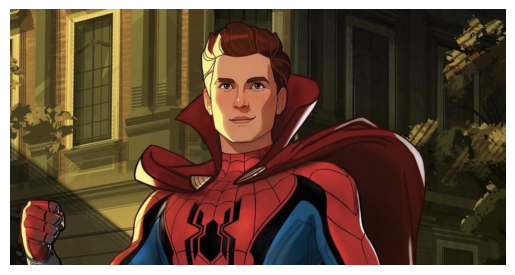

In [5]:
# @title

img_data = base64.b64decode(string)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

(np.float64(-0.5), np.float64(951.5), np.float64(490.5), np.float64(-0.5))

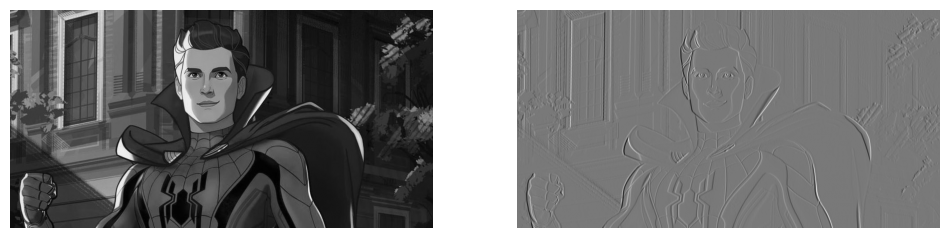

In [6]:
#Task1
img_np=np.array(img)
gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
def convolve(img,kernel):

  img = img.astype(float)


  kernel = np.flipud(np.fliplr(kernel))
  #getting dimensions of kernel and image
  height_img,width_img=img.shape
  height_k,width_k=kernel.shape
  #height and width for padding
  height_pad=height_k//2
  width_pad=width_k//2

  padded_img = np.pad(img, ((height_pad, height_pad), (width_pad,width_pad)), mode='reflect')

  cout=np.zeros_like(img)

  for i in range(height_img):
        for j in range(width_img):

            R = padded_img[i : i + height_k, j : j + width_k]

            cout[i, j] = (R * kernel).sum()

  return cout

edge_kernel=np.array([
      [-1,0,1],
      [-1,0,1],
      [-1,0,1]
  ])

result=convolve(gray,edge_kernel)


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(result, cmap= 'gray')
plt.axis('off')


(np.float64(-0.5), np.float64(951.5), np.float64(490.5), np.float64(-0.5))

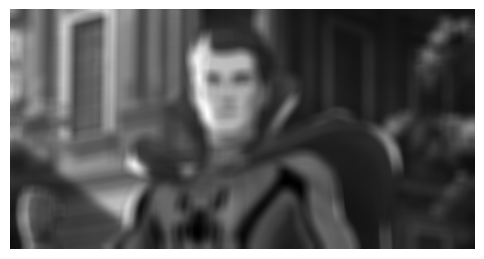

In [7]:
#Task2
def average_blur_gray(img,ksize):


  kernel=np.ones((ksize,ksize), dtype=np.float32)

  kernel/=(ksize*ksize)

  cout2=convolve(img,kernel)

  return cout2

ksize=25

result = average_blur_gray(gray, ksize)

plt.figure(figsize=(6, 6))
plt.imshow(result, cmap='gray')
plt.axis('off')

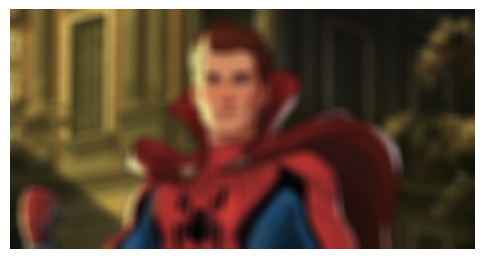

In [27]:

ksize=25
kernel=np.ones((ksize,ksize), dtype=np.float32)
kernel/=(ksize*ksize)

r=img_np[:,:,0]
g=img_np[:,:,1]
b=img_np[:,:,2]

rblur=convolve(r,kernel)
gblur=convolve(g,kernel)
bblur=convolve(b,kernel)

blurimg=np.dstack((rblur,gblur,bblur))
blurimg = blurimg.astype(np.uint8)

plt.figure(figsize=(6,6))
plt.imshow(blurimg)
plt.axis('off')
plt.show()

(np.float64(-0.5), np.float64(60.5), np.float64(60.5), np.float64(-0.5))

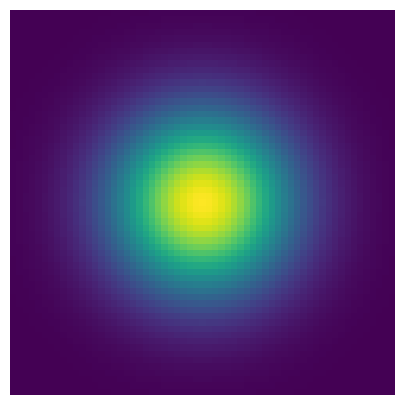

In [22]:
#Task3
def gaussian_kernel(k_size, sigma):


  center = k_size // 2
  x = np.arange(k_size) - center

  xx, yy = np.meshgrid(x, x)

  kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))

  return kernel / kernel.sum()

ksize=61
sigma0=10

g_kernel=gaussian_kernel(ksize,sigma0)

plt.figure(figsize=(6, 5))
plt.imshow(g_kernel)
plt.axis('off')

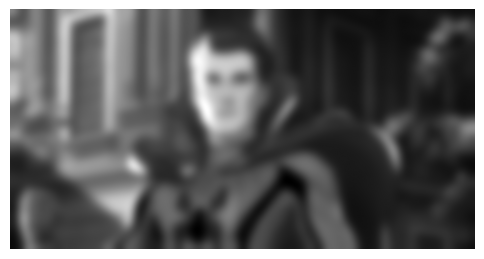

In [25]:
gray_gauss=convolve(gray,g_kernel)
plt.figure(figsize=(6, 6))
plt.imshow(gray_gauss,cmap='gray')

plt.axis('off')
plt.show()

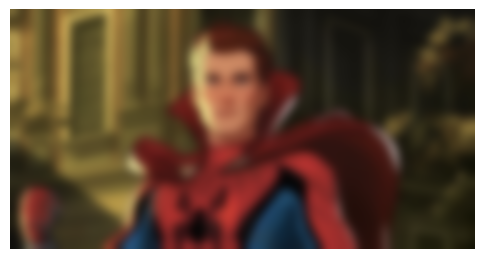

In [30]:
r= img_np[:,:,0]
g= img_np[:,:,1]
b= img_np[:,:,2]

r_gauss = convolve(r, g_kernel)
g_gauss = convolve(g, g_kernel)
b_gauss = convolve(b, g_kernel)

blur_gauss = np.dstack((r_gauss, g_gauss, b_gauss))
blur_gauss = np.clip(blur_gauss, 0, 255).astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(blur_gauss)
plt.axis('off')
plt.show()

### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

In [9]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

(np.float64(-0.5), np.float64(951.5), np.float64(490.5), np.float64(-0.5))

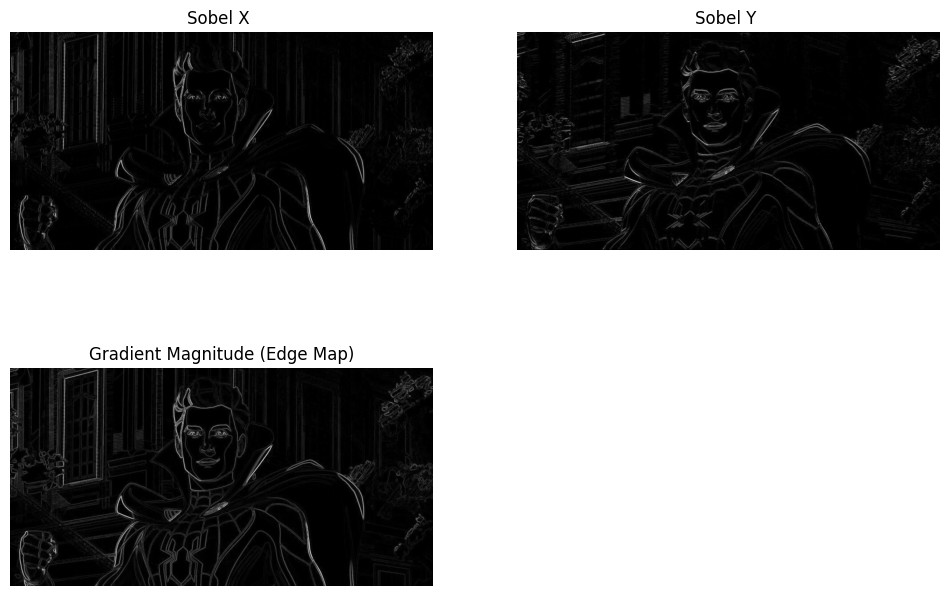

In [36]:
#defining sobel array
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]], dtype=np.float32)
sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]], dtype=np.float32)

if img_np.ndim == 3:
    z = np.mean(img_np, axis=2)
else:
    z = img_np
#convolution
gx = convolve(z, sobel_x)
gy = convolve(z, sobel_y)

grad_mag = np.sqrt(gx**2 + gy**2)
grad_mag= (grad_mag/grad_mag.max())*255
edge_map = grad_mag.astype(np.uint8)
#Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(np.abs(gx), cmap='gray')
plt.title("Sobel X ")
plt.axis('off')


plt.subplot(2, 2, 2)
plt.imshow(np.abs(gy), cmap='gray')
plt.title("Sobel Y ")
plt.axis('off')


plt.subplot(2, 2, 3)
plt.imshow(edge_map, cmap='gray')
plt.title("Gradient Magnitude (Edge Map)")
plt.axis('off')

### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [10]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

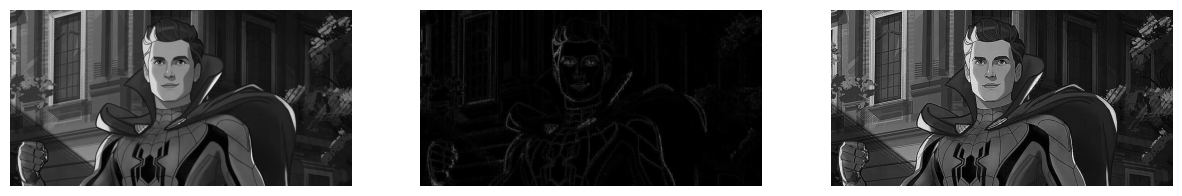

In [41]:
#Convolution
lap_k = np.array([
    [0,  1, 0],
    [1, -4, 1],
    [0,  1, 0]], dtype=np.float32)

img_float = gray.astype(np.float32)

lap=convolve(img_float, lap_k)
#Sharpening
alpha = 1

sharp = img_float - (lap * alpha)

sharp_numpy_disp = np.clip(sharp, 0, 255).astype(np.uint8)
#Plotting
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.abs(lap), cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharp_numpy_disp, cmap='gray')
plt.axis('off')

plt.show()

In [45]:
lap_cv2 = cv2.filter2D(img_float, -1, lap_k,borderType=cv2.BORDER_REFLECT_101)

sharp_cv2 = img_float - (lap_cv2 * alpha)

match = np.allclose(sharp, sharp_cv2, rtol=1e-05, atol=1e-08)

print(f"NumPy Output : {sharp.shape}")
print(f"OpenCV Output : {sharp_cv2.shape}")
print(f"\nExact Same -> {match}")

NumPy Output : (491, 952)
OpenCV Output : (491, 952)

Exact Same -> False


(np.float64(-0.5), np.float64(951.5), np.float64(490.5), np.float64(-0.5))

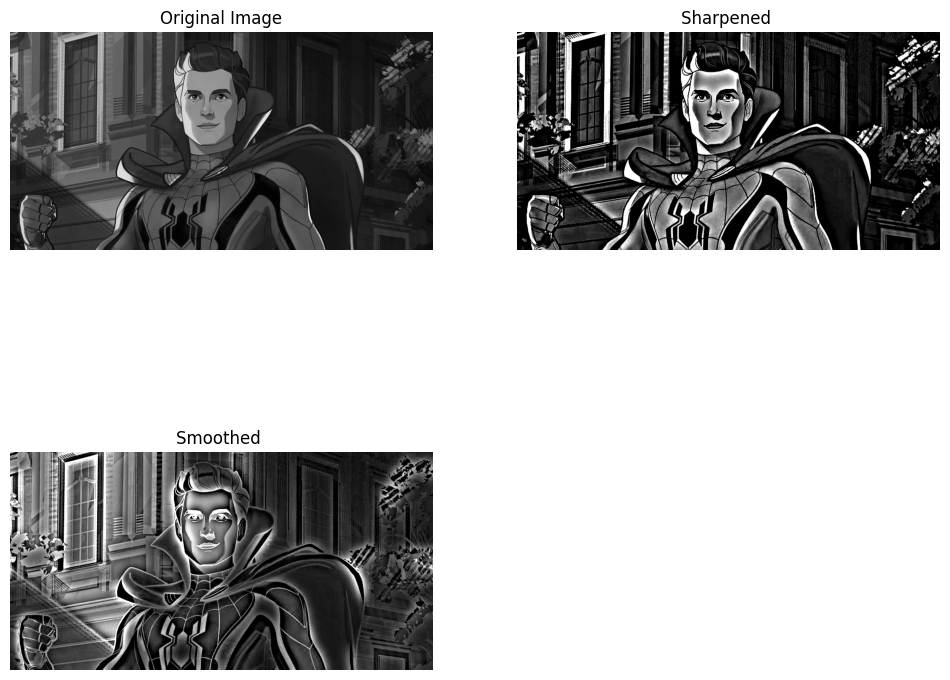

In [52]:
mask=img_float-gray_gauss
alpha1 = 4
alpha2= -4

sharpened = img_float + (alpha1 * mask)
smoothed = img_float + (alpha2 * mask)

sharpened_img = np.clip(sharpened, 0, 255).astype(np.uint8)
smoothed_img = np.clip(smoothed, 0, 255).astype(np.uint8)

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(sharpened_img, cmap='gray')
plt.title(f"Sharpened ")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(smoothed_img, cmap='gray')
plt.title(f"Smoothed ")
plt.axis('off')


### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [11]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

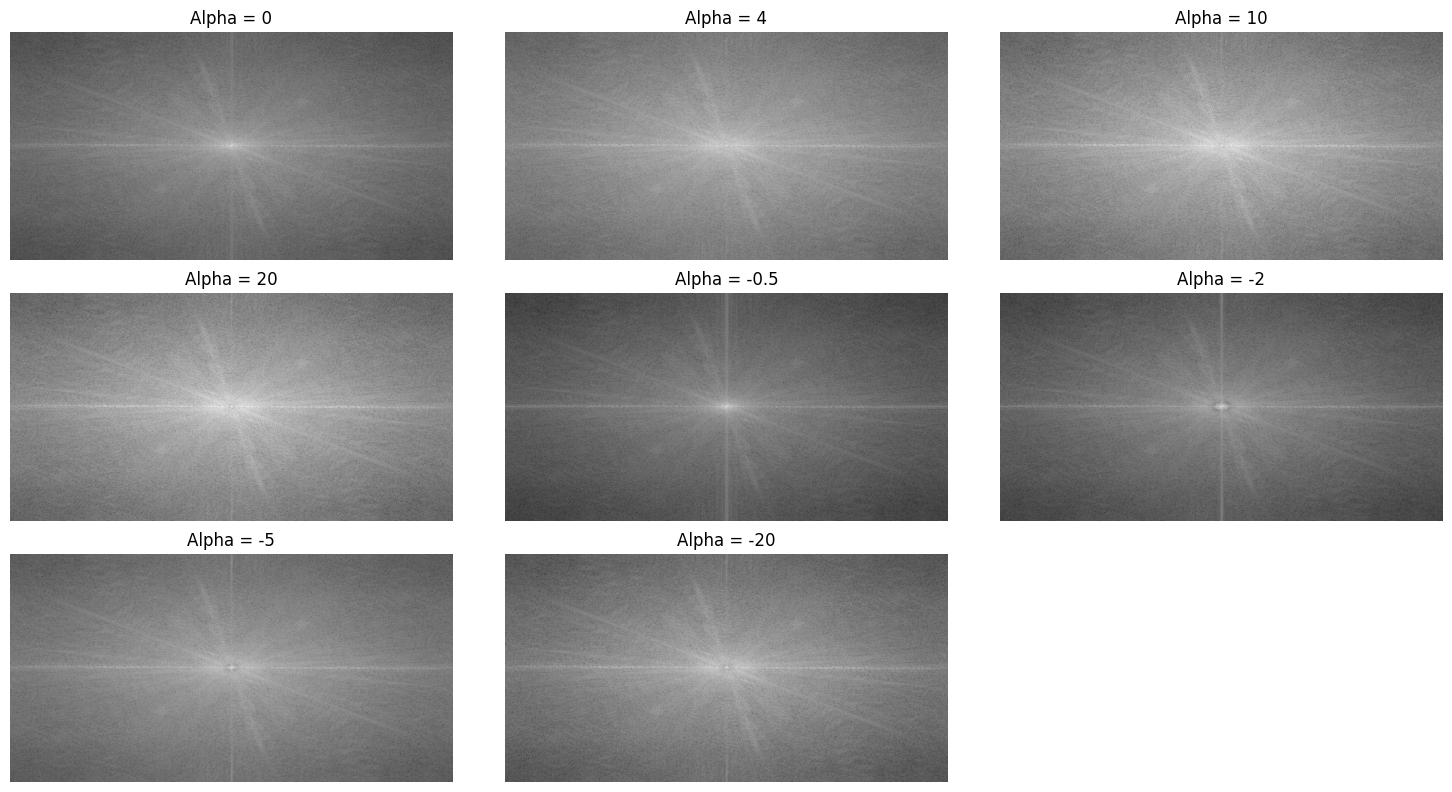

In [53]:
alphas = [0, 4, 10, 20, -0.5, -2, -5, -20]

plt.figure(figsize=(15,8))

for idx, alpha in enumerate(alphas):
    mask = gray - gray_gauss
    unsharp = gray + alpha * mask

    F = np.fft.fft2(unsharp)
    F_shift = np.fft.fftshift(F)
    mag = 20 * np.log(1 + np.abs(F_shift))

    plt.subplot(3,3,idx+1)
    plt.imshow(mag, cmap="gray")
    plt.title(f"Alpha = {alpha}")
    plt.axis("off")

plt.tight_layout()
plt.show()

### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

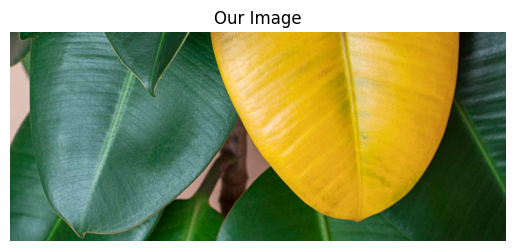

In [12]:
plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

In [13]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

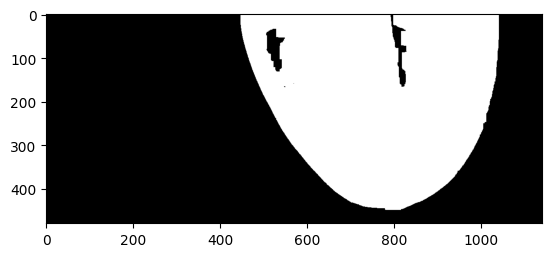

In [54]:
nw_img = img_part5.astype(np.float32)

R = nw_img[:, :, 0]
G = nw_img[:, :, 1]
B = nw_img[:, :, 2]

mask_y = (R > 130) & (G > 130) & (B < 85)
kernel = np.ones((7,7), np.uint8)

mask_ye = (mask_y * 255).astype(np.uint8)

dilated = cv2.dilate(mask_ye, kernel, iterations=5)
plt.imshow(dilated, cmap='gray')

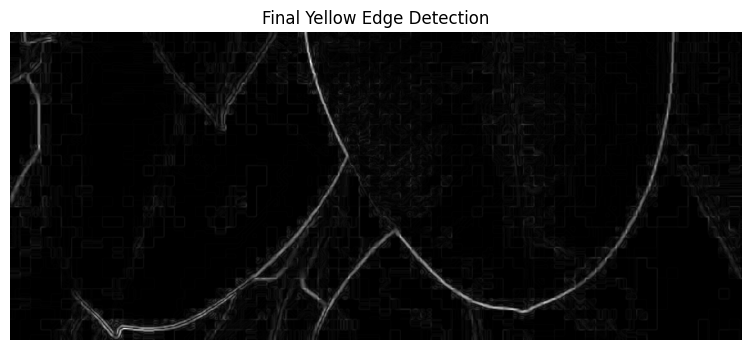

In [58]:
R = nw_img[:, :, 0].astype(np.float32)
G = nw_img[:, :, 1].astype(np.float32)

diff = R-G

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

gx = convolve(diff, sobel_x)
gy = convolve(diff, sobel_y)

magnitude = np.sqrt(gx**2 + gy**2)

edge_map = (magnitude / magnitude.max()) * 255
edge_map = edge_map.astype(np.uint8)

plt.figure(figsize=(12,4))
plt.imshow(edge_map, cmap='gray')
plt.title("Final Yellow Edge Detection")
plt.axis("off")

plt.show()

### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
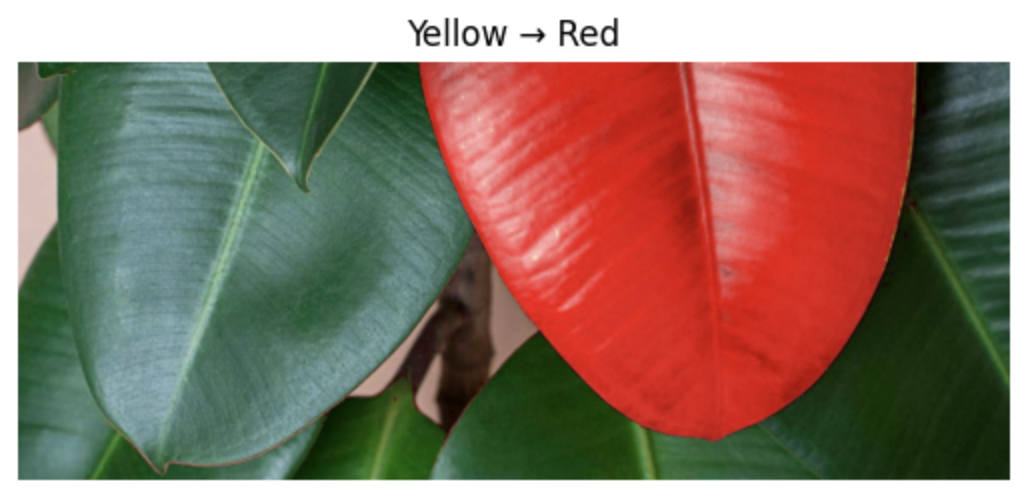

Also, we can change to a less brighter colour
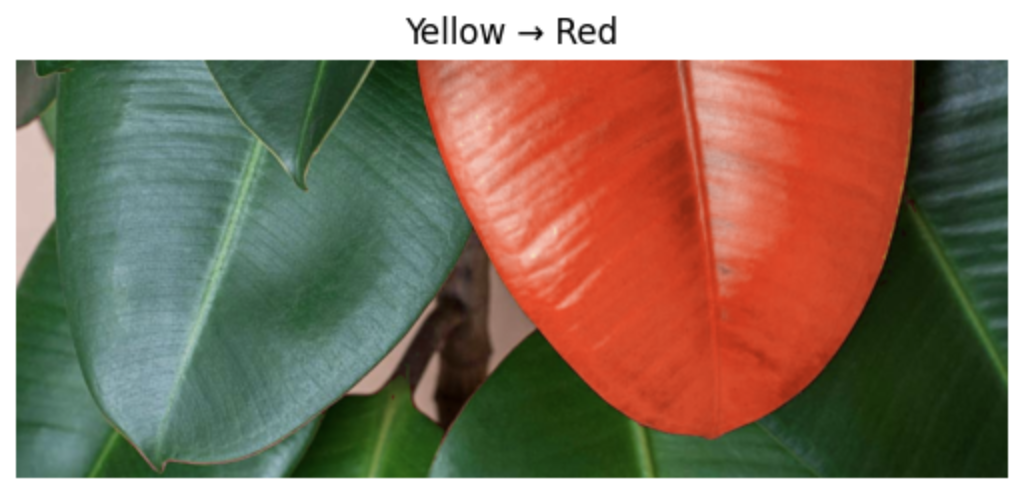

In [14]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.